## Definindo o Problema

In [10]:
#!pip install catboost;
#!pip install pymoo;
#!pip install -U pyrecorder;

In [11]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from yellowbrick.classifier import ConfusionMatrix
import numpy as np
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
#from google.colab import drive
import pickle
from pymoo.algorithms.soo.nonconvex.pso import PSO, PSOAnimation
#from pymoo.factory import Rastrigin
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
from pymoo.factory import get_termination
#from pymoo.util.display import Display
from pymoo.core.callback import Callback

In [3]:
from catboost import CatBoostClassifier

In [4]:
#drive.mount('/content/gdrive')

In [5]:
#with open('/content/gdrive/MyDrive/datasets/credit.pkl', 'rb') as f:
#    x_heart_train, x_heart_test, y_heart_train, y_heart_test = pickle.load(f)
    
with open('./heart.pkl', 'rb') as f:
    x_heart, y_heart = pickle.load(f)

Definindo as restrições 

In [6]:
OBJECTIVE = ['Accuracy']
DIMENSIONS = 24

https://catboost.ai/en/docs/references/training-parameters/common
parameters

In [7]:
iterations_min = 20  #n_estimators n_estimators #INT
learning_rate_min = 0.001  #FLOAT
l2_leaf_reg_min = 0.01  #FLOAT reg_lambda
bagging_temperature_min = 0.001  # float
subsample_min = 1.0   #float 
mvs_reg_min = 0.001  #float 0 - inf
random_strength_min = 0.001  #float 1.0 
use_best_model_min = False  #bool true false
best_model_min_trees_min = 1  #int 
depth_min = 1  #max_depth 8 int
min_data_in_leaf_min = 1  #min_child_samples int
max_leaves_min = 10  #num_leaves int 
one_hot_max_size_min = 1  #int 
rsm_min = 0.001  #colsample_bylevel float (0;1]
fold_permutation_block_min = 1  #int 
leaf_estimation_iterations_min = 1  #int
fold_len_multiplier_min = 2.0  #float
approx_on_full_history_min = False  #bool 
boost_from_average_min = False  #bool 
diffusion_temperature_min = 1000  #float 10000
posterior_sampling_min = False  #bool
allow_const_label_min = False  #bool
penalties_coefficient_min = 1.0  #float
model_shrink_rate_min = 0.001  #float

iterations_max = 100  #n_estimators n_estimators #INT
learning_rate_max = 0.5  #FLOAT
l2_leaf_reg_max = 0.01  #FLOAT reg_lambda
bagging_temperature_max = 10000.0  # float
subsample_max = 2.0  #float 
mvs_reg_max = 1000.0  #float 0 - inf
random_strength_max = 10.0  #float 1.0 
use_best_model_max = True  #bool true false
best_model_min_trees_max = 10  #int 
depth_max = 1  #max_depth 8 int 
min_data_in_leaf_max = 100  #min_child_samples int
max_leaves_max = 10  #num_leaves int 
one_hot_max_size_max = 20  #int 
rsm_max = 1.0   #colsample_bylevel float (0;1]
fold_permutation_block_max = 100  #int 
leaf_estimation_iterations_max = 100  #int
fold_len_multiplier_max = 10.0  #float
approx_on_full_history_max = True  #bool 
boost_from_average_max = True  #bool 
diffusion_temperature_max = 50000  #float 10000
posterior_sampling_max = True  #bool
allow_const_label_max = True  #bool
penalties_coefficient_max = 10.0  #float
model_shrink_rate_max = 1.0  #float

grow_policy = 'Lossguide'

Definindo o problema

In [8]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class OptimizeWithAccuracy(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var= DIMENSIONS,
                         n_obj=1,
                         n_constr=25,
                         xl=np.array([iterations_min,
                          learning_rate_min,
                          l2_leaf_reg_min,
                          bagging_temperature_min,
                          subsample_min,
                          mvs_reg_min,
                          random_strength_min,
                          use_best_model_min,
                          best_model_min_trees_min,
                          depth_min,
                          min_data_in_leaf_min,
                          max_leaves_min,
                          one_hot_max_size_min,
                          rsm_min,
                          fold_permutation_block_min,
                          leaf_estimation_iterations_min,
                          fold_len_multiplier_min,
                          approx_on_full_history_min,
                          boost_from_average_min,
                          diffusion_temperature_min,
                          posterior_sampling_min,
                          allow_const_label_min,
                          penalties_coefficient_min,
                          model_shrink_rate_min]),
                         xu=np.array([iterations_max,
                            learning_rate_max,
                            l2_leaf_reg_max,
                            bagging_temperature_max,
                            subsample_max,
                            mvs_reg_max,
                            random_strength_max,
                            use_best_model_max,
                            best_model_min_trees_max,
                            depth_max,
                            min_data_in_leaf_max,
                            max_leaves_max,
                            one_hot_max_size_max,
                            rsm_max,
                            fold_permutation_block_max,
                            leaf_estimation_iterations_max,
                            fold_len_multiplier_max,
                            approx_on_full_history_max,
                            boost_from_average_max,
                            diffusion_temperature_max,
                            posterior_sampling_max,
                            allow_const_label_max,
                            penalties_coefficient_max,
                            model_shrink_rate_max])
                        )

    def _evaluate(self, x, out, *args, **kwargs):
        #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, reg_alpha, reg_lambda
        
        model_catboost = CatBoostClassifier(#num_leaves        = int(np.round(x[0])), 
                                       #extra_trees = bool(np.round(x[16])), #boolean
                                        iterations = int(np.round(x[0])),
                                        
                                        learning_rate = x[1],
                                        l2_leaf_reg = x[2],
                                        bagging_temperature = x[3],
                                        #subsample = x[4],
                                        #mvs_reg = x[5],
                                        random_strength = x[6],
                                        #use_best_model = bool(np.round(x[7])),
                                        best_model_min_trees = int(np.round(x[8])), 
                                        depth = int(np.round(x[9])), 
                                        min_data_in_leaf = int(np.round(x[10])), 
                                        max_leaves = int(np.round(x[11])), 
                                        one_hot_max_size = int(np.round(x[12])), 
                                        rsm = x[13],
                                        fold_permutation_block = int(np.round(x[14])), 
                                        leaf_estimation_iterations = int(np.round(x[15])), 
                                        fold_len_multiplier = x[16],
                                        approx_on_full_history = False, #bool(np.round(x[17])),
                                        boost_from_average = bool(np.round(x[18])),
                                        #diffusion_temperature = x[19],
                                        posterior_sampling = bool(np.round(x[20])),
                                        allow_const_label = bool(np.round(x[21])),
                                        penalties_coefficient = x[22],
                                        model_shrink_rate = x[23],
                                        
                                        grow_policy = 'Lossguide',
                                        thread_count = -1
                                       )
        
        kfold = KFold(n_splits = 3, shuffle = True)
        
        scores = cross_val_score(model_catboost, x_heart, y_heart, cv = kfold, n_jobs=-1)  
        result = scores.mean()
        #if not result:
        #  result = 0
        
        out['F'] = -1 * result

problemAccuracy = OptimizeWithAccuracy()

In [9]:
class OptimizeWithF1(ElementwiseProblem):
        def __init__(self):
                super().__init__(n_var= DIMENSIONS,
                         n_obj=1,
                         n_constr=25,
                         xl=np.array([iterations_min,
                          learning_rate_min,
                          l2_leaf_reg_min,
                          bagging_temperature_min,
                          subsample_min,
                          mvs_reg_min,
                          random_strength_min,
                          use_best_model_min,
                          best_model_min_trees_min,
                          depth_min,
                          min_data_in_leaf_min,
                          max_leaves_min,
                          one_hot_max_size_min,
                          rsm_min,
                          fold_permutation_block_min,
                          leaf_estimation_iterations_min,
                          fold_len_multiplier_min,
                          approx_on_full_history_min,
                          boost_from_average_min,
                          diffusion_temperature_min,
                          posterior_sampling_min,
                          allow_const_label_min,
                          penalties_coefficient_min,
                          model_shrink_rate_min]),
                         xu=np.array([iterations_max,
                            learning_rate_max,
                            l2_leaf_reg_max,
                            bagging_temperature_max,
                            subsample_max,
                            mvs_reg_max,
                            random_strength_max,
                            use_best_model_max,
                            best_model_min_trees_max,
                            depth_max,
                            min_data_in_leaf_max,
                            max_leaves_max,
                            one_hot_max_size_max,
                            rsm_max,
                            fold_permutation_block_max,
                            leaf_estimation_iterations_max,
                            fold_len_multiplier_max,
                            approx_on_full_history_max,
                            boost_from_average_max,
                            diffusion_temperature_max,
                            posterior_sampling_max,
                            allow_const_label_max,
                            penalties_coefficient_max,
                            model_shrink_rate_max])
                        )

        def _evaluate(self, x, out, *args, **kwargs):
                #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, reg_alpha, reg_lambda
                
                model_catboost = CatBoostClassifier(#num_leaves        = int(np.round(x[0])), 
                                        #extra_trees = bool(np.round(x[16])), #boolean
                                                iterations = int(np.round(x[0])),
                                                
                                                learning_rate = x[1],
                                                l2_leaf_reg = x[2],
                                                bagging_temperature = x[3],
                                                #subsample = x[4],
                                                #mvs_reg = x[5],
                                                random_strength = x[6],
                                                #use_best_model = bool(np.round(x[7])),
                                                best_model_min_trees = int(np.round(x[8])), 
                                                depth = int(np.round(x[9])), 
                                                min_data_in_leaf = int(np.round(x[10])), 
                                                max_leaves = int(np.round(x[11])), 
                                                one_hot_max_size = int(np.round(x[12])), 
                                                rsm = x[13],
                                                fold_permutation_block = int(np.round(x[14])), 
                                                leaf_estimation_iterations = int(np.round(x[15])), 
                                                fold_len_multiplier = x[16],
                                                approx_on_full_history = False, #bool(np.round(x[17])),
                                                boost_from_average = bool(np.round(x[18])),
                                                #diffusion_temperature = x[19],
                                                posterior_sampling = bool(np.round(x[20])),
                                                allow_const_label = bool(np.round(x[21])),
                                                penalties_coefficient = x[22],
                                                model_shrink_rate = x[23],
                                                
                                                grow_policy = 'Lossguide',
                                                thread_count = -1
                                        )
                
                kfold = KFold(n_splits = 3, shuffle = True)

                scores = cross_val_score(model_catboost, x_heart, y_heart, cv = kfold, scoring='f1', n_jobs=-1)  
                
                result = scores.mean()
                out['F'] = -1 * result

problemF1 = OptimizeWithF1()

In [12]:
class OptimizeWithAUC(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var= DIMENSIONS,
                         n_obj=1,
                         n_constr=25,
                         xl=np.array([iterations_min,
                          learning_rate_min,
                          l2_leaf_reg_min,
                          bagging_temperature_min,
                          subsample_min,
                          mvs_reg_min,
                          random_strength_min,
                          use_best_model_min,
                          best_model_min_trees_min,
                          depth_min,
                          min_data_in_leaf_min,
                          max_leaves_min,
                          one_hot_max_size_min,
                          rsm_min,
                          fold_permutation_block_min,
                          leaf_estimation_iterations_min,
                          fold_len_multiplier_min,
                          approx_on_full_history_min,
                          boost_from_average_min,
                          diffusion_temperature_min,
                          posterior_sampling_min,
                          allow_const_label_min,
                          penalties_coefficient_min,
                          model_shrink_rate_min]),
                         xu=np.array([iterations_max,
                            learning_rate_max,
                            l2_leaf_reg_max,
                            bagging_temperature_max,
                            subsample_max,
                            mvs_reg_max,
                            random_strength_max,
                            use_best_model_max,
                            best_model_min_trees_max,
                            depth_max,
                            min_data_in_leaf_max,
                            max_leaves_max,
                            one_hot_max_size_max,
                            rsm_max,
                            fold_permutation_block_max,
                            leaf_estimation_iterations_max,
                            fold_len_multiplier_max,
                            approx_on_full_history_max,
                            boost_from_average_max,
                            diffusion_temperature_max,
                            posterior_sampling_max,
                            allow_const_label_max,
                            penalties_coefficient_max,
                            model_shrink_rate_max])
                        )

    def _evaluate(self, x, out, *args, **kwargs):
        #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, reg_alpha, reg_lambda
        
        model_catboost = CatBoostClassifier(#num_leaves        = int(np.round(x[0])), 
                                       #extra_trees = bool(np.round(x[16])), #boolean
                                        iterations = int(np.round(x[0])),
                                        
                                        learning_rate = x[1],
                                        l2_leaf_reg = x[2],
                                        bagging_temperature = x[3],
                                        #subsample = x[4],
                                        #mvs_reg = x[5],
                                        random_strength = x[6],
                                        #use_best_model = bool(np.round(x[7])),
                                        best_model_min_trees = int(np.round(x[8])), 
                                        depth = int(np.round(x[9])), 
                                        min_data_in_leaf = int(np.round(x[10])), 
                                        max_leaves = int(np.round(x[11])), 
                                        one_hot_max_size = int(np.round(x[12])), 
                                        rsm = x[13],
                                        fold_permutation_block = int(np.round(x[14])), 
                                        leaf_estimation_iterations = int(np.round(x[15])), 
                                        fold_len_multiplier = x[16],
                                        approx_on_full_history = False, #bool(np.round(x[17])),
                                        boost_from_average = bool(np.round(x[18])),
                                        #diffusion_temperature = x[19],
                                        posterior_sampling = bool(np.round(x[20])),
                                        allow_const_label = bool(np.round(x[21])),
                                        penalties_coefficient = x[22],
                                        model_shrink_rate = x[23],
                                        
                                        grow_policy = 'Lossguide',
                                        thread_count = -1
                                       )
        
        kfold = KFold(n_splits = 3, shuffle = True)
   
        scores = cross_val_score(model_catboost, x_heart, y_heart, cv = kfold, scoring='roc_auc', n_jobs=-1)  
        
        result = scores.mean()

        out['F'] = -1 * result

problemAUC = OptimizeWithAUC()

In [13]:
from pymoo.util.display.column import Column
from pymoo.util.display.output import Output

In [14]:
class MyOutput(Output):

    def __init__(self):
        super().__init__()
        global pbar 
        pbar = tqdm(total=ITERATIONS)
        self.score = Column("score", width=13)
        self.Parameters = Column("Parameters", width=35)
        self.columns += [self.score, self.Parameters]

    def update(self, algorithm):
        super().update(algorithm)
        self.score.set(-np.min(algorithm.pop.get("F")))
        #self.Parameters.set(algorithm.pop.get("X")[0])
        pbar.update(1)
        if pbar.n == ITERATIONS: pbar.close()

## Particle Swarm Optimization (PSO)

### Acurácia

In [13]:
ITERATIONS = 32
POPULATION = 32

In [14]:
def run_accuracy_pso(ITERATIONS = 32, POPULATION = 32):
    algorithm = PSO(#pop_size=POPULATION, 
                    #w=0.3, c1=4.0, c2=1.0, 
                    #adaptive=False, initial_velocity='random', 
                    #max_velocity_rate=0.75, pertube_best=False,
                    max_velocity_rate=0.25,
                    pop_size=POPULATION)
    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAccuracy,
                algorithm,
                #seed=SEED,
                save_history=False,
                verbose=True,
                output=MyOutput(),
                termination = term)

    print(np.min(res.pop.get('F')))[0][0]
    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best Accuracy Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    return score_best_individual, parameters_best_individual, res

In [15]:
score_best_individual, parameters_best_individual, res = run_accuracy_pso(ITERATIONS = 100, POPULATION = 5)

C:\Users\Felps\AppData\Local\Temp\ipykernel_23600\4288693047.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

n_gen  |  n_eval  |     score     |              Parameters            
     1 |        5 |  0.8684774079 |                                   -


C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pymoo\util\misc.py:99: RuntimeWarning: invalid value encountered in divide
  return lambda a, b: np.sqrt((((a - b) / (xu - xl)) ** 2).sum(axis=1))


TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:
trlist = np.array([])
for i in range(len(res.history)):
  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 

In [ ]:
scorelist = []

for i in range(len(trlist)):
#for i in range(1):
  if i == 0:
    scorelist.append(trlist[i])
  elif trlist[i] > scorelist[i-1]:
    scorelist.append(trlist[i])
  else:
    scorelist.append(scorelist[i-1])

In [ ]:
Accuracy_PSO = scorelist

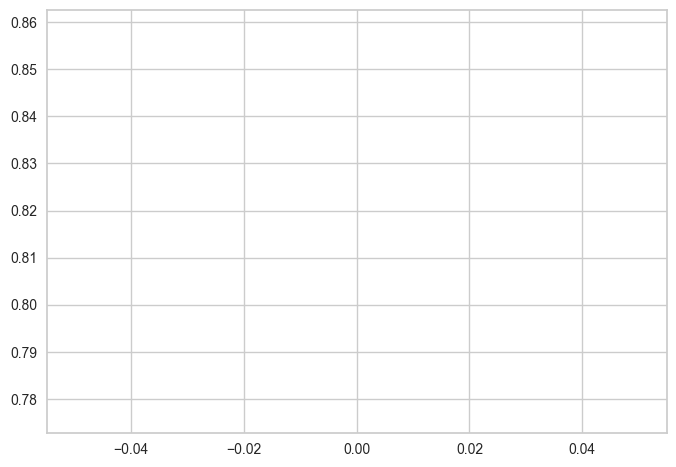

In [ ]:
plt.plot(Accuracy_PSO);

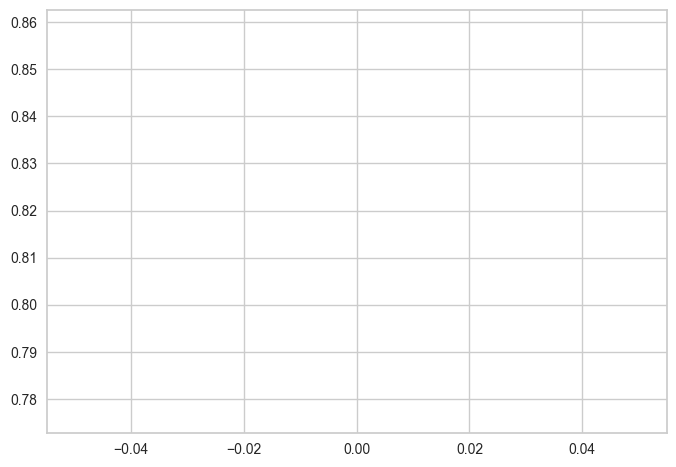

In [ ]:
tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
tracking_PSO_Accuracy = tracking
plt.plot(tracking)

### F1 Score 

In [ ]:
def run_f1_pso(ITERATIONS = 32, POPULATION = 32):
    algorithm = PSO(#pop_size=POPULATION, 
                    #w=0.3, c1=4.0, c2=1.0, 
                    #adaptive=False, initial_velocity='random', 
                    #max_velocity_rate=0.75, pertube_best=False,
                    max_velocity_rate=0.25,
                    pop_size=POPULATION)
    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemF1,
                algorithm,
                #seed=SEED,
                save_history=False,
                verbose=True,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best F1 Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    return score_best_individual, parameters_best_individual, res

In [ ]:
score_best_individual, parameters_best_individual, res = run_f1_pso(ITERATIONS = 100, POPULATION = 5)

C:\Users\Felps\AppData\Local\Temp\ipykernel_16140\4205364948.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

n_gen  |  n_eval  |     score     |              Parameters            
     1 |        5 |  0.8858439824 |                                   -


C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pymoo\util\misc.py:99: RuntimeWarning: invalid value encountered in divide
  return lambda a, b: np.sqrt((((a - b) / (xu - xl)) ** 2).sum(axis=1))


TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

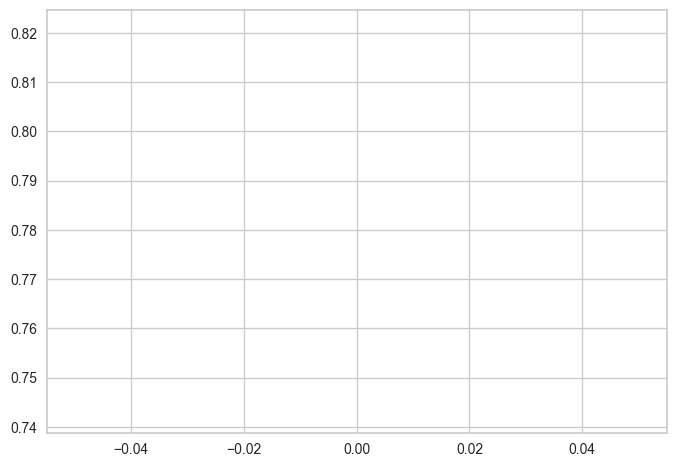

In [ ]:
trlist = np.array([])
for i in range(len(res.history)):
  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
  
scorelist = []

for i in range(len(trlist)):
#for i in range(1):
  if i == 0:
    scorelist.append(trlist[i])
  elif trlist[i] > scorelist[i-1]:
    scorelist.append(trlist[i])
  else:
    scorelist.append(scorelist[i-1])
    
F1_PSO = scorelist

plt.plot(scorelist);

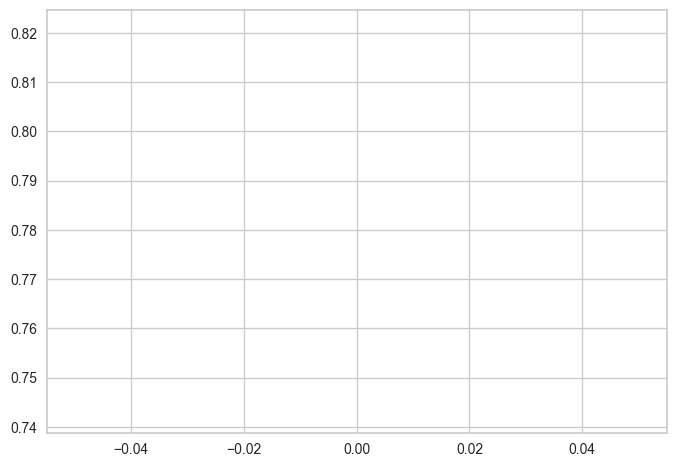

In [ ]:
tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
tracking_PSO_F1 = tracking
plt.plot(tracking)

### AUC

In [ ]:
def run_auc_pso(ITERATIONS = 32, POPULATION = 32):
    algorithm = PSO(#pop_size=POPULATION, 
                    #w=0.3, c1=4.0, c2=1.0, 
                    #adaptive=False, initial_velocity='random', 
                    #max_velocity_rate=0.75, pertube_best=False,
                    max_velocity_rate=0.25,
                    pop_size=POPULATION)
    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAUC,
                algorithm,
                #seed=SEED,
                save_history=False,
                verbose=False,
                output=MyOutput(),
                termination = term)

    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best AUC Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [ ]:
score_best_individual, parameters_best_individual, res = run_auc_pso(ITERATIONS = 10, POPULATION = 11)

C:\Users\Felps\AppData\Local\Temp\ipykernel_16140\1798888170.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)



  0%|          | 0/32 [00:31<?, ?it/s]
C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pymoo\util\misc.py:99: RuntimeWarning: invalid value encountered in divide
  return lambda a, b: np.sqrt((((a - b) / (xu - xl)) ** 2).sum(axis=1))


TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

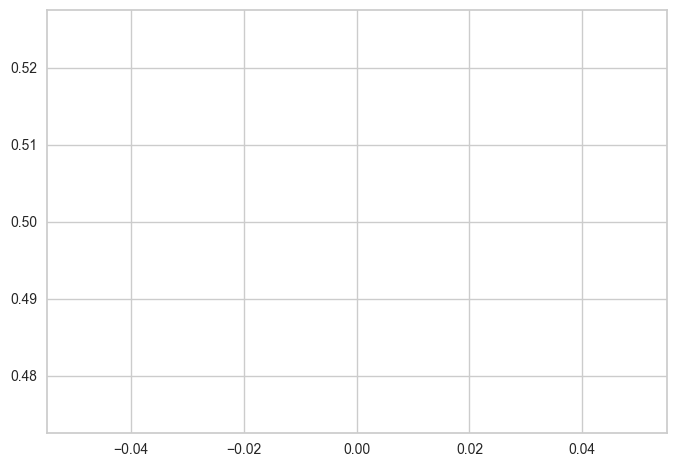

In [ ]:
trlist = np.array([])
for i in range(len(res.history)):
  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
  
scorelist = []

for i in range(len(trlist)):
#for i in range(1):
  if i == 0:
    scorelist.append(trlist[i])
  elif trlist[i] > scorelist[i-1]:
    scorelist.append(trlist[i])
  else:
    scorelist.append(scorelist[i-1])
    
AUC_PSO = scorelist

plt.plot(scorelist);

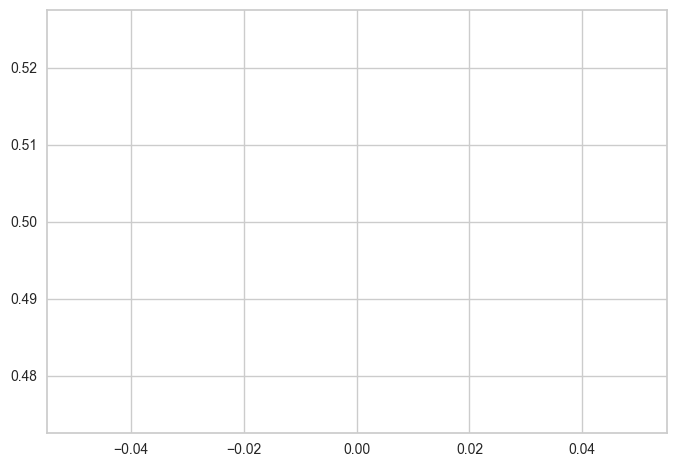

In [ ]:
tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
tracking_PSO_AUC = tracking
plt.plot(tracking)

## Algoritmo Genético (GA)

### Acurácia

In [ ]:
ITERATIONS = 32
POPULATION = 32

In [ ]:
from pymoo.algorithms.soo.nonconvex.ga import GA

In [ ]:
def run_accuracy_ga(ITERATIONS = 32, POPULATION = 32):

    algorithm = GA(pop_size=POPULATION)

    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAccuracy,
                algorithm,
                save_history=False,
                verbose=True,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best Accuracy Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [ ]:
score_best_individual, parameters_best_individual, res = run_accuracy_ga(ITERATIONS = 1, POPULATION = 1)

C:\Users\Felps\AppData\Local\Temp\ipykernel_8740\2209151331.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

n_gen  |  n_eval  |     score     |              Parameters            
     1 |       32 |  0.8795369372 |                                   -
     2 |       64 |  0.8795369372 |                                   -
     3 |       96 |  0.8795369372 |                                   -
     4 |      128 |  0.8806553578 |                                   -
     5 |      160 |  0.8806553578 |                                   -
     6 |      192 |  0.8806553578 |                                   -
     7 |      224 |  0.8806553578 |                                   -
     8 |      256 |  0.8806553578 |                                   -
     9 |      288 |  0.8806553578 |                                   -
    10 |      320 |  0.8817371088 |                                   -
    11 |      352 |  0.8817371088 |                                   -
    12 |      384 |  0.8817371088 |                                   -
    13 |      416 |  0.8817371088 |                             

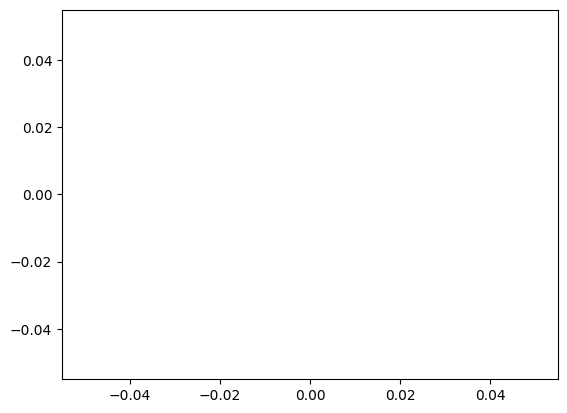

In [ ]:
tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
tracking_GA_Accuracy = tracking
plt.plot(tracking)

In [ ]:
trlist = np.array([])
for i in range(len(res.history)):
  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 

In [ ]:
scorelist = []

for i in range(len(trlist)):
  if i == 0:
    scorelist.append(trlist[i])
  elif trlist[i] > scorelist[i-1]:
    scorelist.append(trlist[i])
  else:
    scorelist.append(scorelist[i-1])

In [ ]:
Accuracy_GA = scorelist

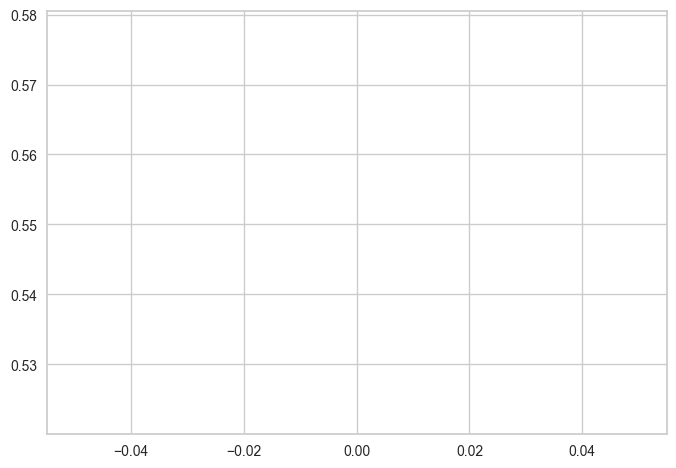

In [ ]:
plt.plot(scorelist);

### F1 Score 

In [ ]:
from pymoo.algorithms.soo.nonconvex.ga import GA
def run_f1_ga(ITERATIONS = 32, POPULATION = 32):
    algorithm = GA(pop_size=POPULATION)

    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemF1,
                algorithm,
                save_history=False,
                verbose=False,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best F1 Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [ ]:
score_best_individual, parameters_best_individual, res = run_f1_ga(ITERATIONS = 1, POPULATION = 1)

C:\Users\Felps\AppData\Local\Temp\ipykernel_16140\1994123235.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

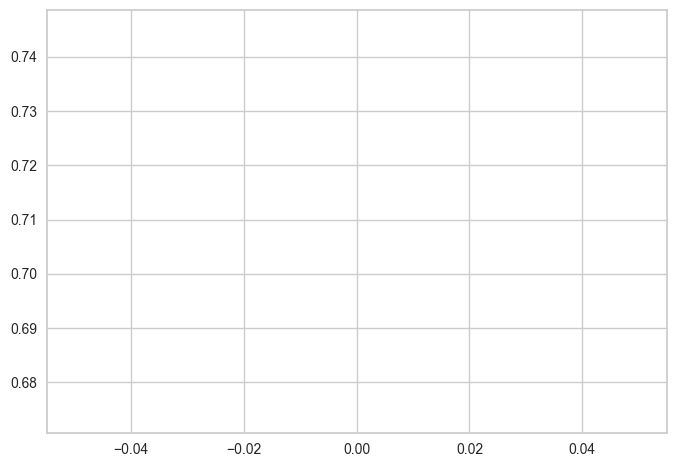

In [ ]:
trlist = np.array([])
for i in range(len(res.history)):
  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
  
scorelist = []

for i in range(len(trlist)):
#for i in range(1):
  if i == 0:
    scorelist.append(trlist[i])
  elif trlist[i] > scorelist[i-1]:
    scorelist.append(trlist[i])
  else:
    scorelist.append(scorelist[i-1])
    
F1_GA = scorelist

plt.plot(scorelist);

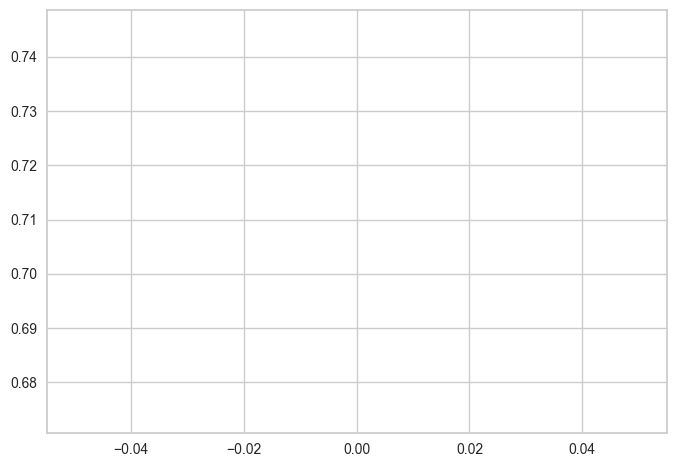

In [ ]:
tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
tracking_GA_F1 = tracking
plt.plot(tracking)

### AUC

In [ ]:
from pymoo.algorithms.soo.nonconvex.ga import GA
def run_auc_ga(ITERATIONS = 32, POPULATION = 32):
    algorithm = GA(pop_size=POPULATION)

    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAUC,
                algorithm,
                save_history=False,
                verbose=False,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best AUC Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [ ]:
score_best_individual, parameters_best_individual, res = run_auc_ga(ITERATIONS = 1, POPULATION = 1)

C:\Users\Felps\AppData\Local\Temp\ipykernel_16140\3250583479.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

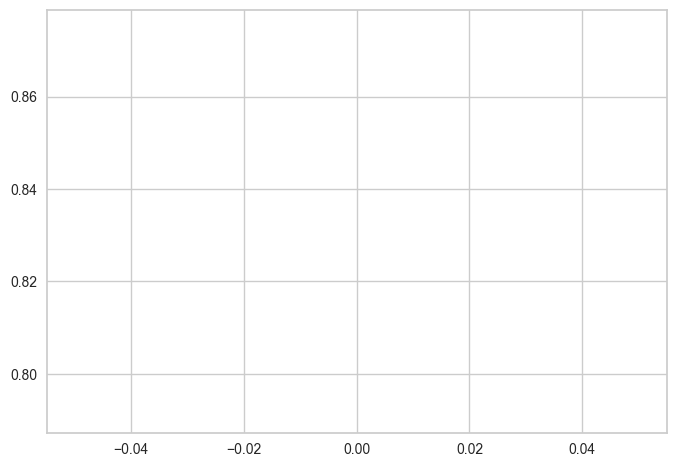

In [ ]:
trlist = np.array([])
for i in range(len(res.history)):
  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
  
scorelist = []

for i in range(len(trlist)):
#for i in range(1):
  if i == 0:
    scorelist.append(trlist[i])
  elif trlist[i] > scorelist[i-1]:
    scorelist.append(trlist[i])
  else:
    scorelist.append(scorelist[i-1])
    
AUC_GA = scorelist

plt.plot(scorelist);

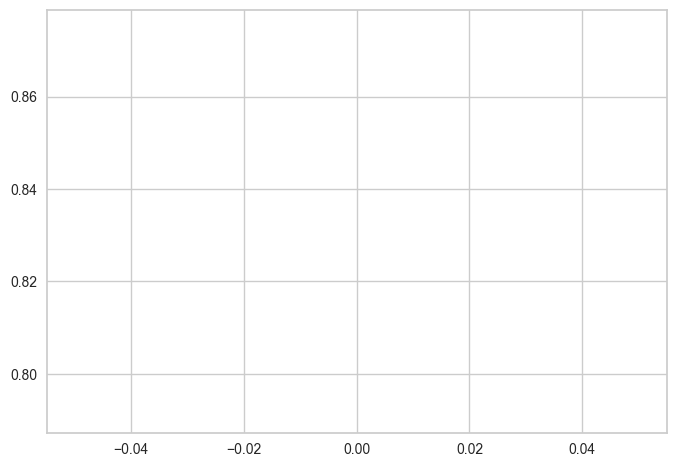

In [ ]:
tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
tracking_GA_AUC = tracking
plt.plot(tracking)

## Grid Search

### Acurácia

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_possibilities = 2

#num_leaves_grid = [i for i in range(num_leaves_min,num_leaves_max, int((num_leaves_max)/13))]
num_leaves_grid = [i for i in map(lambda x: int(x), np.linspace(num_leaves_min, num_leaves_max, n_possibilities))]
num_leaves_grid = num_leaves_grid + [100, 50, 75, 125, 11,150]
#print('Num_Leaves_Grid: ')
#print(num_leaves_grid, len(num_leaves_grid))
#print('\n')


min_child_samples_grid = [i for i in map(lambda x: int(x), np.linspace(min_child_samples_min, min_child_samples_max, n_possibilities))]
#print('min_child_samples_grid:')
#print(min_child_samples_grid, len(min_child_samples_grid))
#print('\n')

n_estimators_grid = [i for i in map(lambda x: int(x), np.linspace(n_estimators_min, n_estimators_max, n_possibilities))]
#print('n_estimators_grid:')
#print(n_estimators_grid, len(n_estimators_grid))
#print('\n')

learning_rate_grid = np.linspace(learning_rate_min, learning_rate_max, n_possibilities)
#print('learning_rate_grid:')
#print(learning_rate_grid, len(learning_rate_grid))
#print('\n')

subsample_for_bin_grid = [i for i in map(lambda x: int(x), np.linspace(subsample_for_bin_min, subsample_for_bin_max, n_possibilities))]
#print('subsample_for_bin_grid:')
#print(subsample_for_bin_grid, len(subsample_for_bin_grid))
#print('\n')

min_split_gain_grid = np.linspace(min_split_gain_min, min_split_gain_max, n_possibilities)
#print('min_split_gain_grid:')
#print(min_split_gain_grid, len(min_split_gain_grid))
#print('\n')

min_child_weight_grid = np.linspace(min_child_weight_min, min_child_weight_max, n_possibilities)
#print('min_child_weight_grid:')
#print(min_child_weight_grid, len(min_child_weight_grid))
#print('\n')

reg_alpha_grid = np.linspace(reg_alpha_min, reg_alpha_max, n_possibilities)
#print('reg_alpha_grid:')
#print(reg_alpha_grid, len(reg_alpha_grid))
#print('\n')


In [ ]:
parametros = {'num_leaves': num_leaves_grid, #int
              'min_child_samples': min_child_samples_grid,#int
              'n_estimators': n_estimators_grid, #int
              'learning_rate': learning_rate_grid,
              'subsample_for_bin': subsample_for_bin_grid, # int
              'min_split_gain': min_split_gain_grid,
              'min_child_weight': min_child_weight_grid,
              'reg_alpha': reg_alpha_grid,
              'max_depth': [-1],
              'n_jobs': [-1]}

In [ ]:
kfold = KFold(n_splits = 3, shuffle = True)
grid_search = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = parametros, cv = kfold, n_jobs= -1, verbose = 3)
grid_search.fit(x_heart, y_heart)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
#print(melhores_parametros)
#print(melhor_resultado)

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


In [ ]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_min_child_samples', 'param_min_child_weight', 'param_min_split_gain', 'param_n_estimators', 'param_n_jobs', 'param_num_leaves', 'param_reg_alpha', 'param_subsample_for_bin', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
trlist = grid_search.cv_results_['mean_test_score']

In [ ]:
scorelist = []

for i in range(len(trlist)):
#for i in range(1):
  if i == 0:
    scorelist.append(trlist[i])
  elif trlist[i] > scorelist[i-1]:
    scorelist.append(trlist[i])
  else:
    scorelist.append(scorelist[i-1])

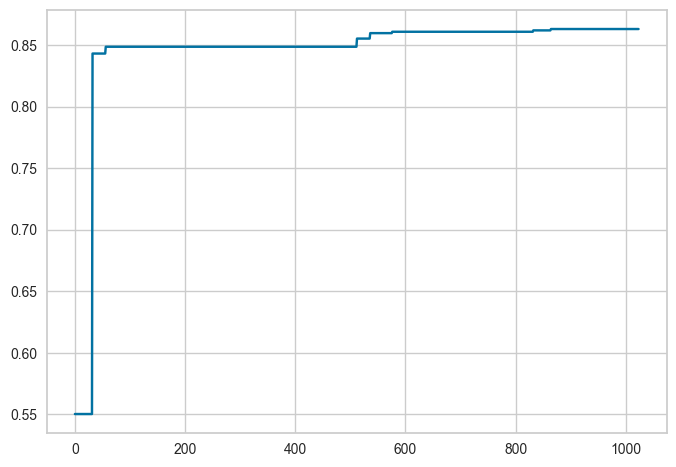

In [ ]:
tracking_GS_Accuracy = scorelist
plt.plot(scorelist); 

### F1 Score

In [ ]:
kfold = KFold(n_splits = 3, shuffle = True)
grid_search = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = parametros, cv = kfold, n_jobs= -1, scoring='f1', verbose = 3)
grid_search.fit(x_heart, y_heart)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
#print(melhores_parametros)
#print(melhor_resultado)

trlist = grid_search.cv_results_['mean_test_score']


scorelist = []

for i in range(len(trlist)):
#for i in range(1):
  if i == 0:
    scorelist.append(trlist[i])
  elif trlist[i] > scorelist[i-1]:
    scorelist.append(trlist[i])
  else:
    scorelist.append(scorelist[i-1])
    
tracking_GS_F1 = scorelist
plt.plot(scorelist); 

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


KeyboardInterrupt: 

### AUC

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


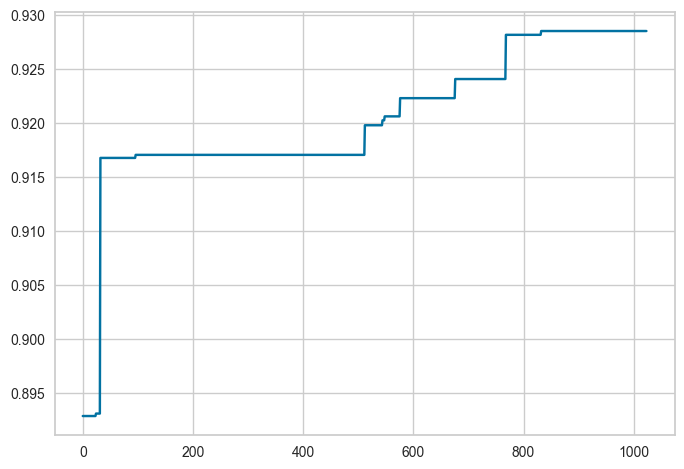

In [ ]:
kfold = KFold(n_splits = 3, shuffle = True)
grid_search = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = parametros, cv = kfold, n_jobs= -1, scoring='roc_auc', verbose = 3)
grid_search.fit(x_heart, y_heart)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
#print(melhores_parametros)
#print(melhor_resultado)

trlist = grid_search.cv_results_['mean_test_score']


scorelist = []

for i in range(len(trlist)):
#for i in range(1):
  if i == 0:
    scorelist.append(trlist[i])
  elif trlist[i] > scorelist[i-1]:
    scorelist.append(trlist[i])
  else:
    scorelist.append(scorelist[i-1])
    
tracking_GS_AUC = scorelist
plt.plot(scorelist); 

## Optuna

### Acurácia

In [16]:
#!pip install optuna

In [32]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
import sklearn
from sklearn import datasets
def objective_accuracy(trial):
  
      iterations = trial.suggest_int('iterations', iterations_min, iterations_max)  
      learning_rate = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)  
      l2_leaf_reg = trial.suggest_float('l2_leaf_reg', l2_leaf_reg_min, l2_leaf_reg_max)  
      bagging_temperature = trial.suggest_float('bagging_temperature', bagging_temperature_min, bagging_temperature_max)  
      random_strength = trial.suggest_float('random_strength', random_strength_min, random_strength_max)  
      best_model_min_trees = trial.suggest_int('best_model_min_trees', best_model_min_trees_min, best_model_min_trees_max)  
      depth = trial.suggest_int('depth', depth_min, depth_max)  
      min_data_in_leaf = trial.suggest_int('min_data_in_leaf', min_data_in_leaf_min, min_data_in_leaf_max)  
      max_leaves = trial.suggest_int('max_leaves', max_leaves_min, max_leaves_max)  
      one_hot_max_size = trial.suggest_int('one_hot_max_size', one_hot_max_size_min, one_hot_max_size_max)  
      rsm = trial.suggest_float('rsm', rsm_min, rsm_max)  
      fold_permutation_block = trial.suggest_int('fold_permutation_block', fold_permutation_block_min, fold_permutation_block_max)  
      leaf_estimation_iterations = trial.suggest_int('leaf_estimation_iterations', leaf_estimation_iterations_min, leaf_estimation_iterations_max)  
      fold_len_multiplier = trial.suggest_float('fold_len_multiplier', fold_len_multiplier_min, fold_len_multiplier_max)  
      boost_from_average = trial.suggest_int('boost_from_average', 0, 1)  
      posterior_sampling = trial.suggest_int('posterior_sampling', 0, 1)  
      allow_const_label = trial.suggest_int('allow_const_label', 0, 1)  
      penalties_coefficient = trial.suggest_float('penalties_coefficient', penalties_coefficient_min, penalties_coefficient_max)  
      model_shrink_rate = trial.suggest_float('model_shrink_rate', model_shrink_rate_min, model_shrink_rate_max)  
      
      
      model_catboost = CatBoostClassifier(
                                    iterations = iterations,
                                    learning_rate = learning_rate,
                                    l2_leaf_reg = l2_leaf_reg,
                                    bagging_temperature = bagging_temperature,
                                    random_strength = random_strength,
                                    best_model_min_trees = best_model_min_trees,
                                    depth = depth,
                                    min_data_in_leaf = min_data_in_leaf,
                                    max_leaves = max_leaves,
                                    one_hot_max_size = one_hot_max_size,
                                    rsm = rsm,
                                    fold_permutation_block = fold_permutation_block,
                                    leaf_estimation_iterations = leaf_estimation_iterations,
                                    fold_len_multiplier = fold_len_multiplier,
                                    #boost_from_average = bool(boost_from_average),
                                    posterior_sampling = bool(posterior_sampling),
                                    allow_const_label = bool(allow_const_label),
                                    penalties_coefficient = penalties_coefficient,
                                    model_shrink_rate = model_shrink_rate,
                                    approx_on_full_history = False,
                                    #loss_function='MultiClass',
                                    grow_policy = 'Lossguide',
                                    thread_count = -1
                                    )

      
      kfold = KFold(n_splits = 3, shuffle = True)

      return sklearn.model_selection.cross_val_score(model_catboost, x_heart, y_heart, n_jobs=-1, cv=kfold).mean()

In [33]:
def run_optuna_accuracy(n_trials=1024):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_accuracy, n_trials=n_trials, n_jobs = -1)
    trial = study.best_trial
    #print('Accuracy: {}'.format(trial.value))
    #print("Best hyperparameters: {}".format(trial.params))
    return trial.value, study


In [34]:
trial, study = run_optuna_accuracy(10)

In [35]:
trial

0.8762476806524243

In [36]:
tracking = []
for i in range(len(study.trials)):
  if i == 0: 
    tracking.append(study.trials[i].value)
  elif tracking[i-1] > study.trials[i].value:
    tracking.append(tracking[i-1])
  else:
    tracking.append(study.trials[i].value)
#tracking_sorted = sorted(tracking)

In [37]:
tracking_Optuna_Accuracy = tracking

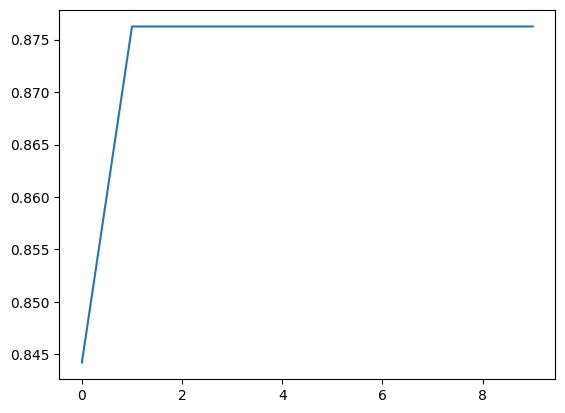

In [38]:
plt.plot(tracking);
#plt.plot(tracking_sorted) 

In [39]:
#optuna.visualization.plot_optimization_history(study)

In [40]:
#optuna.visualization.plot_slice(study)

### F1 Score

In [41]:
def objective_f1(trial):
      iterations = trial.suggest_int('iterations', iterations_min, iterations_max)  
      learning_rate = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)  
      l2_leaf_reg = trial.suggest_float('l2_leaf_reg', l2_leaf_reg_min, l2_leaf_reg_max)  
      bagging_temperature = trial.suggest_float('bagging_temperature', bagging_temperature_min, bagging_temperature_max)  
      random_strength = trial.suggest_float('random_strength', random_strength_min, random_strength_max)  
      best_model_min_trees = trial.suggest_int('best_model_min_trees', best_model_min_trees_min, best_model_min_trees_max)  
      depth = trial.suggest_int('depth', depth_min, depth_max)  
      min_data_in_leaf = trial.suggest_int('min_data_in_leaf', min_data_in_leaf_min, min_data_in_leaf_max)  
      max_leaves = trial.suggest_int('max_leaves', max_leaves_min, max_leaves_max)  
      one_hot_max_size = trial.suggest_int('one_hot_max_size', one_hot_max_size_min, one_hot_max_size_max)  
      rsm = trial.suggest_float('rsm', rsm_min, rsm_max)  
      fold_permutation_block = trial.suggest_int('fold_permutation_block', fold_permutation_block_min, fold_permutation_block_max)  
      leaf_estimation_iterations = trial.suggest_int('leaf_estimation_iterations', leaf_estimation_iterations_min, leaf_estimation_iterations_max)  
      fold_len_multiplier = trial.suggest_float('fold_len_multiplier', fold_len_multiplier_min, fold_len_multiplier_max)  
      boost_from_average = trial.suggest_int('boost_from_average', 0, 1)  
      posterior_sampling = trial.suggest_int('posterior_sampling', 0, 1)  
      allow_const_label = trial.suggest_int('allow_const_label', 0, 1)  
      penalties_coefficient = trial.suggest_float('penalties_coefficient', penalties_coefficient_min, penalties_coefficient_max)  
      model_shrink_rate = trial.suggest_float('model_shrink_rate', model_shrink_rate_min, model_shrink_rate_max)  
                                                                
      
      model_catboost = CatBoostClassifier(
                                    iterations = iterations,
                                    learning_rate = learning_rate,
                                    l2_leaf_reg = l2_leaf_reg,
                                    
                                    bagging_temperature = bagging_temperature,
                                    random_strength = random_strength,
                                    best_model_min_trees = best_model_min_trees,
                                    depth = depth,
                                    
                                    min_data_in_leaf = min_data_in_leaf,
                                    max_leaves = max_leaves,
                                    one_hot_max_size = one_hot_max_size,
                                    
                                    rsm = rsm,
                                    fold_permutation_block = fold_permutation_block,
                                    leaf_estimation_iterations = leaf_estimation_iterations,
                                    
                                    
                                    fold_len_multiplier = fold_len_multiplier, #Flag Error
                                    #boost_from_average = bool(boost_from_average), #Flag Error
                                    posterior_sampling = bool(posterior_sampling),#Flag Error
                                    
                                    allow_const_label = bool(allow_const_label),
                                    penalties_coefficient = penalties_coefficient,
                                    model_shrink_rate = model_shrink_rate,
                                    approx_on_full_history = False,
                                    
                                    grow_policy = 'Lossguide',
                                    #loss_function='MultiClass',
                                    thread_count = -1
                                    )

      
      kfold = KFold(n_splits = 3, shuffle = True)

      return sklearn.model_selection.cross_val_score(model_catboost, x_heart, y_heart, n_jobs=-1, scoring='f1', cv=kfold).mean()

In [42]:
def run_optuna_f1(n_trials=1024):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_f1, n_trials=n_trials, n_jobs = -1)
    trial = study.best_trial
    #print('F1: {}'.format(trial.value))
    #print("Best hyperparameters: {}".format(trial.params))
    return trial.value, study

In [43]:
trial, study = run_optuna_f1(1)

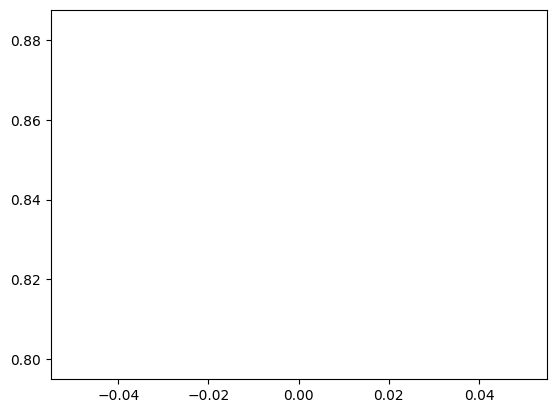

In [44]:
tracking = []
for i in range(len(study.trials)):
  if i == 0: 
    tracking.append(study.trials[i].value)
  elif tracking[i-1] > study.trials[i].value:
    tracking.append(tracking[i-1])
  else:
    tracking.append(study.trials[i].value)
#tracking_sorted = sorted(tracking)

tracking_Optuna_F1 = tracking

plt.plot(tracking);
#plt.plot(tracking_sorted) 

### AUC

In [45]:
def objective_auc(trial):
      iterations = trial.suggest_int('iterations', iterations_min, iterations_max)  
      learning_rate = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)  
      l2_leaf_reg = trial.suggest_float('l2_leaf_reg', l2_leaf_reg_min, l2_leaf_reg_max)  
      bagging_temperature = trial.suggest_float('bagging_temperature', bagging_temperature_min, bagging_temperature_max)  
      random_strength = trial.suggest_float('random_strength', random_strength_min, random_strength_max)  
      best_model_min_trees = trial.suggest_int('best_model_min_trees', best_model_min_trees_min, best_model_min_trees_max)  
      depth = trial.suggest_int('depth', depth_min, depth_max)  
      min_data_in_leaf = trial.suggest_int('min_data_in_leaf', min_data_in_leaf_min, min_data_in_leaf_max)  
      max_leaves = trial.suggest_int('max_leaves', max_leaves_min, max_leaves_max)  
      one_hot_max_size = trial.suggest_int('one_hot_max_size', one_hot_max_size_min, one_hot_max_size_max)  
      rsm = trial.suggest_float('rsm', rsm_min, rsm_max)  
      fold_permutation_block = trial.suggest_int('fold_permutation_block', fold_permutation_block_min, fold_permutation_block_max)  
      leaf_estimation_iterations = trial.suggest_int('leaf_estimation_iterations', leaf_estimation_iterations_min, leaf_estimation_iterations_max)  
      fold_len_multiplier = trial.suggest_float('fold_len_multiplier', fold_len_multiplier_min, fold_len_multiplier_max)  
      boost_from_average = trial.suggest_int('boost_from_average', 0, 1)  
      posterior_sampling = trial.suggest_int('posterior_sampling', 0, 1)  
      allow_const_label = trial.suggest_int('allow_const_label', 0, 1)  
      penalties_coefficient = trial.suggest_float('penalties_coefficient', penalties_coefficient_min, penalties_coefficient_max)  
      model_shrink_rate = trial.suggest_float('model_shrink_rate', model_shrink_rate_min, model_shrink_rate_max)  
                                                                
      
      model_catboost = CatBoostClassifier(
                                    iterations = iterations,
                                    learning_rate = learning_rate,
                                    l2_leaf_reg = l2_leaf_reg,
                                    
                                    bagging_temperature = bagging_temperature,
                                    random_strength = random_strength,
                                    best_model_min_trees = best_model_min_trees,
                                    depth = depth,
                                    
                                    min_data_in_leaf = min_data_in_leaf,
                                    max_leaves = max_leaves,
                                    one_hot_max_size = one_hot_max_size,
                                    
                                    rsm = rsm,
                                    fold_permutation_block = fold_permutation_block,
                                    leaf_estimation_iterations = leaf_estimation_iterations,
                                    
                                    
                                    fold_len_multiplier = fold_len_multiplier, #Flag Error
                                    #boost_from_average = bool(boost_from_average), #Flag Error
                                    posterior_sampling = bool(posterior_sampling),#Flag 
                                    
                                    allow_const_label = bool(allow_const_label),
                                    penalties_coefficient = penalties_coefficient,
                                    model_shrink_rate = model_shrink_rate,
                                    approx_on_full_history = False,
                                    
                                    grow_policy = 'Lossguide',
                                    #loss_function='MultiClass',
                                    thread_count = -1
                                    )

      
      kfold = KFold(n_splits = 3, shuffle = True)


      return sklearn.model_selection.cross_val_score(model_catboost, x_heart, y_heart, n_jobs=-1, scoring='roc_auc', cv=kfold).mean()

In [46]:
def run_optuna_auc(n_trials=1024):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_auc, n_trials=n_trials, n_jobs = -1)
    trial = study.best_trial
    #print('AUC: {}'.format(trial.value))
    #print("Best hyperparameters: {}".format(trial.params))
    return trial.value, study

In [47]:
trial, study = run_optuna_auc(1)

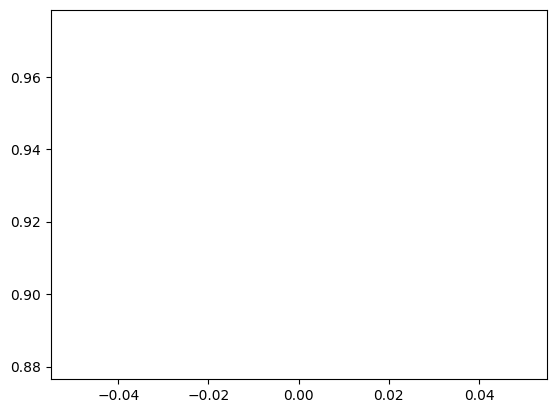

In [48]:
tracking = []
for i in range(len(study.trials)):
  if i == 0: 
    tracking.append(study.trials[i].value)
  elif tracking[i-1] > study.trials[i].value:
    tracking.append(tracking[i-1])
  else:
    tracking.append(study.trials[i].value)
#tracking_sorted = sorted(tracking)

tracking_Optuna_AUC = tracking

plt.plot(tracking);
#plt.plot(tracking_sorted) 

# Análise Comparativa

NameError: name 'tracking_PSO_Accuracy' is not defined

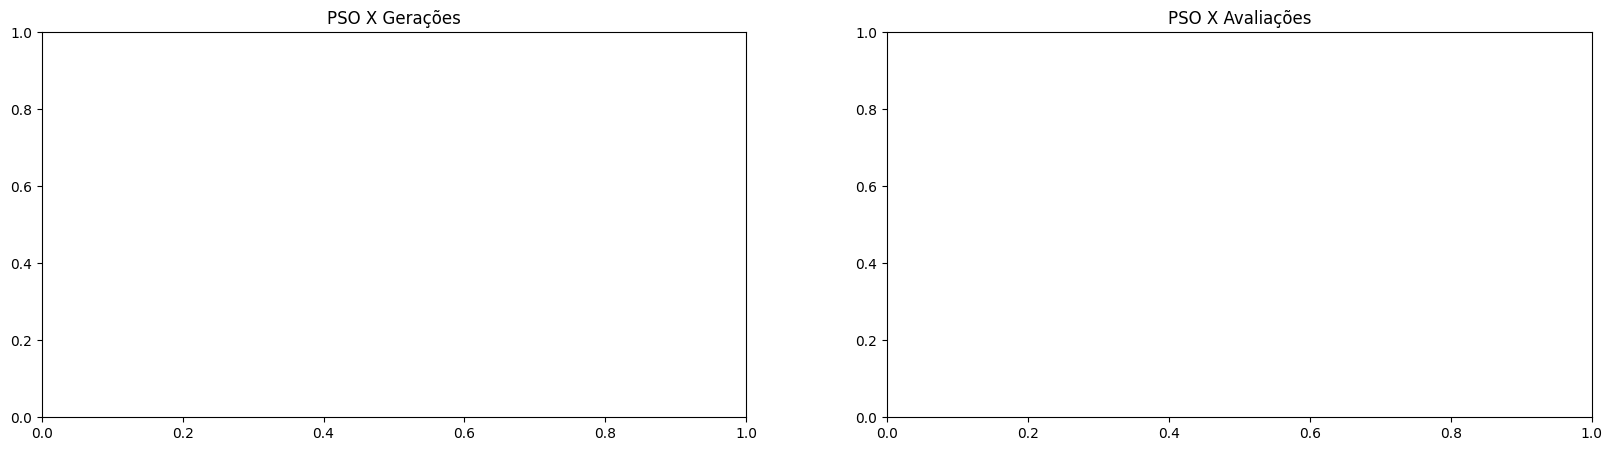

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.set_title('PSO X Gerações')
ax2.set_title('PSO X Avaliações')

ax1.plot(tracking_PSO_Accuracy)
ax2.plot(Accuracy_PSO)
plt.show()

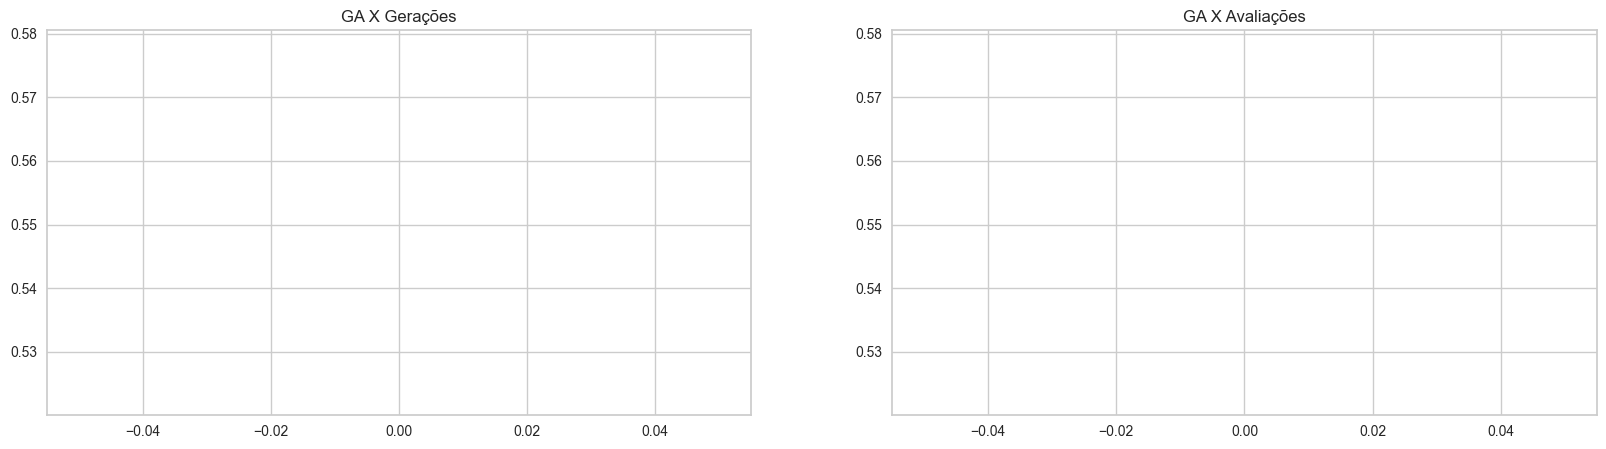

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.set_title('GA X Gerações')
ax2.set_title('GA X Avaliações')

ax1.plot(tracking_GA_Accuracy)
ax2.plot(Accuracy_GA)
plt.show()

Gráficos Comparativos Acurácia

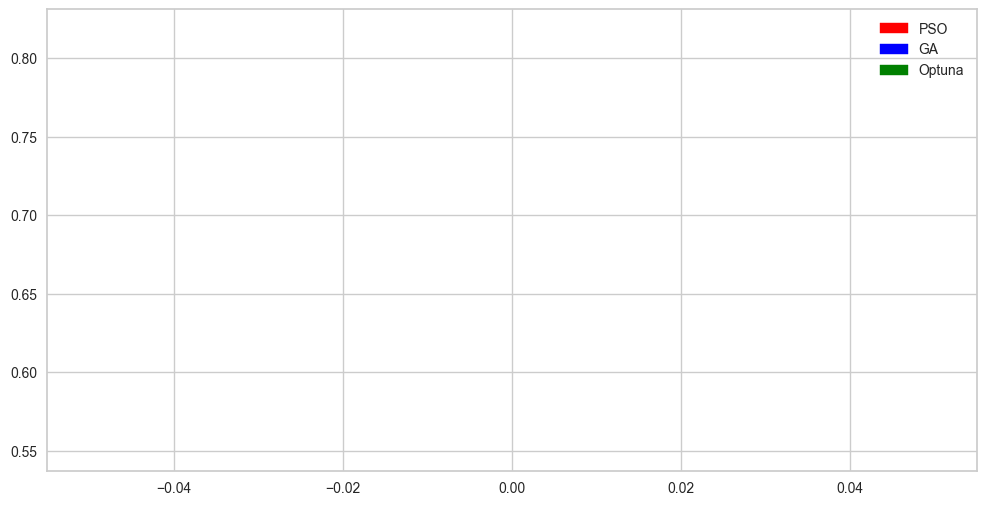

In [ ]:
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
red_patch = mpatches.Patch(color='red', label='PSO')
blue_patch = mpatches.Patch(color='blue', label='GA')
green_patch = mpatches.Patch(color='green', label='Optuna')
#black_patch = mpatches.Patch(color='black', label='GridSearch')

plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.plot(Accuracy_GA, color = 'blue', linewidth=1, linestyle='-', )
plt.plot(Accuracy_PSO, color = 'red', linewidth=1, linestyle='-')
plt.plot(tracking_Optuna_Accuracy, color = 'green', linewidth=1, linestyle='-')
#plt.plot(tracking_GS, color = 'black', linewidth=3, linestyle='-')
plt.show()

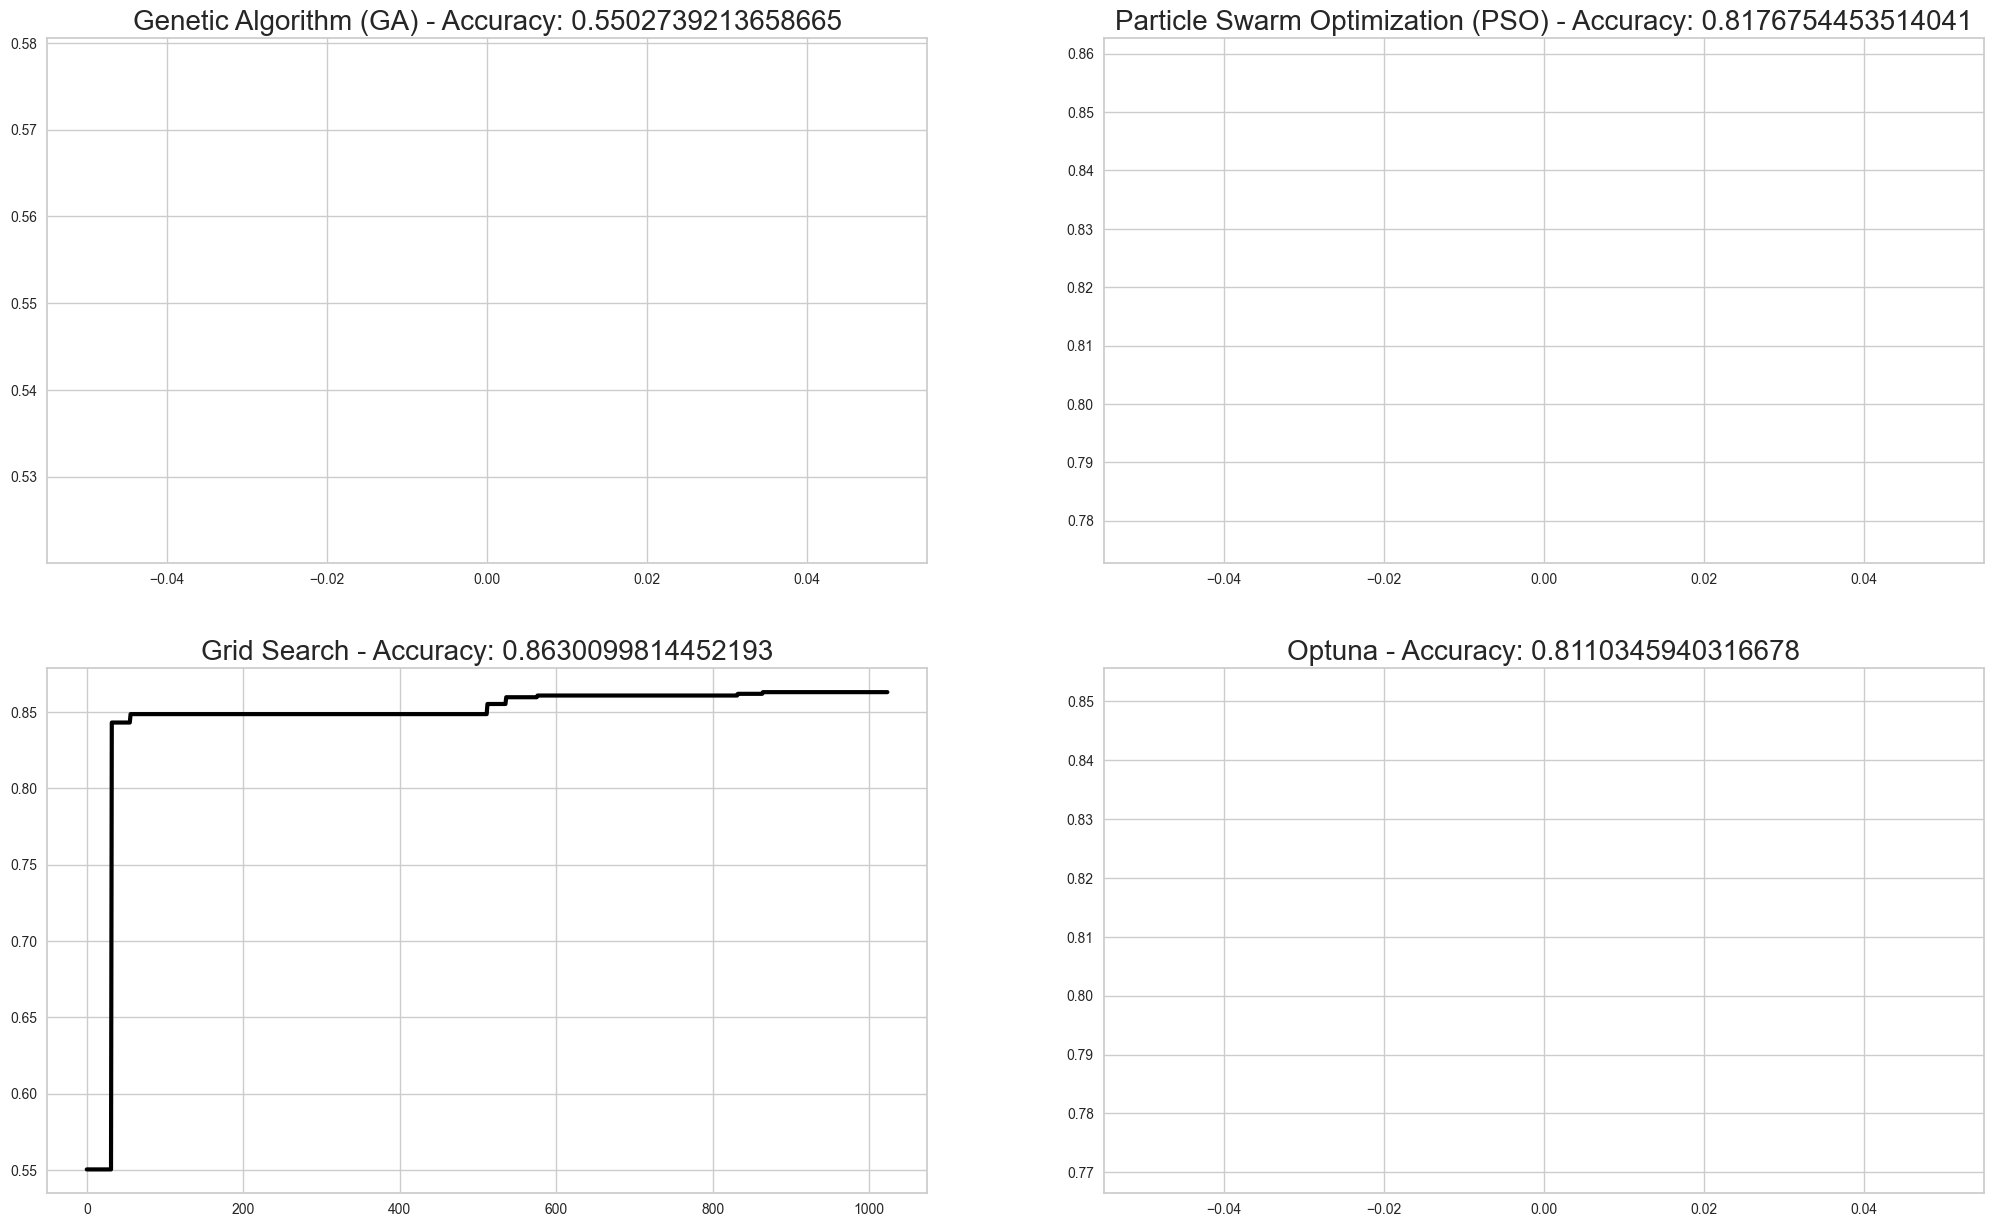

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25,15))

ax[0, 0].set_title(f'Genetic Algorithm (GA) - Accuracy: {max(tracking_GA_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax[0, 1].set_title(f'Particle Swarm Optimization (PSO) - Accuracy: {max(tracking_PSO_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax[1, 0].set_title(f'Grid Search - Accuracy: {max(tracking_GS_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax[1, 1].set_title(f'Optuna - Accuracy: {max(tracking_Optuna_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax[0,0].plot(tracking_GA_Accuracy, color = 'blue', linewidth=3, linestyle='-', )
ax[0,1].plot(tracking_PSO_Accuracy, color = 'red', linewidth=3, linestyle='-')

ax[1,0].plot(tracking_GS_Accuracy, color = 'black', linewidth=3, linestyle='-')
ax[1,1].plot(tracking_Optuna_Accuracy, color = 'green', linewidth=3, linestyle='-')


F1 score

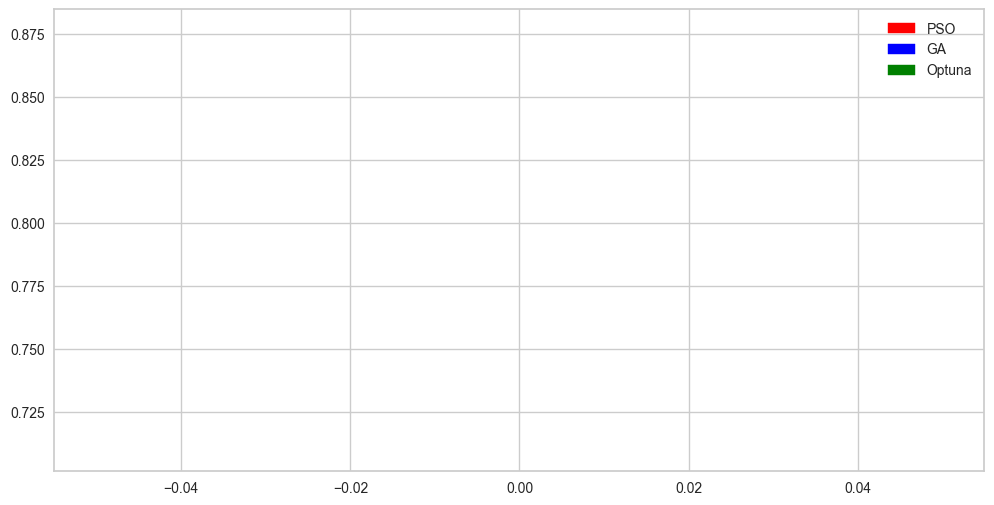

In [ ]:
plt.figure(figsize=(12, 6))
red_patch = mpatches.Patch(color='red', label='PSO')
blue_patch = mpatches.Patch(color='blue', label='GA')
green_patch = mpatches.Patch(color='green', label='Optuna')
#black_patch = mpatches.Patch(color='black', label='GridSearch')

plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.plot(F1_GA, color = 'blue', linewidth=1, linestyle='-', )
plt.plot(F1_PSO, color = 'red', linewidth=1, linestyle='-')
plt.plot(tracking_Optuna_F1, color = 'green', linewidth=1, linestyle='-')
#plt.plot(tracking_GS, color = 'black', linewidth=3, linestyle='-')
plt.show()

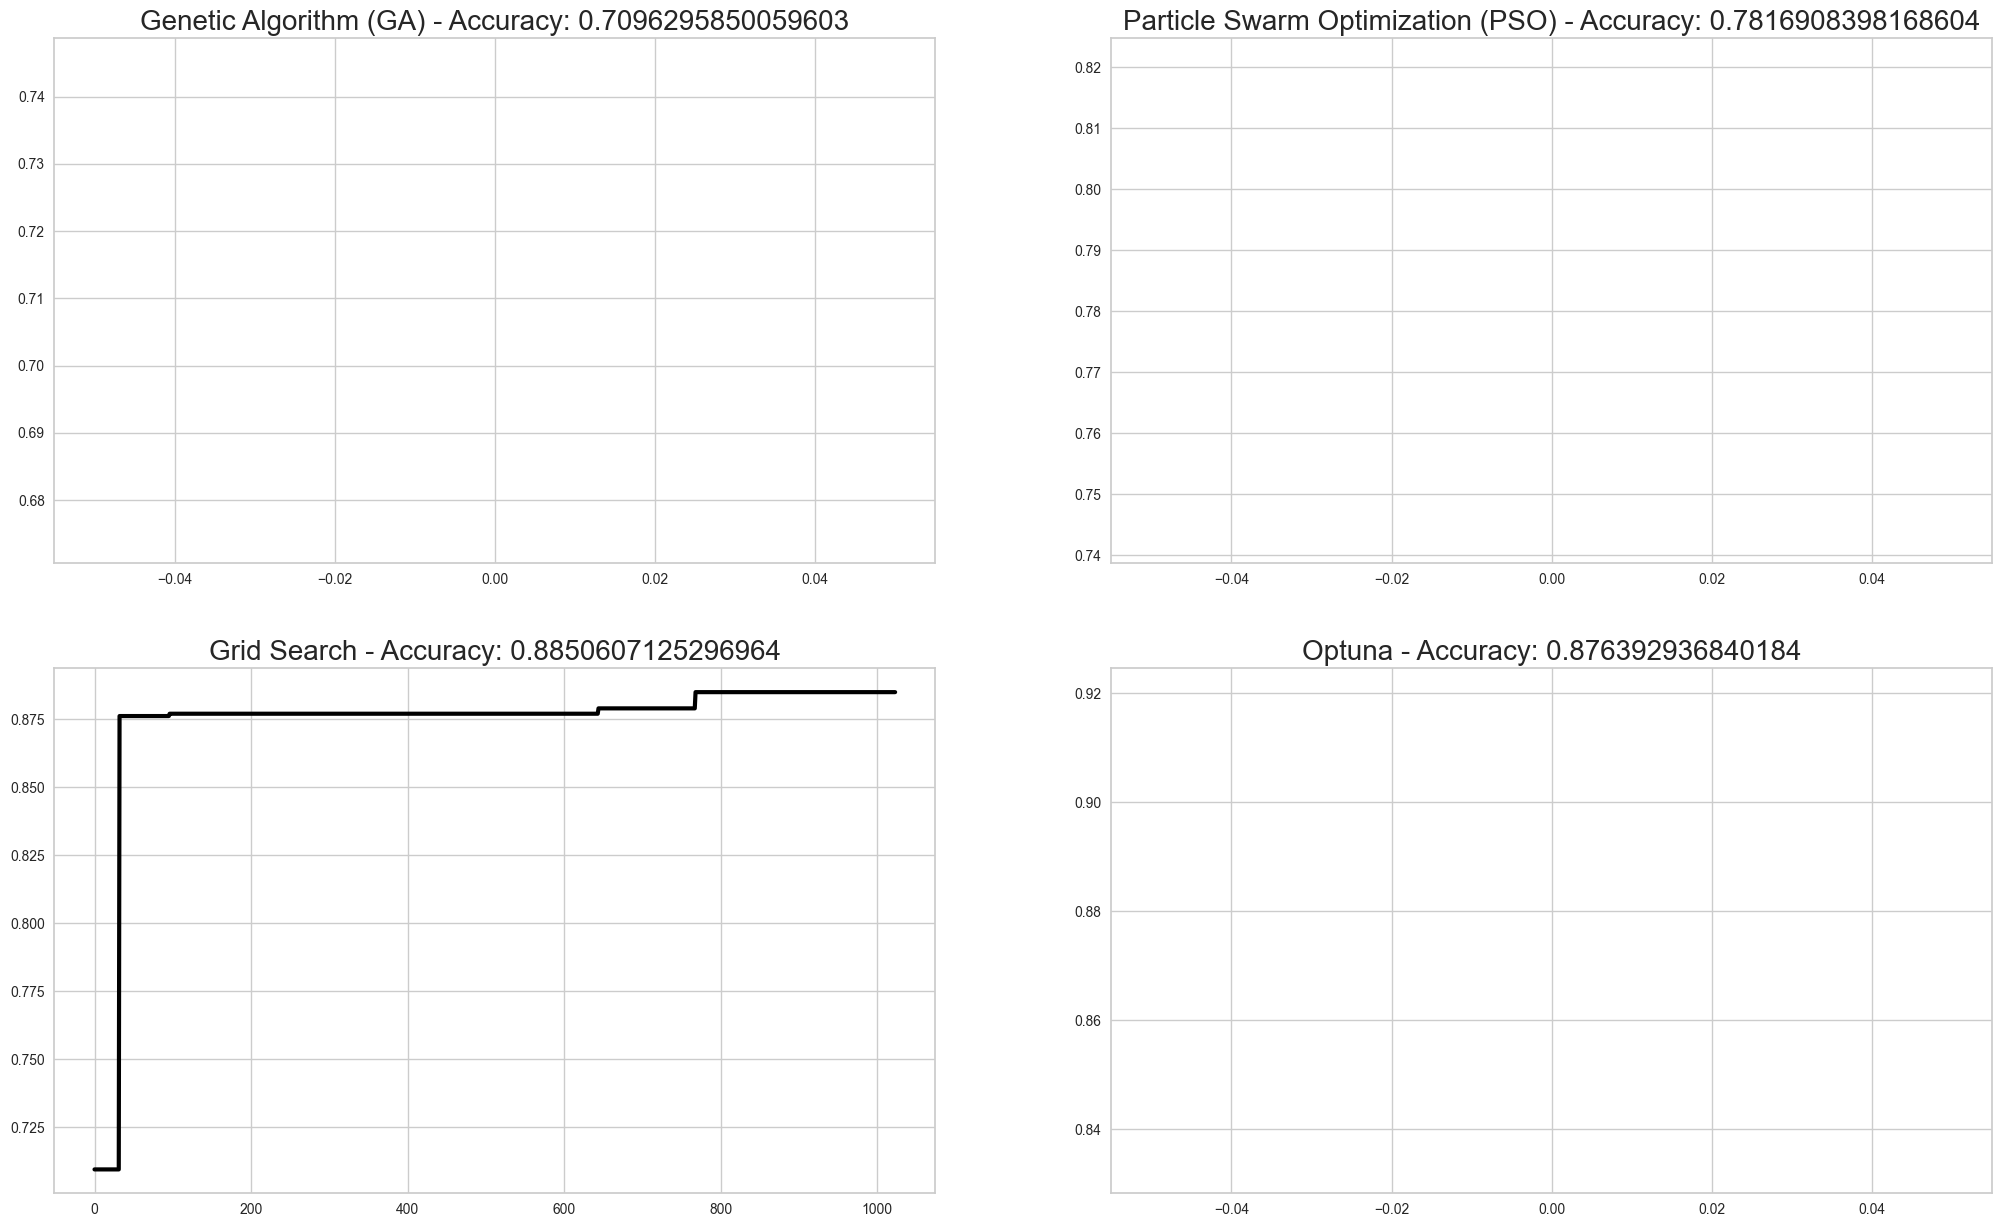

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25,15))

ax[0, 0].set_title(f'Genetic Algorithm (GA) - Accuracy: {max(tracking_GA_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax[0, 1].set_title(f'Particle Swarm Optimization (PSO) - Accuracy: {max(tracking_PSO_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax[1, 0].set_title(f'Grid Search - Accuracy: {max(tracking_GS_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax[1, 1].set_title(f'Optuna - Accuracy: {max(tracking_Optuna_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax[0,0].plot(tracking_GA_F1, color = 'blue', linewidth=3, linestyle='-', )
ax[0,1].plot(tracking_PSO_F1, color = 'red', linewidth=3, linestyle='-')

ax[1,0].plot(tracking_GS_F1, color = 'black', linewidth=3, linestyle='-')
ax[1,1].plot(tracking_Optuna_F1, color = 'green', linewidth=3, linestyle='-')


ROC AUC

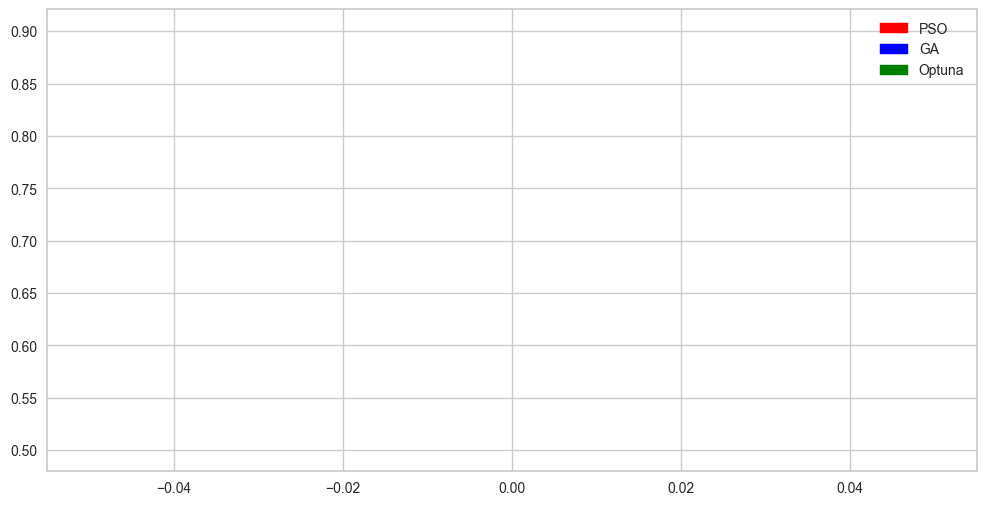

In [ ]:
plt.figure(figsize=(12, 6))
red_patch = mpatches.Patch(color='red', label='PSO')
blue_patch = mpatches.Patch(color='blue', label='GA')
green_patch = mpatches.Patch(color='green', label='Optuna')
#black_patch = mpatches.Patch(color='black', label='GridSearch')

plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.plot(AUC_GA, color = 'blue', linewidth=1, linestyle='-', )
plt.plot(AUC_PSO, color = 'red', linewidth=1, linestyle='-')
plt.plot(tracking_Optuna_AUC, color = 'green', linewidth=1, linestyle='-')
#plt.plot(tracking_GS, color = 'black', linewidth=3, linestyle='-')
plt.show()

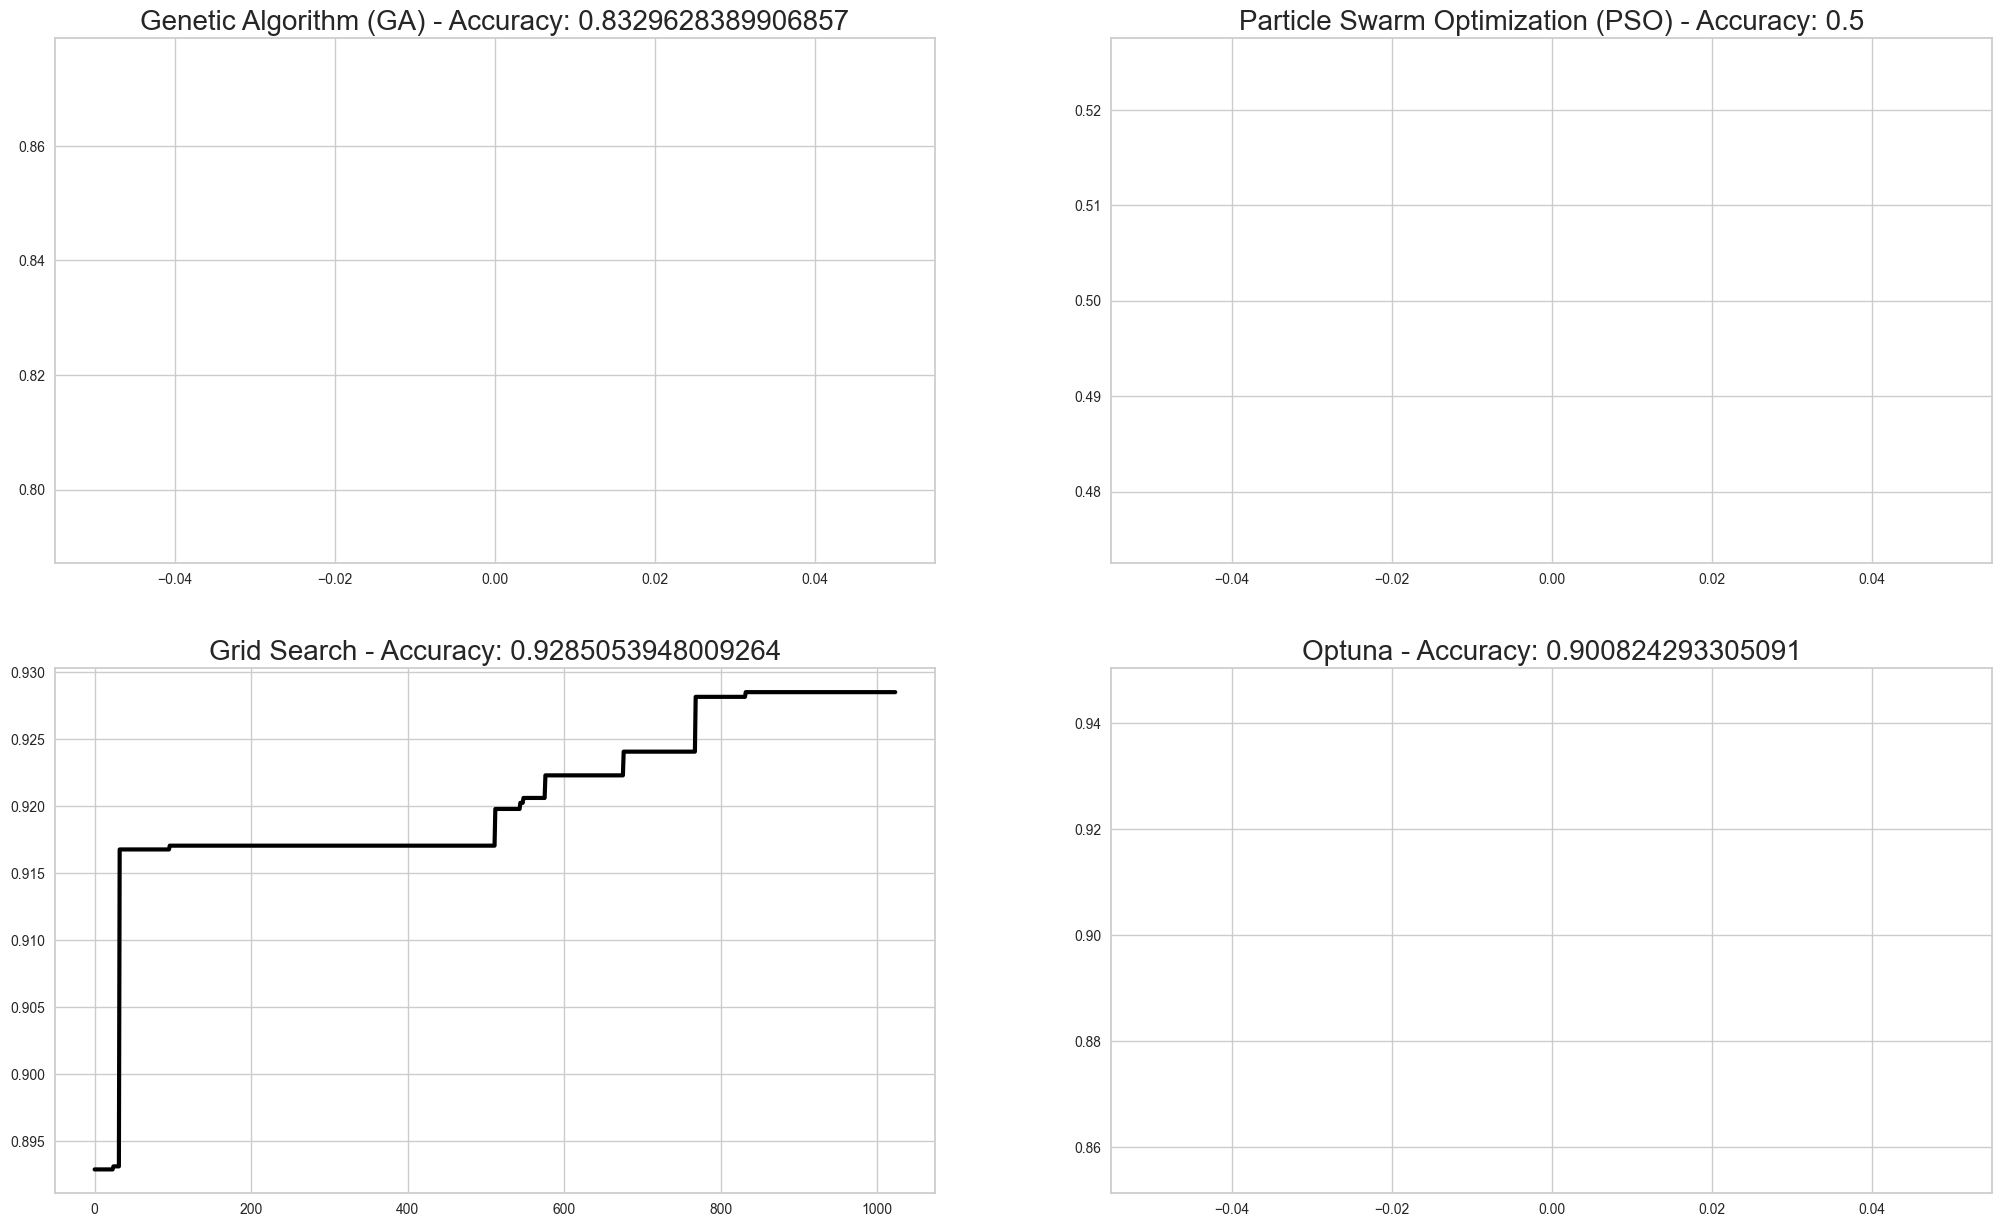

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25,15))

ax[0, 0].set_title(f'Genetic Algorithm (GA) - Accuracy: {max(tracking_GA_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax[0, 1].set_title(f'Particle Swarm Optimization (PSO) - Accuracy: {max(tracking_PSO_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax[1, 0].set_title(f'Grid Search - Accuracy: {max(tracking_GS_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax[1, 1].set_title(f'Optuna - Accuracy: {max(tracking_Optuna_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax[0,0].plot(tracking_GA_AUC, color = 'blue', linewidth=3, linestyle='-', )
ax[0,1].plot(tracking_PSO_AUC, color = 'red', linewidth=3, linestyle='-')

ax[1,0].plot(tracking_GS_AUC, color = 'black', linewidth=3, linestyle='-')
ax[1,1].plot(tracking_Optuna_AUC, color = 'green', linewidth=3, linestyle='-')


# Random Search

In [19]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def random_search_int_range(min_l, max_l):
    return np.arange(randint.ppf(0.01, min_l, max_l + 2),randint.ppf(0.99, min_l, max_l + 2))


def run_random_search_accuracy(iterations = 1024):
    param_distribution = {
    'iterations' : random_search_int_range(iterations_min, iterations_max),
    'learning_rate' : uniform(learning_rate_min, learning_rate_max),
    'l2_leaf_reg' : uniform(l2_leaf_reg_min, l2_leaf_reg_max),
    'bagging_temperature' : uniform(bagging_temperature_min, bagging_temperature_max),
    'random_strength' : uniform(random_strength_min, random_strength_max),
    'best_model_min_trees' : random_search_int_range(best_model_min_trees_min, best_model_min_trees_max),
    'depth' : random_search_int_range(depth_min, depth_max),
    'min_data_in_leaf' : random_search_int_range(min_data_in_leaf_min, min_data_in_leaf_max),
    'max_leaves' : random_search_int_range(max_leaves_min, max_leaves_max),
    'one_hot_max_size' : random_search_int_range(one_hot_max_size_min, one_hot_max_size_max),
    'rsm' : uniform(rsm_min + 0.00001, rsm_max),
    'fold_permutation_block' : random_search_int_range(fold_permutation_block_min, fold_permutation_block_max),
    'leaf_estimation_iterations' : random_search_int_range(leaf_estimation_iterations_min, leaf_estimation_iterations_max),
    'fold_len_multiplier' : uniform(fold_len_multiplier_min, fold_len_multiplier_max),
    'posterior_sampling' : [posterior_sampling_min, posterior_sampling_max],
    'allow_const_label' : [allow_const_label_min, allow_const_label_max],
    'penalties_coefficient' : uniform(penalties_coefficient_min, penalties_coefficient_max),
    'model_shrink_rate' : uniform(model_shrink_rate_min, model_shrink_rate_max),
    'approx_on_full_history' : [False],
    'grow_policy' : ['Lossguide'],
    #'loss_function' : ['MultiClass'],
    'thread_count' :  [-1]
    }




    kfold = KFold(n_splits = 3, shuffle = True)

    random_search_accuracy = RandomizedSearchCV(CatBoostClassifier(), param_distribution, n_iter = iterations, n_jobs = 10, cv=kfold, verbose=False)
    random_search_accuracy.fit(x_heart, y_heart)

    return random_search_accuracy.best_score_

In [20]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def random_search_int_range(min_l, max_l):
    return np.arange(randint.ppf(0.01, min_l, max_l + 2),randint.ppf(0.99, min_l, max_l + 2))


def run_random_search_f1(iterations = 1024):
    param_distribution = {
    'iterations' : random_search_int_range(iterations_min, iterations_max),
    'learning_rate' : uniform(learning_rate_min, learning_rate_max),
    'l2_leaf_reg' : uniform(l2_leaf_reg_min, l2_leaf_reg_max),
    'bagging_temperature' : uniform(bagging_temperature_min, bagging_temperature_max),
    'random_strength' : uniform(random_strength_min, random_strength_max),
    'best_model_min_trees' : random_search_int_range(best_model_min_trees_min, best_model_min_trees_max),
    'depth' : random_search_int_range(depth_min, depth_max),
    'min_data_in_leaf' : random_search_int_range(min_data_in_leaf_min, min_data_in_leaf_max),
    'max_leaves' : random_search_int_range(max_leaves_min, max_leaves_max),
    'one_hot_max_size' : random_search_int_range(one_hot_max_size_min, one_hot_max_size_max),
    'rsm' : uniform(rsm_min + 0.00001, rsm_max),
    'fold_permutation_block' : random_search_int_range(fold_permutation_block_min, fold_permutation_block_max),
    'leaf_estimation_iterations' : random_search_int_range(leaf_estimation_iterations_min, leaf_estimation_iterations_max),
    'fold_len_multiplier' : uniform(fold_len_multiplier_min, fold_len_multiplier_max),
    'posterior_sampling' : [posterior_sampling_min, posterior_sampling_max],
    'allow_const_label' : [allow_const_label_min, allow_const_label_max],
    'penalties_coefficient' : uniform(penalties_coefficient_min, penalties_coefficient_max),
    'model_shrink_rate' : uniform(model_shrink_rate_min, model_shrink_rate_max),
    'approx_on_full_history' : [False],
    'grow_policy' : ['Lossguide'],
    #'loss_function' : ['MultiClass'],
    'thread_count' :  [-1]
    }




    kfold = KFold(n_splits = 3, shuffle = True)

    random_search_accuracy = RandomizedSearchCV(CatBoostClassifier(), param_distribution, n_iter = iterations, n_jobs = 10, cv=kfold, verbose=False, scoring='f1')
    random_search_accuracy.fit(x_heart, y_heart)

    return random_search_accuracy.best_score_

In [23]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def random_search_int_range(min_l, max_l):
    return np.arange(randint.ppf(0.01, min_l, max_l + 2),randint.ppf(0.99, min_l, max_l + 2))


def run_random_search_auc(iterations = 1024):
    param_distribution = {
    'iterations' : random_search_int_range(iterations_min, iterations_max),
    'learning_rate' : uniform(learning_rate_min, learning_rate_max),
    'l2_leaf_reg' : uniform(l2_leaf_reg_min, l2_leaf_reg_max),
    'bagging_temperature' : uniform(bagging_temperature_min, bagging_temperature_max),
    'random_strength' : uniform(random_strength_min, random_strength_max),
    'best_model_min_trees' : random_search_int_range(best_model_min_trees_min, best_model_min_trees_max),
    'depth' : random_search_int_range(depth_min, depth_max),
    'min_data_in_leaf' : random_search_int_range(min_data_in_leaf_min, min_data_in_leaf_max),
    'max_leaves' : random_search_int_range(max_leaves_min, max_leaves_max),
    'one_hot_max_size' : random_search_int_range(one_hot_max_size_min, one_hot_max_size_max),
    'rsm' : uniform(rsm_min + 0.00001, rsm_max),
    'fold_permutation_block' : random_search_int_range(fold_permutation_block_min, fold_permutation_block_max),
    'leaf_estimation_iterations' : random_search_int_range(leaf_estimation_iterations_min, leaf_estimation_iterations_max),
    'fold_len_multiplier' : uniform(fold_len_multiplier_min, fold_len_multiplier_max),
    'posterior_sampling' : [posterior_sampling_min, posterior_sampling_max],
    'allow_const_label' : [allow_const_label_min, allow_const_label_max],
    'penalties_coefficient' : uniform(penalties_coefficient_min, penalties_coefficient_max),
    'model_shrink_rate' : uniform(model_shrink_rate_min, model_shrink_rate_max),
    'approx_on_full_history' : [False],
    'grow_policy' : ['Lossguide'],
    #'loss_function' : ['MultiClass'],
    'thread_count' :  [-1]
    }




    kfold = KFold(n_splits = 3, shuffle = True)

    random_search_accuracy = RandomizedSearchCV(CatBoostClassifier(), param_distribution, n_iter = iterations, n_jobs = 10, cv=kfold, verbose=False, scoring='roc_auc')
    random_search_accuracy.fit(x_heart, y_heart)

    return random_search_accuracy.best_score_

# Gerando Dados Para Análise 

In [51]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run(iterations):
    filename = './Catboost_heart_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):
        accuracy_pso, _, _ = run_accuracy_pso()
        f1_pso, _, _ = run_f1_pso()
        auc_pso, _, _ = run_auc_pso()
        temp = pd.DataFrame({'Algorithm' : ['PSO'], 
                            'Accuracy' :[-accuracy_pso[0]], 
                            'F1' : [-f1_pso[0]], 
                            'AUC' : [-auc_pso[0]]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        
        accuracy_ga, _, _ = run_accuracy_ga()
        f1_ga, _, _ = run_f1_ga()
        auc_ga, _, _ = run_auc_ga()
        temp = pd.DataFrame({'Algorithm' : ['GA'], 
                            'Accuracy' :[-accuracy_ga[0]], 
                            'F1' : [-f1_ga[0]], 
                            'AUC' : [-auc_ga[0]]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        
        accuracy_optuna, _ = run_optuna_accuracy()
        f1_optuna, _ = run_optuna_f1()
        auc_optuna, _ = run_optuna_auc()
        temp = pd.DataFrame({'Algorithm' : ['Optuna'], 
                            'Accuracy' :[accuracy_optuna], 
                            'F1' : [f1_optuna], 
                            'AUC' : [auc_optuna]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)

In [52]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_pso(iterations):
    filename = './Catboost_heart_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):
        accuracy_pso, _, _ = run_accuracy_pso()
        f1_pso, _, _ = run_f1_pso()
        auc_pso, _, _ = run_auc_pso()
        temp = pd.DataFrame({'Algorithm' : ['PSO'], 
                            'Accuracy' :[-accuracy_pso[0]], 
                            'F1' : [-f1_pso[0]], 
                            'AUC' : [-auc_pso[0]]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        

In [53]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_ga(iterations):
    filename = './Catboost_heart_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):

        accuracy_ga, _, _ = run_accuracy_ga()
        f1_ga, _, _ = run_f1_ga()
        auc_ga, _, _ = run_auc_ga()
        temp = pd.DataFrame({'Algorithm' : ['GA'], 
                            'Accuracy' :[-accuracy_ga[0]], 
                            'F1' : [-f1_ga[0]], 
                            'AUC' : [-auc_ga[0]]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        

In [54]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_optuna(iterations):
    filename = './Catboost_heart_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):      
        accuracy_optuna, _ = run_optuna_accuracy()
        f1_optuna, _ = run_optuna_f1()
        auc_optuna, _ = run_optuna_auc()
        temp = pd.DataFrame({'Algorithm' : ['Optuna'], 
                            'Accuracy' :[accuracy_optuna], 
                            'F1' : [f1_optuna], 
                            'AUC' : [auc_optuna]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)

In [32]:
from tqdm import tqdm
import pandas as pd
from os import system
def full_run_random_searh(iterations):
    filename = './Catboost_heart_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):

        accuracy_rs = run_random_search_accuracy()
        f1_rs = run_random_search_f1()
        auc_rs = run_random_search_auc()
        temp = pd.DataFrame({'Algorithm' : ['Random Search'], 
                            'Accuracy' :[accuracy_rs], 
                            'F1' : [f1_rs], 
                            'AUC' : [auc_rs]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)

In [33]:
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)
full_run_random_searh(1)

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6682641	total: 646us	remaining: 55.6ms
1:	learn: 0.5866948	total: 1.13ms	remaining: 47.8ms
2:	learn: 0.5849689	total: 1.61ms	remaining: 45.2ms
3:	learn: 0.5531477	total: 2.08ms	remaining: 43.2ms
4:	learn: 0.5291369	total: 2.56ms	remaining: 42ms
5:	learn: 0.5005113	total: 3.04ms	remaining: 41.1ms
6:	learn: 0.4885666	total: 3.51ms	remaining: 40.1ms
7:	learn: 0.4885847	total: 3.96ms	remaining: 39.1ms
8:	learn: 0.4886039	total: 4.42ms	remaining: 38.3ms
9:	learn: 0.4360121	total: 4.88ms	remaining: 37.5ms
10:	learn: 0.4360313	total: 5.33ms	remaining: 36.8ms
11:	learn: 0.4290513	total: 5.83ms	remaining: 36.5ms
12:	learn: 0.4167220	total: 6.32ms	remaining: 36ms
13:	learn: 0.4167455	total: 6.77ms	remaining: 35.3ms
14:	learn: 0.4114111	total: 7.25ms	remaining: 34.8ms
15:	learn: 0.4114338	total: 7.75ms	remaining: 34.4ms
16:	learn: 0.4020301	total: 8.27ms	remaining: 34ms
17:	learn: 0.4020541	total: 8.83ms	remaining: 33.9ms
18:	learn: 0.4016530	total: 9.39ms	remaining: 33.6ms
19:	learn:

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6146394	total: 753us	remaining: 36.9ms
1:	learn: 0.6137471	total: 1.5ms	remaining: 36.1ms
2:	learn: 0.5414792	total: 2.18ms	remaining: 34.2ms
3:	learn: 0.5090776	total: 2.93ms	remaining: 33.6ms
4:	learn: 0.4959363	total: 3.66ms	remaining: 32.9ms
5:	learn: 0.4811596	total: 4.35ms	remaining: 31.9ms
6:	learn: 0.4811749	total: 5.05ms	remaining: 31ms
7:	learn: 0.4726783	total: 5.77ms	remaining: 30.3ms
8:	learn: 0.4726967	total: 6.47ms	remaining: 29.5ms
9:	learn: 0.4524245	total: 7.15ms	remaining: 28.6ms
10:	learn: 0.4349822	total: 7.85ms	remaining: 27.8ms
11:	learn: 0.4243355	total: 8.55ms	remaining: 27.1ms
12:	learn: 0.4242034	total: 9.3ms	remaining: 26.5ms
13:	learn: 0.4167276	total: 10.1ms	remaining: 25.9ms
14:	learn: 0.4092531	total: 10.8ms	remaining: 25.2ms
15:	learn: 0.4092693	total: 11.5ms	remaining: 24.5ms
16:	learn: 0.3969405	total: 12.2ms	remaining: 23.8ms
17:	learn: 0.3969550	total: 13ms	remaining: 23.1ms
18:	learn: 0.3912689	total: 13.7ms	remaining: 22.3ms
19:	learn:

100%|██████████| 1/1 [02:37<00:00, 157.31s/it]


0:	learn: 0.6236575	total: 660us	remaining: 28.4ms
1:	learn: 0.6059348	total: 1.27ms	remaining: 26.6ms
2:	learn: 0.5721877	total: 1.85ms	remaining: 25.4ms
3:	learn: 0.5557771	total: 2.5ms	remaining: 25ms
4:	learn: 0.4870425	total: 3.09ms	remaining: 24.1ms
5:	learn: 0.4582189	total: 3.72ms	remaining: 23.6ms
6:	learn: 0.4370146	total: 4.35ms	remaining: 23ms
7:	learn: 0.4296199	total: 4.96ms	remaining: 22.3ms
8:	learn: 0.4164937	total: 5.67ms	remaining: 22ms
9:	learn: 0.4107412	total: 6.32ms	remaining: 21.5ms
10:	learn: 0.4031955	total: 6.93ms	remaining: 20.8ms
11:	learn: 0.3998011	total: 7.52ms	remaining: 20.1ms
12:	learn: 0.3937487	total: 8.13ms	remaining: 19.4ms
13:	learn: 0.3906748	total: 8.73ms	remaining: 18.7ms
14:	learn: 0.3890234	total: 9.32ms	remaining: 18ms
15:	learn: 0.3859041	total: 9.94ms	remaining: 17.4ms
16:	learn: 0.3855037	total: 10.6ms	remaining: 16.8ms
17:	learn: 0.3849949	total: 11.2ms	remaining: 16.1ms
18:	learn: 0.3832289	total: 11.8ms	remaining: 15.5ms
19:	learn: 0.

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6440359	total: 258us	remaining: 24.1ms
1:	learn: 0.5753983	total: 477us	remaining: 22ms
2:	learn: 0.5221909	total: 690us	remaining: 21ms
3:	learn: 0.5044841	total: 909us	remaining: 20.5ms
4:	learn: 0.4940789	total: 1.12ms	remaining: 20ms
5:	learn: 0.4681054	total: 1.33ms	remaining: 19.6ms
6:	learn: 0.4612950	total: 1.54ms	remaining: 19.2ms
7:	learn: 0.4534627	total: 1.75ms	remaining: 18.9ms
8:	learn: 0.4444045	total: 1.97ms	remaining: 18.6ms
9:	learn: 0.4293046	total: 2.17ms	remaining: 18.3ms
10:	learn: 0.4128943	total: 2.4ms	remaining: 18.1ms
11:	learn: 0.4017730	total: 2.61ms	remaining: 17.8ms
12:	learn: 0.4008621	total: 2.81ms	remaining: 17.5ms
13:	learn: 0.3942856	total: 3.03ms	remaining: 17.3ms
14:	learn: 0.3934128	total: 3.25ms	remaining: 17.1ms
15:	learn: 0.3904359	total: 3.45ms	remaining: 16.8ms
16:	learn: 0.3881894	total: 3.67ms	remaining: 16.6ms
17:	learn: 0.3836163	total: 3.87ms	remaining: 16.3ms
18:	learn: 0.3760809	total: 4.07ms	remaining: 16.1ms
19:	learn: 0.3

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.5872627	total: 511us	remaining: 13.8ms
1:	learn: 0.4989738	total: 989us	remaining: 12.9ms
2:	learn: 0.4986222	total: 1.47ms	remaining: 12.2ms
3:	learn: 0.4986408	total: 1.92ms	remaining: 11.5ms
4:	learn: 0.4986619	total: 2.38ms	remaining: 11ms
5:	learn: 0.4986862	total: 2.84ms	remaining: 10.4ms
6:	learn: 0.4679425	total: 3.3ms	remaining: 9.9ms
7:	learn: 0.4504011	total: 3.75ms	remaining: 9.38ms
8:	learn: 0.4200273	total: 4.24ms	remaining: 8.96ms
9:	learn: 0.4135933	total: 4.7ms	remaining: 8.46ms
10:	learn: 0.3926628	total: 5.17ms	remaining: 7.99ms
11:	learn: 0.3926450	total: 5.64ms	remaining: 7.53ms
12:	learn: 0.3764708	total: 6.14ms	remaining: 7.09ms
13:	learn: 0.3628071	total: 6.61ms	remaining: 6.61ms
14:	learn: 0.3572539	total: 7.1ms	remaining: 6.15ms
15:	learn: 0.3572799	total: 7.58ms	remaining: 5.69ms
16:	learn: 0.3553691	total: 8.11ms	remaining: 5.25ms
17:	learn: 0.3518677	total: 8.57ms	remaining: 4.76ms
18:	learn: 0.3487897	total: 9.02ms	remaining: 4.27ms
19:	learn: 

100%|██████████| 1/1 [02:47<00:00, 167.03s/it]


0:	learn: 0.6518592	total: 348us	remaining: 25.8ms
1:	learn: 0.6429173	total: 667us	remaining: 24.4ms
2:	learn: 0.5888920	total: 974us	remaining: 23.4ms
3:	learn: 0.5747555	total: 1.28ms	remaining: 22.7ms
4:	learn: 0.5389392	total: 1.59ms	remaining: 22.3ms
5:	learn: 0.5237561	total: 1.9ms	remaining: 21.9ms
6:	learn: 0.5003776	total: 2.2ms	remaining: 21.4ms
7:	learn: 0.4909904	total: 2.51ms	remaining: 21.1ms
8:	learn: 0.4782377	total: 2.82ms	remaining: 20.7ms
9:	learn: 0.4663136	total: 3.14ms	remaining: 20.4ms
10:	learn: 0.4604394	total: 3.48ms	remaining: 20.3ms
11:	learn: 0.4565917	total: 3.83ms	remaining: 20.1ms
12:	learn: 0.4523559	total: 4.14ms	remaining: 19.8ms
13:	learn: 0.4462099	total: 4.45ms	remaining: 19.4ms
14:	learn: 0.4372983	total: 4.77ms	remaining: 19.1ms
15:	learn: 0.4370430	total: 5.07ms	remaining: 18.7ms
16:	learn: 0.4331650	total: 5.38ms	remaining: 18.4ms
17:	learn: 0.4272171	total: 5.72ms	remaining: 18.1ms
18:	learn: 0.4223281	total: 6.04ms	remaining: 17.8ms
19:	lear

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6634799	total: 728us	remaining: 33.5ms
1:	learn: 0.6313250	total: 1.42ms	remaining: 31.8ms
2:	learn: 0.6103829	total: 2.1ms	remaining: 30.8ms
3:	learn: 0.5868509	total: 2.76ms	remaining: 29.7ms
4:	learn: 0.5735140	total: 3.45ms	remaining: 29ms
5:	learn: 0.5733006	total: 4.14ms	remaining: 28.3ms
6:	learn: 0.5731251	total: 4.83ms	remaining: 27.6ms
7:	learn: 0.5729840	total: 5.49ms	remaining: 26.8ms
8:	learn: 0.5664584	total: 6.16ms	remaining: 26ms
9:	learn: 0.5567708	total: 6.91ms	remaining: 25.6ms
10:	learn: 0.5432709	total: 7.62ms	remaining: 24.9ms
11:	learn: 0.5273558	total: 8.35ms	remaining: 24.3ms
12:	learn: 0.5175923	total: 9.03ms	remaining: 23.6ms
13:	learn: 0.5056778	total: 9.71ms	remaining: 22.9ms
14:	learn: 0.4985544	total: 10.4ms	remaining: 22.1ms
15:	learn: 0.4922659	total: 11.1ms	remaining: 21.5ms
16:	learn: 0.4854636	total: 11.8ms	remaining: 20.8ms
17:	learn: 0.4792538	total: 12.5ms	remaining: 20.1ms
18:	learn: 0.4728515	total: 13.2ms	remaining: 19.4ms
19:	learn

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6306365	total: 525us	remaining: 43.6ms
1:	learn: 0.6057398	total: 1.04ms	remaining: 42.6ms
2:	learn: 0.5727168	total: 1.5ms	remaining: 40.6ms
3:	learn: 0.5207908	total: 1.97ms	remaining: 39.4ms
4:	learn: 0.5074794	total: 2.46ms	remaining: 38.8ms
5:	learn: 0.4685608	total: 2.9ms	remaining: 37.8ms
6:	learn: 0.4685767	total: 3.35ms	remaining: 36.9ms
7:	learn: 0.4569954	total: 3.81ms	remaining: 36.2ms
8:	learn: 0.4454485	total: 4.3ms	remaining: 35.9ms
9:	learn: 0.4403767	total: 4.78ms	remaining: 35.4ms
10:	learn: 0.4273049	total: 5.24ms	remaining: 34.8ms
11:	learn: 0.4273195	total: 5.73ms	remaining: 34.4ms
12:	learn: 0.4141544	total: 6.21ms	remaining: 33.9ms
13:	learn: 0.4101668	total: 6.71ms	remaining: 33.6ms
14:	learn: 0.4020494	total: 7.19ms	remaining: 33.1ms
15:	learn: 0.3918912	total: 7.67ms	remaining: 32.6ms
16:	learn: 0.3873697	total: 8.14ms	remaining: 32.1ms
17:	learn: 0.3848173	total: 8.7ms	remaining: 31.9ms
18:	learn: 0.3832699	total: 9.28ms	remaining: 31.7ms
19:	lear

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.92603942 0.92833428 0.92444342 ... 0.89315698 0.90325441 0.90302359]
  warnings.warn(
100%|██████████| 1/1 [02:33<00:00, 153.70s/it]


0:	learn: 0.5978560	total: 1.02ms	remaining: 23.4ms
1:	learn: 0.4925292	total: 1.99ms	remaining: 21.9ms
2:	learn: 0.4832525	total: 2.99ms	remaining: 21ms
3:	learn: 0.4779862	total: 3.95ms	remaining: 19.8ms
4:	learn: 0.4624869	total: 4.95ms	remaining: 18.8ms
5:	learn: 0.4411149	total: 5.97ms	remaining: 17.9ms
6:	learn: 0.4226572	total: 6.99ms	remaining: 17ms
7:	learn: 0.4109530	total: 8.02ms	remaining: 16ms
8:	learn: 0.4049835	total: 9ms	remaining: 15ms
9:	learn: 0.4020623	total: 10ms	remaining: 14ms
10:	learn: 0.3956024	total: 11ms	remaining: 13ms
11:	learn: 0.3796406	total: 12ms	remaining: 12ms
12:	learn: 0.3654603	total: 13.1ms	remaining: 11.1ms
13:	learn: 0.3575513	total: 14.2ms	remaining: 10.2ms
14:	learn: 0.3516921	total: 15.3ms	remaining: 9.2ms
15:	learn: 0.3476707	total: 16.4ms	remaining: 8.22ms
16:	learn: 0.3412477	total: 17.5ms	remaining: 7.22ms
17:	learn: 0.3390069	total: 18.6ms	remaining: 6.19ms
18:	learn: 0.3359526	total: 19.7ms	remaining: 5.18ms
19:	learn: 0.3343794	total:

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6885473	total: 970us	remaining: 91.2ms
1:	learn: 0.6846972	total: 1.92ms	remaining: 89.1ms
2:	learn: 0.6472624	total: 2.8ms	remaining: 85.9ms
3:	learn: 0.6426673	total: 3.69ms	remaining: 84ms
4:	learn: 0.6331148	total: 4.56ms	remaining: 82.2ms
5:	learn: 0.6128171	total: 5.43ms	remaining: 80.6ms
6:	learn: 0.5855733	total: 6.31ms	remaining: 79.4ms
7:	learn: 0.5705959	total: 7.22ms	remaining: 78.5ms
8:	learn: 0.5582929	total: 8.1ms	remaining: 77.4ms
9:	learn: 0.5520692	total: 9.04ms	remaining: 76.9ms
10:	learn: 0.5367206	total: 9.99ms	remaining: 76.3ms
11:	learn: 0.5344979	total: 10.9ms	remaining: 75.4ms
12:	learn: 0.5219502	total: 11.9ms	remaining: 75ms
13:	learn: 0.5196923	total: 13ms	remaining: 74.9ms
14:	learn: 0.5148068	total: 13.9ms	remaining: 74ms
15:	learn: 0.5147934	total: 14.9ms	remaining: 73.4ms
16:	learn: 0.5078753	total: 15.8ms	remaining: 72.5ms
17:	learn: 0.5061891	total: 16.8ms	remaining: 71.8ms
18:	learn: 0.5024905	total: 17.7ms	remaining: 70.9ms
19:	learn: 0.4

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6368998	total: 670us	remaining: 36.9ms
1:	learn: 0.6344123	total: 1.31ms	remaining: 35.5ms
2:	learn: 0.6124751	total: 1.93ms	remaining: 34.1ms
3:	learn: 0.6011928	total: 2.56ms	remaining: 33.3ms
4:	learn: 0.5869780	total: 3.19ms	remaining: 32.5ms
5:	learn: 0.5349605	total: 3.78ms	remaining: 31.5ms
6:	learn: 0.5033692	total: 4.38ms	remaining: 30.6ms
7:	learn: 0.4851107	total: 5ms	remaining: 30ms
8:	learn: 0.4563080	total: 5.61ms	remaining: 29.3ms
9:	learn: 0.4388338	total: 6.21ms	remaining: 28.6ms
10:	learn: 0.4266957	total: 6.83ms	remaining: 27.9ms
11:	learn: 0.4185983	total: 7.41ms	remaining: 27.2ms
12:	learn: 0.4123314	total: 8.03ms	remaining: 26.6ms
13:	learn: 0.4052662	total: 8.66ms	remaining: 26ms
14:	learn: 0.3968599	total: 9.35ms	remaining: 25.6ms
15:	learn: 0.3925453	total: 9.98ms	remaining: 25ms
16:	learn: 0.3882032	total: 10.6ms	remaining: 24.4ms
17:	learn: 0.3827969	total: 11.3ms	remaining: 23.8ms
18:	learn: 0.3790840	total: 11.9ms	remaining: 23.2ms
19:	learn: 0.

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6902288	total: 252us	remaining: 20.7ms
1:	learn: 0.6889670	total: 463us	remaining: 18.8ms
2:	learn: 0.6884308	total: 661us	remaining: 17.6ms
3:	learn: 0.6356114	total: 908us	remaining: 18ms
4:	learn: 0.6071200	total: 1.14ms	remaining: 17.8ms
5:	learn: 0.5898491	total: 1.38ms	remaining: 17.6ms
6:	learn: 0.5348529	total: 1.62ms	remaining: 17.6ms
7:	learn: 0.4591287	total: 1.86ms	remaining: 17.4ms
8:	learn: 0.4582977	total: 2.11ms	remaining: 17.4ms
9:	learn: 0.4508872	total: 2.36ms	remaining: 17.2ms
10:	learn: 0.4408302	total: 2.6ms	remaining: 17ms
11:	learn: 0.4368663	total: 2.84ms	remaining: 16.8ms
12:	learn: 0.4283546	total: 3.07ms	remaining: 16.5ms
13:	learn: 0.4283648	total: 3.28ms	remaining: 16.2ms
14:	learn: 0.4283826	total: 3.48ms	remaining: 15.8ms
15:	learn: 0.4274148	total: 3.71ms	remaining: 15.5ms
16:	learn: 0.4194294	total: 3.95ms	remaining: 15.3ms
17:	learn: 0.4194488	total: 4.15ms	remaining: 15ms
18:	learn: 0.4152020	total: 4.38ms	remaining: 14.8ms
19:	learn: 0.4

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.5865049	total: 536us	remaining: 15ms
1:	learn: 0.5610056	total: 1.03ms	remaining: 13.9ms
2:	learn: 0.4836040	total: 1.49ms	remaining: 12.9ms
3:	learn: 0.4651883	total: 1.98ms	remaining: 12.4ms
4:	learn: 0.4311495	total: 2.48ms	remaining: 11.9ms
5:	learn: 0.4229576	total: 2.97ms	remaining: 11.4ms
6:	learn: 0.4068963	total: 3.44ms	remaining: 10.8ms
7:	learn: 0.4057104	total: 3.91ms	remaining: 10.3ms
8:	learn: 0.3956858	total: 4.41ms	remaining: 9.8ms
9:	learn: 0.3804568	total: 4.89ms	remaining: 9.3ms
10:	learn: 0.3686669	total: 5.39ms	remaining: 8.81ms
11:	learn: 0.3686748	total: 5.84ms	remaining: 8.28ms
12:	learn: 0.3596538	total: 6.33ms	remaining: 7.79ms
13:	learn: 0.3504268	total: 6.8ms	remaining: 7.28ms
14:	learn: 0.3402475	total: 7.29ms	remaining: 6.81ms
15:	learn: 0.3376875	total: 7.78ms	remaining: 6.32ms
16:	learn: 0.3357938	total: 8.27ms	remaining: 5.84ms
17:	learn: 0.3357663	total: 8.76ms	remaining: 5.36ms
18:	learn: 0.3329403	total: 9.26ms	remaining: 4.87ms
19:	learn

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6169087	total: 979us	remaining: 33.3ms
1:	learn: 0.5457435	total: 2.02ms	remaining: 33.4ms
2:	learn: 0.5127321	total: 3ms	remaining: 32.1ms
3:	learn: 0.4948271	total: 4.01ms	remaining: 31ms
4:	learn: 0.4757978	total: 4.98ms	remaining: 29.9ms
5:	learn: 0.4624779	total: 5.98ms	remaining: 28.9ms
6:	learn: 0.4438697	total: 7.12ms	remaining: 28.5ms
7:	learn: 0.4422478	total: 8.26ms	remaining: 27.9ms
8:	learn: 0.4295061	total: 9.36ms	remaining: 27ms
9:	learn: 0.4253713	total: 10.5ms	remaining: 26.2ms
10:	learn: 0.4128537	total: 11.6ms	remaining: 25.3ms
11:	learn: 0.3980969	total: 12.7ms	remaining: 24.4ms
12:	learn: 0.3948457	total: 13.8ms	remaining: 23.3ms
13:	learn: 0.3932792	total: 14.9ms	remaining: 22.3ms
14:	learn: 0.3893360	total: 15.9ms	remaining: 21.3ms
15:	learn: 0.3848892	total: 17.1ms	remaining: 20.3ms
16:	learn: 0.3828803	total: 18.1ms	remaining: 19.2ms
17:	learn: 0.3806722	total: 19.2ms	remaining: 18.1ms
18:	learn: 0.3796438	total: 20.4ms	remaining: 17.1ms
19:	learn: 

100%|██████████| 1/1 [02:38<00:00, 158.62s/it]


0:	learn: 0.6387856	total: 1.04ms	remaining: 42.5ms
1:	learn: 0.5687751	total: 2.21ms	remaining: 44.2ms
2:	learn: 0.5612162	total: 3.36ms	remaining: 43.6ms
3:	learn: 0.5550186	total: 4.42ms	remaining: 42ms
4:	learn: 0.5444669	total: 5.57ms	remaining: 41.2ms
5:	learn: 0.5129403	total: 6.6ms	remaining: 39.6ms
6:	learn: 0.4997314	total: 7.66ms	remaining: 38.3ms
7:	learn: 0.4953438	total: 8.65ms	remaining: 36.8ms
8:	learn: 0.4787667	total: 9.68ms	remaining: 35.5ms
9:	learn: 0.4621380	total: 10.7ms	remaining: 34.3ms
10:	learn: 0.4536972	total: 11.9ms	remaining: 33.5ms
11:	learn: 0.4474630	total: 12.9ms	remaining: 32.3ms
12:	learn: 0.4366221	total: 14ms	remaining: 31.3ms
13:	learn: 0.4292065	total: 15.2ms	remaining: 30.3ms
14:	learn: 0.4174192	total: 16.2ms	remaining: 29.1ms
15:	learn: 0.4079382	total: 17.3ms	remaining: 28.2ms
16:	learn: 0.4031049	total: 18.4ms	remaining: 27ms
17:	learn: 0.3972907	total: 19.5ms	remaining: 26ms
18:	learn: 0.3898018	total: 20.7ms	remaining: 25ms
19:	learn: 0.3

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6415757	total: 832us	remaining: 35.8ms
1:	learn: 0.5517652	total: 1.66ms	remaining: 34.8ms
2:	learn: 0.5424215	total: 2.44ms	remaining: 33.3ms
3:	learn: 0.5073557	total: 3.29ms	remaining: 32.9ms
4:	learn: 0.4894119	total: 4.14ms	remaining: 32.3ms
5:	learn: 0.4637561	total: 4.93ms	remaining: 31.2ms
6:	learn: 0.4536493	total: 5.78ms	remaining: 30.5ms
7:	learn: 0.4400840	total: 6.57ms	remaining: 29.6ms
8:	learn: 0.4263079	total: 7.41ms	remaining: 28.8ms
9:	learn: 0.4192695	total: 8.24ms	remaining: 28ms
10:	learn: 0.4138472	total: 9.09ms	remaining: 27.3ms
11:	learn: 0.4109418	total: 9.98ms	remaining: 26.6ms
12:	learn: 0.4001965	total: 10.9ms	remaining: 25.9ms
13:	learn: 0.3947374	total: 11.7ms	remaining: 25.1ms
14:	learn: 0.3900014	total: 12.6ms	remaining: 24.4ms
15:	learn: 0.3871880	total: 13.5ms	remaining: 23.6ms
16:	learn: 0.3831390	total: 14.4ms	remaining: 22.9ms
17:	learn: 0.3750447	total: 15.3ms	remaining: 22.1ms
18:	learn: 0.3736874	total: 16.2ms	remaining: 21.3ms
19:	le

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.5814981	total: 1.97ms	remaining: 51.3ms
1:	learn: 0.5415378	total: 3.82ms	remaining: 47.8ms
2:	learn: 0.4895102	total: 5.67ms	remaining: 45.4ms
3:	learn: 0.4695755	total: 8.02ms	remaining: 46.1ms
4:	learn: 0.4396195	total: 9.96ms	remaining: 43.8ms
5:	learn: 0.4270187	total: 11.8ms	remaining: 41.3ms
6:	learn: 0.4226018	total: 13.6ms	remaining: 38.8ms
7:	learn: 0.4182111	total: 15.4ms	remaining: 36.5ms
8:	learn: 0.4163180	total: 17.2ms	remaining: 34.4ms
9:	learn: 0.4183237	total: 19ms	remaining: 32.3ms
10:	learn: 0.4195998	total: 20.8ms	remaining: 30.3ms
11:	learn: 0.4032884	total: 22.6ms	remaining: 28.3ms
12:	learn: 0.3948941	total: 24.6ms	remaining: 26.5ms
13:	learn: 0.3975246	total: 26.4ms	remaining: 24.6ms
14:	learn: 0.3900737	total: 28.3ms	remaining: 22.6ms
15:	learn: 0.3828162	total: 30.2ms	remaining: 20.8ms
16:	learn: 0.3791712	total: 32.1ms	remaining: 18.9ms
17:	learn: 0.3731553	total: 34.2ms	remaining: 17.1ms
18:	learn: 0.3676948	total: 36.2ms	remaining: 15.3ms
19:	l

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6744240	total: 336us	remaining: 27.6ms
1:	learn: 0.6207538	total: 632us	remaining: 25.6ms
2:	learn: 0.6030090	total: 924us	remaining: 24.6ms
3:	learn: 0.5559609	total: 1.2ms	remaining: 23.8ms
4:	learn: 0.5495889	total: 1.48ms	remaining: 23.1ms
5:	learn: 0.5492027	total: 1.76ms	remaining: 22.5ms
6:	learn: 0.5196482	total: 2.01ms	remaining: 21.8ms
7:	learn: 0.5035113	total: 2.28ms	remaining: 21.4ms
8:	learn: 0.4828645	total: 2.56ms	remaining: 21.1ms
9:	learn: 0.4824172	total: 2.84ms	remaining: 20.8ms
10:	learn: 0.4677864	total: 3.1ms	remaining: 20.3ms
11:	learn: 0.4580982	total: 3.37ms	remaining: 19.9ms
12:	learn: 0.4480607	total: 3.64ms	remaining: 19.6ms
13:	learn: 0.4407461	total: 3.89ms	remaining: 19.2ms
14:	learn: 0.4401530	total: 4.16ms	remaining: 18.9ms
15:	learn: 0.4393462	total: 4.44ms	remaining: 18.6ms
16:	learn: 0.4336847	total: 4.7ms	remaining: 18.3ms
17:	learn: 0.4292952	total: 4.97ms	remaining: 17.9ms
18:	learn: 0.4266191	total: 5.25ms	remaining: 17.7ms
19:	learn

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6124843	total: 2.27ms	remaining: 168ms
1:	learn: 0.5793358	total: 4.39ms	remaining: 160ms
2:	learn: 0.5565074	total: 6.66ms	remaining: 160ms
3:	learn: 0.5262800	total: 8.77ms	remaining: 156ms
4:	learn: 0.4974574	total: 10.9ms	remaining: 152ms
5:	learn: 0.4688617	total: 12.9ms	remaining: 149ms
6:	learn: 0.4628531	total: 15ms	remaining: 146ms
7:	learn: 0.4563067	total: 17.1ms	remaining: 144ms
8:	learn: 0.4490592	total: 19.2ms	remaining: 141ms
9:	learn: 0.4266367	total: 21.3ms	remaining: 139ms
10:	learn: 0.4152282	total: 23.3ms	remaining: 136ms
11:	learn: 0.4092535	total: 25.4ms	remaining: 133ms
12:	learn: 0.4014740	total: 27.4ms	remaining: 131ms
13:	learn: 0.3958334	total: 29.6ms	remaining: 129ms
14:	learn: 0.3890491	total: 33ms	remaining: 132ms
15:	learn: 0.3882139	total: 35.3ms	remaining: 130ms
16:	learn: 0.3860112	total: 37.4ms	remaining: 127ms
17:	learn: 0.3820957	total: 39.7ms	remaining: 126ms
18:	learn: 0.3725535	total: 41.8ms	remaining: 123ms
19:	learn: 0.3725400	total

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.85693733 0.86698942 0.8812778  ... 0.74208165 0.84180871 0.89070446]
  warnings.warn(


0:	learn: 0.5924232	total: 3.82ms	remaining: 214ms
1:	learn: 0.5253792	total: 6.97ms	remaining: 192ms
2:	learn: 0.4827854	total: 10ms	remaining: 180ms
3:	learn: 0.4663037	total: 13.2ms	remaining: 175ms
4:	learn: 0.4516026	total: 15.6ms	remaining: 163ms
5:	learn: 0.4272368	total: 18.3ms	remaining: 155ms
6:	learn: 0.4130122	total: 20.6ms	remaining: 147ms
7:	learn: 0.4083844	total: 22.8ms	remaining: 140ms
8:	learn: 0.4014000	total: 25.1ms	remaining: 134ms
9:	learn: 0.3891276	total: 27.4ms	remaining: 129ms
10:	learn: 0.3786833	total: 29.7ms	remaining: 124ms
11:	learn: 0.3719217	total: 31.7ms	remaining: 119ms
12:	learn: 0.3665975	total: 34ms	remaining: 115ms
13:	learn: 0.3642629	total: 36ms	remaining: 111ms
14:	learn: 0.3610304	total: 38.1ms	remaining: 107ms
15:	learn: 0.3583920	total: 40.2ms	remaining: 103ms
16:	learn: 0.3557365	total: 43.1ms	remaining: 102ms
17:	learn: 0.3519443	total: 46.6ms	remaining: 101ms
18:	learn: 0.3509374	total: 48.8ms	remaining: 97.6ms
19:	learn: 0.3475404	total:

100%|██████████| 1/1 [02:33<00:00, 153.37s/it]


0:	learn: 0.6162386	total: 358us	remaining: 14.3ms
1:	learn: 0.5446152	total: 674us	remaining: 13.2ms
2:	learn: 0.5307432	total: 999us	remaining: 12.7ms
3:	learn: 0.5194662	total: 1.31ms	remaining: 12.1ms
4:	learn: 0.4969576	total: 1.61ms	remaining: 11.6ms
5:	learn: 0.4744675	total: 1.92ms	remaining: 11.2ms
6:	learn: 0.4650343	total: 2.2ms	remaining: 10.7ms
7:	learn: 0.4475093	total: 2.5ms	remaining: 10.3ms
8:	learn: 0.4339416	total: 2.79ms	remaining: 9.94ms
9:	learn: 0.4329501	total: 3.11ms	remaining: 9.65ms
10:	learn: 0.4305274	total: 3.41ms	remaining: 9.29ms
11:	learn: 0.4186736	total: 3.71ms	remaining: 8.96ms
12:	learn: 0.4133159	total: 4.02ms	remaining: 8.66ms
13:	learn: 0.3958470	total: 4.34ms	remaining: 8.38ms
14:	learn: 0.3821871	total: 4.68ms	remaining: 8.11ms
15:	learn: 0.3767738	total: 4.99ms	remaining: 7.79ms
16:	learn: 0.3674953	total: 5.33ms	remaining: 7.52ms
17:	learn: 0.3637107	total: 5.68ms	remaining: 7.26ms
18:	learn: 0.3583250	total: 6.02ms	remaining: 6.97ms
19:	lear

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6132980	total: 382us	remaining: 13ms
1:	learn: 0.5396999	total: 735us	remaining: 12.1ms
2:	learn: 0.5164975	total: 1.06ms	remaining: 11.3ms
3:	learn: 0.5164846	total: 1.35ms	remaining: 10.5ms
4:	learn: 0.4983202	total: 1.69ms	remaining: 10.1ms
5:	learn: 0.4557642	total: 2.01ms	remaining: 9.7ms
6:	learn: 0.4478744	total: 2.33ms	remaining: 9.33ms
7:	learn: 0.4303117	total: 2.66ms	remaining: 8.98ms
8:	learn: 0.4297182	total: 2.98ms	remaining: 8.6ms
9:	learn: 0.4248518	total: 3.31ms	remaining: 8.27ms
10:	learn: 0.4148874	total: 3.63ms	remaining: 7.92ms
11:	learn: 0.4043173	total: 3.96ms	remaining: 7.58ms
12:	learn: 0.4025487	total: 4.28ms	remaining: 7.24ms
13:	learn: 0.3898925	total: 4.6ms	remaining: 6.91ms
14:	learn: 0.3864347	total: 4.91ms	remaining: 6.54ms
15:	learn: 0.3795832	total: 5.23ms	remaining: 6.21ms
16:	learn: 0.3711139	total: 5.54ms	remaining: 5.87ms
17:	learn: 0.3632967	total: 5.87ms	remaining: 5.54ms
18:	learn: 0.3633101	total: 6.16ms	remaining: 5.19ms
19:	learn:

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6684932	total: 653us	remaining: 30.1ms
1:	learn: 0.5728005	total: 1.25ms	remaining: 28.1ms
2:	learn: 0.5137608	total: 2.09ms	remaining: 30.7ms
3:	learn: 0.5134799	total: 2.73ms	remaining: 29.4ms
4:	learn: 0.5134958	total: 3.33ms	remaining: 27.9ms
5:	learn: 0.5135121	total: 3.91ms	remaining: 26.7ms
6:	learn: 0.5044721	total: 4.49ms	remaining: 25.7ms
7:	learn: 0.4770565	total: 5.06ms	remaining: 24.7ms
8:	learn: 0.4770752	total: 5.64ms	remaining: 23.8ms
9:	learn: 0.4770956	total: 6.21ms	remaining: 23ms
10:	learn: 0.4771172	total: 6.82ms	remaining: 22.3ms
11:	learn: 0.4771382	total: 7.4ms	remaining: 21.6ms
12:	learn: 0.4771574	total: 7.96ms	remaining: 20.8ms
13:	learn: 0.4501744	total: 8.54ms	remaining: 20.1ms
14:	learn: 0.4366920	total: 9.15ms	remaining: 19.5ms
15:	learn: 0.4367189	total: 9.71ms	remaining: 18.8ms
16:	learn: 0.4271615	total: 10.3ms	remaining: 18.2ms
17:	learn: 0.4147407	total: 10.9ms	remaining: 17.5ms
18:	learn: 0.4147632	total: 11.5ms	remaining: 16.9ms
19:	lea

100%|██████████| 1/1 [02:43<00:00, 163.70s/it]


0:	learn: 0.6658188	total: 970us	remaining: 34.9ms
1:	learn: 0.6484818	total: 1.86ms	remaining: 32.5ms
2:	learn: 0.5644278	total: 2.85ms	remaining: 32.3ms
3:	learn: 0.5644488	total: 3.76ms	remaining: 31ms
4:	learn: 0.5288242	total: 4.68ms	remaining: 29.9ms
5:	learn: 0.4623526	total: 5.53ms	remaining: 28.6ms
6:	learn: 0.4623801	total: 6.43ms	remaining: 27.6ms
7:	learn: 0.4514763	total: 7.32ms	remaining: 26.5ms
8:	learn: 0.4279422	total: 8.17ms	remaining: 25.4ms
9:	learn: 0.4279615	total: 9.4ms	remaining: 25.4ms
10:	learn: 0.4243368	total: 10.3ms	remaining: 24.4ms
11:	learn: 0.4110401	total: 11.2ms	remaining: 23.3ms
12:	learn: 0.4108620	total: 12.1ms	remaining: 22.3ms
13:	learn: 0.4102839	total: 13ms	remaining: 21.4ms
14:	learn: 0.3916924	total: 13.9ms	remaining: 20.3ms
15:	learn: 0.3867308	total: 14.8ms	remaining: 19.4ms
16:	learn: 0.3768266	total: 15.7ms	remaining: 18.4ms
17:	learn: 0.3768454	total: 16.6ms	remaining: 17.5ms
18:	learn: 0.3668045	total: 17.5ms	remaining: 16.6ms
19:	learn

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6004443	total: 497us	remaining: 32.3ms
1:	learn: 0.5691897	total: 1.05ms	remaining: 33.6ms
2:	learn: 0.5691035	total: 1.47ms	remaining: 31ms
3:	learn: 0.5672959	total: 1.9ms	remaining: 29.4ms
4:	learn: 0.4976190	total: 2.32ms	remaining: 28.3ms
5:	learn: 0.4976348	total: 2.72ms	remaining: 27.2ms
6:	learn: 0.4967213	total: 3.18ms	remaining: 26.8ms
7:	learn: 0.4694652	total: 3.62ms	remaining: 26.3ms
8:	learn: 0.4694748	total: 4.04ms	remaining: 25.6ms
9:	learn: 0.4305452	total: 4.46ms	remaining: 25ms
10:	learn: 0.4141606	total: 4.88ms	remaining: 24.4ms
11:	learn: 0.4133978	total: 5.32ms	remaining: 23.9ms
12:	learn: 0.4017017	total: 5.75ms	remaining: 23.4ms
13:	learn: 0.4017229	total: 6.15ms	remaining: 22.8ms
14:	learn: 0.3962923	total: 6.58ms	remaining: 22.4ms
15:	learn: 0.3865975	total: 7.04ms	remaining: 22ms
16:	learn: 0.3772248	total: 7.5ms	remaining: 21.6ms
17:	learn: 0.3770657	total: 7.94ms	remaining: 21.2ms
18:	learn: 0.3704555	total: 8.43ms	remaining: 20.9ms
19:	learn: 0

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6199171	total: 555us	remaining: 31.7ms
1:	learn: 0.6013223	total: 1.1ms	remaining: 30.8ms
2:	learn: 0.5820056	total: 1.66ms	remaining: 30.3ms
3:	learn: 0.5818279	total: 2.18ms	remaining: 29.4ms
4:	learn: 0.5508953	total: 2.69ms	remaining: 28.5ms
5:	learn: 0.5438271	total: 3.22ms	remaining: 27.9ms
6:	learn: 0.5438341	total: 3.73ms	remaining: 27.2ms
7:	learn: 0.5438433	total: 4.25ms	remaining: 26.5ms
8:	learn: 0.5426085	total: 4.76ms	remaining: 25.9ms
9:	learn: 0.5426208	total: 5.43ms	remaining: 26.1ms
10:	learn: 0.5426333	total: 5.98ms	remaining: 25.5ms
11:	learn: 0.5132735	total: 6.53ms	remaining: 25ms
12:	learn: 0.5132742	total: 7.07ms	remaining: 24.5ms
13:	learn: 0.5132812	total: 7.57ms	remaining: 23.8ms
14:	learn: 0.4989969	total: 8.11ms	remaining: 23.2ms
15:	learn: 0.4990134	total: 8.63ms	remaining: 22.7ms
16:	learn: 0.4990305	total: 9.14ms	remaining: 22ms
17:	learn: 0.4495083	total: 9.66ms	remaining: 21.5ms
18:	learn: 0.4427348	total: 10.2ms	remaining: 20.9ms
19:	learn

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.89679669 0.8996239  0.89924632 ... 0.91562286 0.90196351 0.92631047]
  warnings.warn(
100%|██████████| 1/1 [03:46<00:00, 226.96s/it]


0:	learn: 0.6685538	total: 636us	remaining: 59.8ms
1:	learn: 0.6617880	total: 1.25ms	remaining: 58.3ms
2:	learn: 0.6417699	total: 1.84ms	remaining: 56.4ms
3:	learn: 0.6342954	total: 2.45ms	remaining: 55.7ms
4:	learn: 0.6025041	total: 3.03ms	remaining: 54.6ms
5:	learn: 0.5819985	total: 3.62ms	remaining: 53.7ms
6:	learn: 0.5592798	total: 4.2ms	remaining: 52.8ms
7:	learn: 0.5538736	total: 4.8ms	remaining: 52.2ms
8:	learn: 0.5459289	total: 5.43ms	remaining: 51.9ms
9:	learn: 0.5430656	total: 6.04ms	remaining: 51.4ms
10:	learn: 0.5294635	total: 6.62ms	remaining: 50.6ms
11:	learn: 0.5190607	total: 7.26ms	remaining: 50.2ms
12:	learn: 0.5042340	total: 7.88ms	remaining: 49.7ms
13:	learn: 0.4954658	total: 8.54ms	remaining: 49.4ms
14:	learn: 0.4886629	total: 9.19ms	remaining: 49ms
15:	learn: 0.4817948	total: 9.84ms	remaining: 48.6ms
16:	learn: 0.4813954	total: 10.6ms	remaining: 48.4ms
17:	learn: 0.4726186	total: 11.2ms	remaining: 48ms
18:	learn: 0.4657134	total: 11.9ms	remaining: 47.7ms
19:	learn:

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6204620	total: 746us	remaining: 56ms
1:	learn: 0.5996021	total: 1.49ms	remaining: 55ms
2:	learn: 0.5677165	total: 2.18ms	remaining: 53.1ms
3:	learn: 0.5389046	total: 2.9ms	remaining: 52.3ms
4:	learn: 0.5250753	total: 3.6ms	remaining: 51.2ms
5:	learn: 0.5249775	total: 4.32ms	remaining: 50.4ms
6:	learn: 0.5249289	total: 5.02ms	remaining: 49.5ms
7:	learn: 0.5249116	total: 5.9ms	remaining: 50.1ms
8:	learn: 0.5111120	total: 6.64ms	remaining: 49.4ms
9:	learn: 0.5067505	total: 7.38ms	remaining: 48.7ms
10:	learn: 0.4908680	total: 8.09ms	remaining: 47.8ms
11:	learn: 0.4446113	total: 8.78ms	remaining: 46.8ms
12:	learn: 0.4446136	total: 9.49ms	remaining: 46ms
13:	learn: 0.4386638	total: 10.3ms	remaining: 45.8ms
14:	learn: 0.4322391	total: 11.1ms	remaining: 45.2ms
15:	learn: 0.4274063	total: 11.8ms	remaining: 44.4ms
16:	learn: 0.4168167	total: 12.5ms	remaining: 43.5ms
17:	learn: 0.4088886	total: 13.2ms	remaining: 42.7ms
18:	learn: 0.4072018	total: 14ms	remaining: 41.9ms
19:	learn: 0.38

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.5995113	total: 830us	remaining: 29.9ms
1:	learn: 0.5175514	total: 1.63ms	remaining: 28.5ms
2:	learn: 0.4860198	total: 2.45ms	remaining: 27.7ms
3:	learn: 0.4682785	total: 3.22ms	remaining: 26.6ms
4:	learn: 0.4602442	total: 4.03ms	remaining: 25.8ms
5:	learn: 0.4372922	total: 4.8ms	remaining: 24.8ms
6:	learn: 0.4238984	total: 5.58ms	remaining: 23.9ms
7:	learn: 0.4030933	total: 6.39ms	remaining: 23.2ms
8:	learn: 0.3923559	total: 7.15ms	remaining: 22.2ms
9:	learn: 0.3782358	total: 7.94ms	remaining: 21.4ms
10:	learn: 0.3739782	total: 8.75ms	remaining: 20.7ms
11:	learn: 0.3640858	total: 9.55ms	remaining: 19.9ms
12:	learn: 0.3520238	total: 10.4ms	remaining: 19.2ms
13:	learn: 0.3477426	total: 11.2ms	remaining: 18.4ms
14:	learn: 0.3454272	total: 12ms	remaining: 17.6ms
15:	learn: 0.3418366	total: 12.9ms	remaining: 16.9ms
16:	learn: 0.3374986	total: 13.7ms	remaining: 16.1ms
17:	learn: 0.3364187	total: 14.5ms	remaining: 15.3ms
18:	learn: 0.3324783	total: 15.4ms	remaining: 14.6ms
19:	lea

100%|██████████| 1/1 [02:34<00:00, 154.86s/it]


0:	learn: 0.6352548	total: 515us	remaining: 30.4ms
1:	learn: 0.6014183	total: 1.04ms	remaining: 30.3ms
2:	learn: 0.5507053	total: 1.52ms	remaining: 29ms
3:	learn: 0.5364774	total: 2.02ms	remaining: 28.3ms
4:	learn: 0.5227550	total: 2.47ms	remaining: 27.2ms
5:	learn: 0.4956290	total: 2.94ms	remaining: 26.4ms
6:	learn: 0.4877212	total: 3.38ms	remaining: 25.6ms
7:	learn: 0.4614289	total: 3.83ms	remaining: 24.9ms
8:	learn: 0.4510504	total: 4.28ms	remaining: 24.2ms
9:	learn: 0.4378809	total: 4.77ms	remaining: 23.9ms
10:	learn: 0.4247321	total: 5.29ms	remaining: 23.6ms
11:	learn: 0.4245546	total: 5.79ms	remaining: 23.2ms
12:	learn: 0.4132193	total: 6.28ms	remaining: 22.7ms
13:	learn: 0.4031756	total: 6.75ms	remaining: 22.2ms
14:	learn: 0.4031857	total: 7.2ms	remaining: 21.6ms
15:	learn: 0.4007096	total: 7.64ms	remaining: 21ms
16:	learn: 0.3943366	total: 8.11ms	remaining: 20.5ms
17:	learn: 0.3943449	total: 8.56ms	remaining: 20ms
18:	learn: 0.3892320	total: 9.03ms	remaining: 19.5ms
19:	learn: 

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6310352	total: 825us	remaining: 42.9ms
1:	learn: 0.5965994	total: 1.6ms	remaining: 40.7ms
2:	learn: 0.5734110	total: 2.41ms	remaining: 40.2ms
3:	learn: 0.5550416	total: 3.19ms	remaining: 39.1ms
4:	learn: 0.5535476	total: 4.01ms	remaining: 38.5ms
5:	learn: 0.5062946	total: 4.86ms	remaining: 38.1ms
6:	learn: 0.4954513	total: 5.74ms	remaining: 37.7ms
7:	learn: 0.4834520	total: 6.53ms	remaining: 36.7ms
8:	learn: 0.4684071	total: 7.38ms	remaining: 36.1ms
9:	learn: 0.4641363	total: 8.17ms	remaining: 35.1ms
10:	learn: 0.4562324	total: 8.96ms	remaining: 34.2ms
11:	learn: 0.4278476	total: 9.81ms	remaining: 33.5ms
12:	learn: 0.4161624	total: 10.7ms	remaining: 32.8ms
13:	learn: 0.4161753	total: 11.5ms	remaining: 31.9ms
14:	learn: 0.4100451	total: 12.3ms	remaining: 31.1ms
15:	learn: 0.4035478	total: 13.1ms	remaining: 30.2ms
16:	learn: 0.3927594	total: 13.9ms	remaining: 29.4ms
17:	learn: 0.3889850	total: 14.7ms	remaining: 28.6ms
18:	learn: 0.3865792	total: 15.5ms	remaining: 27.8ms
19:	l

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.8792386  0.88091889 0.86314977 ... 0.86719287 0.83957876 0.8361682 ]
  warnings.warn(


0:	learn: 0.6613213	total: 246us	remaining: 23.1ms
1:	learn: 0.5931271	total: 459us	remaining: 21.4ms
2:	learn: 0.5256405	total: 663us	remaining: 20.3ms
3:	learn: 0.4962128	total: 860us	remaining: 19.6ms
4:	learn: 0.4769509	total: 1.06ms	remaining: 19.1ms
5:	learn: 0.4548518	total: 1.25ms	remaining: 18.6ms
6:	learn: 0.4538366	total: 1.45ms	remaining: 18.2ms
7:	learn: 0.4471015	total: 1.65ms	remaining: 17.9ms
8:	learn: 0.4312933	total: 1.85ms	remaining: 17.6ms
9:	learn: 0.4186306	total: 2.04ms	remaining: 17.4ms
10:	learn: 0.4147556	total: 2.24ms	remaining: 17.1ms
11:	learn: 0.4094556	total: 2.44ms	remaining: 16.9ms
12:	learn: 0.4042005	total: 2.64ms	remaining: 16.7ms
13:	learn: 0.3968975	total: 2.85ms	remaining: 16.5ms
14:	learn: 0.3963667	total: 3.04ms	remaining: 16.2ms
15:	learn: 0.3867992	total: 3.25ms	remaining: 16ms
16:	learn: 0.3844186	total: 3.46ms	remaining: 15.9ms
17:	learn: 0.3804059	total: 3.67ms	remaining: 15.7ms
18:	learn: 0.3802628	total: 3.88ms	remaining: 15.5ms
19:	learn

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.8914501  0.90858025 0.91888912 ... 0.92158289 0.91073064 0.92252047]
  warnings.warn(
100%|██████████| 1/1 [02:34<00:00, 154.21s/it]


0:	learn: 0.5922014	total: 1.99ms	remaining: 85.4ms
1:	learn: 0.5522314	total: 3.97ms	remaining: 83.4ms
2:	learn: 0.5380811	total: 5.82ms	remaining: 79.5ms
3:	learn: 0.5234692	total: 7.75ms	remaining: 77.5ms
4:	learn: 0.5105694	total: 9.61ms	remaining: 75ms
5:	learn: 0.4902842	total: 11.5ms	remaining: 72.6ms
6:	learn: 0.4756400	total: 13.3ms	remaining: 70.3ms
7:	learn: 0.4457859	total: 15.2ms	remaining: 68.3ms
8:	learn: 0.4289970	total: 17.1ms	remaining: 66.5ms
9:	learn: 0.4246203	total: 18.9ms	remaining: 64.3ms
10:	learn: 0.4177711	total: 20.7ms	remaining: 62.2ms
11:	learn: 0.4186261	total: 22.6ms	remaining: 60.2ms
12:	learn: 0.4124040	total: 24.4ms	remaining: 58.2ms
13:	learn: 0.4032068	total: 26.3ms	remaining: 56.3ms
14:	learn: 0.3946325	total: 28.1ms	remaining: 54.4ms
15:	learn: 0.3861468	total: 30ms	remaining: 52.6ms
16:	learn: 0.3836140	total: 32.1ms	remaining: 51ms
17:	learn: 0.3834489	total: 34ms	remaining: 49.1ms
18:	learn: 0.3831728	total: 35.8ms	remaining: 47.1ms
19:	learn: 

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6743495	total: 296us	remaining: 25.5ms
1:	learn: 0.6732475	total: 521us	remaining: 22.2ms
2:	learn: 0.6726097	total: 732us	remaining: 20.5ms
3:	learn: 0.6722400	total: 925us	remaining: 19.2ms
4:	learn: 0.6668450	total: 1.18ms	remaining: 19.3ms
5:	learn: 0.6325583	total: 1.43ms	remaining: 19.3ms
6:	learn: 0.6310578	total: 1.66ms	remaining: 18.9ms
7:	learn: 0.6310487	total: 1.87ms	remaining: 18.5ms
8:	learn: 0.6224233	total: 2.11ms	remaining: 18.3ms
9:	learn: 0.6152912	total: 2.36ms	remaining: 18.2ms
10:	learn: 0.6152985	total: 2.58ms	remaining: 17.8ms
11:	learn: 0.5512303	total: 2.82ms	remaining: 17.6ms
12:	learn: 0.5512367	total: 3.03ms	remaining: 17.2ms
13:	learn: 0.5512450	total: 3.24ms	remaining: 16.9ms
14:	learn: 0.5014139	total: 3.49ms	remaining: 16.8ms
15:	learn: 0.4698699	total: 3.73ms	remaining: 16.5ms
16:	learn: 0.4525740	total: 3.96ms	remaining: 16.3ms
17:	learn: 0.4525594	total: 4.18ms	remaining: 16ms
18:	learn: 0.4525588	total: 4.4ms	remaining: 15.7ms
19:	learn:

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.88390341 0.88459848 0.86604894 ... 0.86867754 0.83618164 0.87862731]
  warnings.warn(


0:	learn: 0.6059641	total: 902us	remaining: 55ms
1:	learn: 0.6053375	total: 1.73ms	remaining: 52ms
2:	learn: 0.5665192	total: 2.52ms	remaining: 49.5ms
3:	learn: 0.5458962	total: 3.3ms	remaining: 47.9ms
4:	learn: 0.5277332	total: 4.12ms	remaining: 47ms
5:	learn: 0.5200176	total: 4.95ms	remaining: 46.2ms
6:	learn: 0.5200351	total: 5.77ms	remaining: 45.3ms
7:	learn: 0.5200551	total: 6.61ms	remaining: 44.6ms
8:	learn: 0.5197788	total: 7.5ms	remaining: 44.1ms
9:	learn: 0.4635013	total: 8.29ms	remaining: 43.1ms
10:	learn: 0.4528112	total: 9.14ms	remaining: 42.4ms
11:	learn: 0.4365945	total: 9.99ms	remaining: 41.6ms
12:	learn: 0.4159862	total: 10.8ms	remaining: 40.8ms
13:	learn: 0.4160013	total: 11.7ms	remaining: 40ms
14:	learn: 0.4147110	total: 12.5ms	remaining: 39.2ms
15:	learn: 0.4070320	total: 13.4ms	remaining: 38.4ms
16:	learn: 0.4026189	total: 14.2ms	remaining: 37.6ms
17:	learn: 0.4026406	total: 15.1ms	remaining: 36.8ms
18:	learn: 0.4022985	total: 15.9ms	remaining: 35.9ms
19:	learn: 0.3

100%|██████████| 1/1 [02:35<00:00, 155.90s/it]


0:	learn: 0.6099695	total: 1.06ms	remaining: 69.2ms
1:	learn: 0.5891049	total: 2.07ms	remaining: 66.2ms
2:	learn: 0.5782691	total: 3.02ms	remaining: 63.4ms
3:	learn: 0.4897421	total: 3.94ms	remaining: 61.1ms
4:	learn: 0.4597414	total: 4.87ms	remaining: 59.5ms
5:	learn: 0.4585762	total: 5.99ms	remaining: 59.9ms
6:	learn: 0.4532305	total: 7.02ms	remaining: 59.2ms
7:	learn: 0.4403784	total: 8.06ms	remaining: 58.5ms
8:	learn: 0.4318988	total: 9.15ms	remaining: 58ms
9:	learn: 0.4319120	total: 10.2ms	remaining: 57.1ms
10:	learn: 0.4224829	total: 11.2ms	remaining: 55.9ms
11:	learn: 0.4109879	total: 12.3ms	remaining: 55.4ms
12:	learn: 0.4074310	total: 13.4ms	remaining: 54.5ms
13:	learn: 0.4030014	total: 14.4ms	remaining: 53.3ms
14:	learn: 0.4020029	total: 15.4ms	remaining: 52.5ms
15:	learn: 0.3876296	total: 16.6ms	remaining: 51.9ms
16:	learn: 0.3814191	total: 17.7ms	remaining: 51.1ms
17:	learn: 0.3814386	total: 18.7ms	remaining: 50ms
18:	learn: 0.3708559	total: 19.8ms	remaining: 49ms
19:	learn

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6444077	total: 449us	remaining: 33.3ms
1:	learn: 0.6265942	total: 869us	remaining: 31.8ms
2:	learn: 0.5975444	total: 1.28ms	remaining: 30.7ms
3:	learn: 0.5549283	total: 1.66ms	remaining: 29.4ms
4:	learn: 0.5426907	total: 2.06ms	remaining: 28.8ms
5:	learn: 0.5063464	total: 2.43ms	remaining: 28ms
6:	learn: 0.4965620	total: 2.82ms	remaining: 27.4ms
7:	learn: 0.4734974	total: 3.2ms	remaining: 26.8ms
8:	learn: 0.4651278	total: 3.57ms	remaining: 26.2ms
9:	learn: 0.4624667	total: 3.97ms	remaining: 25.8ms
10:	learn: 0.4506785	total: 4.37ms	remaining: 25.4ms
11:	learn: 0.4449603	total: 4.75ms	remaining: 25ms
12:	learn: 0.4359211	total: 5.13ms	remaining: 24.5ms
13:	learn: 0.4308730	total: 5.51ms	remaining: 24ms
14:	learn: 0.4308860	total: 5.87ms	remaining: 23.5ms
15:	learn: 0.4270804	total: 6.24ms	remaining: 23ms
16:	learn: 0.4270911	total: 6.6ms	remaining: 22.5ms
17:	learn: 0.4271007	total: 7ms	remaining: 22.2ms
18:	learn: 0.4268571	total: 7.37ms	remaining: 21.7ms
19:	learn: 0.42124

100%|██████████| 1/1 [02:37<00:00, 157.08s/it]

0:	learn: 0.6009390	total: 2.04ms	remaining: 157ms
1:	learn: 0.5656237	total: 4.03ms	remaining: 153ms
2:	learn: 0.5183971	total: 5.84ms	remaining: 146ms
3:	learn: 0.4752068	total: 7.78ms	remaining: 144ms
4:	learn: 0.4621275	total: 9.77ms	remaining: 143ms
5:	learn: 0.4649277	total: 11.5ms	remaining: 139ms
6:	learn: 0.4622026	total: 13.4ms	remaining: 136ms
7:	learn: 0.4510184	total: 15.2ms	remaining: 133ms
8:	learn: 0.4377064	total: 17ms	remaining: 131ms
9:	learn: 0.4205253	total: 19ms	remaining: 129ms
10:	learn: 0.4175075	total: 20.8ms	remaining: 127ms
11:	learn: 0.4173789	total: 22.6ms	remaining: 124ms
12:	learn: 0.4099540	total: 24.5ms	remaining: 122ms
13:	learn: 0.4038333	total: 26.3ms	remaining: 120ms
14:	learn: 0.3943984	total: 28.2ms	remaining: 118ms
15:	learn: 0.3935559	total: 30.2ms	remaining: 117ms
16:	learn: 0.3972763	total: 32.1ms	remaining: 115ms
17:	learn: 0.3915606	total: 34.3ms	remaining: 114ms
18:	learn: 0.3868328	total: 36.4ms	remaining: 113ms
19:	learn: 0.3855037	total


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.

0:	learn: 0.6334330	total: 301us	remaining: 15.1ms
1:	learn: 0.5992939	total: 563us	remaining: 13.8ms
2:	learn: 0.5737776	total: 814us	remaining: 13ms
3:	learn: 0.5160497	total: 1.06ms	remaining: 12.5ms
4:	learn: 0.5075840	total: 1.31ms	remaining: 12ms
5:	learn: 0.4985433	total: 1.55ms	remaining: 11.7ms
6:	learn: 0.4738581	total: 1.8ms	remaining: 11.3ms
7:	learn: 0.4731076	total: 2.06ms	remaining: 11.1ms
8:	learn: 0.4680907	total: 2.32ms	remaining: 10.8ms
9:	learn: 0.4524207	total: 2.57ms	remaining: 10.5ms
10:	learn: 0.4355281	total: 2.83ms	remaining: 10.3ms
11:	learn: 0.4280040	total: 3.08ms	remaining: 10ms
12:	learn: 0.4208518	total: 3.35ms	remaining: 9.8ms
13:	learn: 0.4160384	total: 3.59ms	remaining: 9.5ms
14:	learn: 0.4129114	total: 3.84ms	remaining: 9.23ms
15:	learn: 0.4075005	total: 4.1ms	remaining: 8.98ms
16:	learn: 0.4057509	total: 4.36ms	remaining: 8.71ms
17:	learn: 0.3975571	total: 4.61ms	remaining: 8.46ms
18:	learn: 0.3946838	total: 4.86ms	remaining: 8.18ms
19:	learn: 0.394

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.83504164 0.87678127 0.87255491 ... 0.83540973 0.83936697 0.82845372]
  warnings.warn(


0:	learn: 0.5835980	total: 317us	remaining: 7.94ms
1:	learn: 0.5615035	total: 593us	remaining: 7.12ms
2:	learn: 0.5269857	total: 873us	remaining: 6.69ms
3:	learn: 0.4451427	total: 1.19ms	remaining: 6.54ms
4:	learn: 0.4255028	total: 1.5ms	remaining: 6.28ms
5:	learn: 0.4146420	total: 1.82ms	remaining: 6.05ms
6:	learn: 0.3948978	total: 2.13ms	remaining: 5.78ms
7:	learn: 0.3794954	total: 2.42ms	remaining: 5.45ms
8:	learn: 0.3664206	total: 2.71ms	remaining: 5.12ms
9:	learn: 0.3632025	total: 3.02ms	remaining: 4.82ms
10:	learn: 0.3514856	total: 3.35ms	remaining: 4.56ms
11:	learn: 0.3504753	total: 3.64ms	remaining: 4.25ms
12:	learn: 0.3469316	total: 3.94ms	remaining: 3.94ms
13:	learn: 0.3321436	total: 4.2ms	remaining: 3.6ms
14:	learn: 0.3297543	total: 4.53ms	remaining: 3.32ms
15:	learn: 0.3279502	total: 4.77ms	remaining: 2.98ms
16:	learn: 0.3247973	total: 5.03ms	remaining: 2.66ms
17:	learn: 0.3221903	total: 5.31ms	remaining: 2.36ms
18:	learn: 0.3187257	total: 5.6ms	remaining: 2.06ms
19:	learn:

100%|██████████| 1/1 [02:37<00:00, 157.55s/it]


0:	learn: 0.6451830	total: 230us	remaining: 21.4ms
1:	learn: 0.6379463	total: 429us	remaining: 19.8ms
2:	learn: 0.5752912	total: 629us	remaining: 19.1ms
3:	learn: 0.5636277	total: 830us	remaining: 18.7ms
4:	learn: 0.5575277	total: 1.03ms	remaining: 18.3ms
5:	learn: 0.5518508	total: 1.21ms	remaining: 17.7ms
6:	learn: 0.5449194	total: 1.39ms	remaining: 17.3ms
7:	learn: 0.5165770	total: 1.59ms	remaining: 17.1ms
8:	learn: 0.4903517	total: 1.78ms	remaining: 16.8ms
9:	learn: 0.4901729	total: 1.97ms	remaining: 16.5ms
10:	learn: 0.4899334	total: 2.15ms	remaining: 16.2ms
11:	learn: 0.4760740	total: 2.33ms	remaining: 15.9ms
12:	learn: 0.4737683	total: 2.51ms	remaining: 15.7ms
13:	learn: 0.4669873	total: 2.72ms	remaining: 15.5ms
14:	learn: 0.4563980	total: 2.92ms	remaining: 15.4ms
15:	learn: 0.4564093	total: 3.07ms	remaining: 15ms
16:	learn: 0.4493268	total: 3.26ms	remaining: 14.8ms
17:	learn: 0.4491739	total: 3.45ms	remaining: 14.6ms
18:	learn: 0.4362782	total: 3.63ms	remaining: 14.3ms
19:	learn

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6261277	total: 426us	remaining: 38.8ms
1:	learn: 0.6052015	total: 826us	remaining: 37.2ms
2:	learn: 0.5632663	total: 1.23ms	remaining: 36.6ms
3:	learn: 0.5457335	total: 1.62ms	remaining: 35.6ms
4:	learn: 0.5313206	total: 2ms	remaining: 34.8ms
5:	learn: 0.4642170	total: 2.52ms	remaining: 36.1ms
6:	learn: 0.4509544	total: 2.91ms	remaining: 35.3ms
7:	learn: 0.4174209	total: 3.27ms	remaining: 34.4ms
8:	learn: 0.3999981	total: 3.81ms	remaining: 35.2ms
9:	learn: 0.3967665	total: 4.22ms	remaining: 34.6ms
10:	learn: 0.3851501	total: 4.62ms	remaining: 34ms
11:	learn: 0.3822551	total: 5ms	remaining: 33.4ms
12:	learn: 0.3811849	total: 5.37ms	remaining: 32.6ms
13:	learn: 0.3801865	total: 5.76ms	remaining: 32.1ms
14:	learn: 0.3800062	total: 6.11ms	remaining: 31.4ms
15:	learn: 0.3730323	total: 6.47ms	remaining: 30.7ms
16:	learn: 0.3715591	total: 6.86ms	remaining: 30.3ms
17:	learn: 0.3631797	total: 7.24ms	remaining: 29.8ms
18:	learn: 0.3629461	total: 7.64ms	remaining: 29.3ms
19:	learn: 0.

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.5894890	total: 826us	remaining: 26.4ms
1:	learn: 0.5022387	total: 1.66ms	remaining: 25.7ms
2:	learn: 0.4677189	total: 2.49ms	remaining: 24.9ms
3:	learn: 0.4413486	total: 3.29ms	remaining: 23.9ms
4:	learn: 0.4266494	total: 4.1ms	remaining: 23ms
5:	learn: 0.4260190	total: 4.92ms	remaining: 22.2ms
6:	learn: 0.4137698	total: 5.72ms	remaining: 21.2ms
7:	learn: 0.4060729	total: 6.49ms	remaining: 20.3ms
8:	learn: 0.4061040	total: 7.3ms	remaining: 19.5ms
9:	learn: 0.3918563	total: 8.12ms	remaining: 18.7ms
10:	learn: 0.3917616	total: 8.92ms	remaining: 17.8ms
11:	learn: 0.3881500	total: 9.71ms	remaining: 17ms
12:	learn: 0.3799841	total: 10.5ms	remaining: 16.2ms
13:	learn: 0.3789448	total: 11.4ms	remaining: 15.4ms
14:	learn: 0.3654986	total: 12.3ms	remaining: 14.7ms
15:	learn: 0.3633343	total: 13.2ms	remaining: 14ms
16:	learn: 0.3596606	total: 14ms	remaining: 13.2ms
17:	learn: 0.3569832	total: 14.9ms	remaining: 12.4ms
18:	learn: 0.3501807	total: 15.9ms	remaining: 11.7ms
19:	learn: 0.3

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.5947040	total: 427us	remaining: 10.7ms
1:	learn: 0.5688425	total: 806us	remaining: 9.68ms
2:	learn: 0.5557726	total: 1.17ms	remaining: 9ms
3:	learn: 0.4596635	total: 1.53ms	remaining: 8.44ms
4:	learn: 0.4302779	total: 1.89ms	remaining: 7.93ms
5:	learn: 0.4058327	total: 2.25ms	remaining: 7.5ms
6:	learn: 0.3975298	total: 2.59ms	remaining: 7.03ms
7:	learn: 0.3938030	total: 2.94ms	remaining: 6.6ms
8:	learn: 0.3907552	total: 3.28ms	remaining: 6.2ms
9:	learn: 0.3897615	total: 3.61ms	remaining: 5.78ms
10:	learn: 0.3803823	total: 3.96ms	remaining: 5.4ms
11:	learn: 0.3781192	total: 4.32ms	remaining: 5.04ms
12:	learn: 0.3768586	total: 4.68ms	remaining: 4.68ms
13:	learn: 0.3688033	total: 5.03ms	remaining: 4.31ms
14:	learn: 0.3687206	total: 5.39ms	remaining: 3.95ms
15:	learn: 0.3653550	total: 5.77ms	remaining: 3.61ms
16:	learn: 0.3623389	total: 6.12ms	remaining: 3.24ms
17:	learn: 0.3621297	total: 6.46ms	remaining: 2.87ms
18:	learn: 0.3510751	total: 6.83ms	remaining: 2.52ms
19:	learn: 0

100%|██████████| 1/1 [03:03<00:00, 183.81s/it]


0:	learn: 0.6556360	total: 960us	remaining: 77.8ms
1:	learn: 0.6045592	total: 1.88ms	remaining: 75.2ms
2:	learn: 0.5753422	total: 2.8ms	remaining: 73.6ms
3:	learn: 0.5675582	total: 3.71ms	remaining: 72.4ms
4:	learn: 0.5387897	total: 4.66ms	remaining: 71.8ms
5:	learn: 0.5176343	total: 5.68ms	remaining: 72ms
6:	learn: 0.5129867	total: 6.97ms	remaining: 74.7ms
7:	learn: 0.5086979	total: 8.32ms	remaining: 77ms
8:	learn: 0.4937421	total: 9.3ms	remaining: 75.4ms
9:	learn: 0.4905541	total: 10.4ms	remaining: 75.2ms
10:	learn: 0.4890728	total: 11.4ms	remaining: 73.4ms
11:	learn: 0.4886697	total: 12.4ms	remaining: 72.4ms
12:	learn: 0.4886540	total: 13.4ms	remaining: 71.1ms
13:	learn: 0.4766390	total: 14.4ms	remaining: 69.9ms
14:	learn: 0.4678702	total: 15.5ms	remaining: 69.3ms
15:	learn: 0.4654488	total: 16.5ms	remaining: 68ms
16:	learn: 0.4588502	total: 17.4ms	remaining: 66.6ms
17:	learn: 0.4528659	total: 18.5ms	remaining: 65.9ms
18:	learn: 0.4508070	total: 19.7ms	remaining: 65.4ms
19:	learn: 0

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6343895	total: 410us	remaining: 33.3ms
1:	learn: 0.6212131	total: 863us	remaining: 34.5ms
2:	learn: 0.5651515	total: 1.24ms	remaining: 32.8ms
3:	learn: 0.5408010	total: 1.62ms	remaining: 31.6ms
4:	learn: 0.5406170	total: 1.99ms	remaining: 30.6ms
5:	learn: 0.5405108	total: 2.34ms	remaining: 29.6ms
6:	learn: 0.5276504	total: 2.73ms	remaining: 29.2ms
7:	learn: 0.5194422	total: 3.09ms	remaining: 28.6ms
8:	learn: 0.4926053	total: 3.45ms	remaining: 28ms
9:	learn: 0.4926148	total: 3.78ms	remaining: 27.2ms
10:	learn: 0.4926274	total: 4.12ms	remaining: 26.6ms
11:	learn: 0.4920103	total: 4.48ms	remaining: 26.1ms
12:	learn: 0.4760011	total: 4.87ms	remaining: 25.8ms
13:	learn: 0.4712351	total: 5.25ms	remaining: 25.5ms
14:	learn: 0.4597514	total: 5.61ms	remaining: 25.1ms
15:	learn: 0.4457504	total: 5.97ms	remaining: 24.6ms
16:	learn: 0.4457638	total: 6.36ms	remaining: 24.3ms
17:	learn: 0.4457782	total: 6.71ms	remaining: 23.9ms
18:	learn: 0.4457941	total: 7.05ms	remaining: 23.4ms
19:	lea

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6838449	total: 244us	remaining: 21.8ms
1:	learn: 0.6508359	total: 441us	remaining: 19.4ms
2:	learn: 0.6074377	total: 638us	remaining: 18.5ms
3:	learn: 0.5795354	total: 837us	remaining: 18ms
4:	learn: 0.5615314	total: 1.03ms	remaining: 17.4ms
5:	learn: 0.5612742	total: 1.23ms	remaining: 17.2ms
6:	learn: 0.5231937	total: 1.41ms	remaining: 16.8ms
7:	learn: 0.4881364	total: 1.62ms	remaining: 16.6ms
8:	learn: 0.4812446	total: 1.82ms	remaining: 16.4ms
9:	learn: 0.4712528	total: 2.02ms	remaining: 16.2ms
10:	learn: 0.4709541	total: 2.22ms	remaining: 15.9ms
11:	learn: 0.4624589	total: 2.42ms	remaining: 15.7ms
12:	learn: 0.4618662	total: 2.62ms	remaining: 15.5ms
13:	learn: 0.4546786	total: 2.82ms	remaining: 15.3ms
14:	learn: 0.4360693	total: 3.01ms	remaining: 15ms
15:	learn: 0.4360820	total: 3.18ms	remaining: 14.7ms
16:	learn: 0.4357260	total: 3.4ms	remaining: 14.6ms
17:	learn: 0.4306381	total: 3.6ms	remaining: 14.4ms
18:	learn: 0.4292819	total: 3.8ms	remaining: 14.2ms
19:	learn: 0.4

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6060392	total: 834us	remaining: 38.4ms
1:	learn: 0.5663682	total: 1.61ms	remaining: 36.3ms
2:	learn: 0.5509772	total: 2.44ms	remaining: 35.8ms
3:	learn: 0.5490919	total: 3.26ms	remaining: 35ms
4:	learn: 0.5329046	total: 4.06ms	remaining: 34.1ms
5:	learn: 0.5328922	total: 4.91ms	remaining: 33.5ms
6:	learn: 0.5121519	total: 5.66ms	remaining: 32.4ms
7:	learn: 0.5118568	total: 6.5ms	remaining: 31.7ms
8:	learn: 0.4564355	total: 7.26ms	remaining: 30.7ms
9:	learn: 0.4492837	total: 8.04ms	remaining: 29.7ms
10:	learn: 0.4190651	total: 8.81ms	remaining: 28.8ms
11:	learn: 0.4190845	total: 9.64ms	remaining: 28.1ms
12:	learn: 0.4110563	total: 10.4ms	remaining: 27.3ms
13:	learn: 0.4110731	total: 11.2ms	remaining: 26.5ms
14:	learn: 0.4080835	total: 12.1ms	remaining: 25.7ms
15:	learn: 0.4080998	total: 12.9ms	remaining: 25ms
16:	learn: 0.4081109	total: 13.8ms	remaining: 24.3ms
17:	learn: 0.3957081	total: 14.6ms	remaining: 23.5ms
18:	learn: 0.3864407	total: 15.4ms	remaining: 22.7ms
19:	learn

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6493092	total: 341us	remaining: 28.7ms
1:	learn: 0.6354778	total: 639us	remaining: 26.6ms
2:	learn: 0.6292338	total: 916us	remaining: 25ms
3:	learn: 0.6119559	total: 1.21ms	remaining: 24.4ms
4:	learn: 0.5930052	total: 1.49ms	remaining: 23.8ms
5:	learn: 0.5554266	total: 1.74ms	remaining: 22.9ms
6:	learn: 0.5501740	total: 2.02ms	remaining: 22.5ms
7:	learn: 0.5241570	total: 2.28ms	remaining: 22ms
8:	learn: 0.4968888	total: 2.56ms	remaining: 21.7ms
9:	learn: 0.4909407	total: 2.85ms	remaining: 21.4ms
10:	learn: 0.4869357	total: 3.14ms	remaining: 21.1ms
11:	learn: 0.4744505	total: 3.42ms	remaining: 20.8ms
12:	learn: 0.4697648	total: 3.73ms	remaining: 20.6ms
13:	learn: 0.4611099	total: 4.03ms	remaining: 20.4ms
14:	learn: 0.4550754	total: 4.32ms	remaining: 20.1ms
15:	learn: 0.4459093	total: 4.62ms	remaining: 19.9ms
16:	learn: 0.4433194	total: 4.9ms	remaining: 19.6ms
17:	learn: 0.4390989	total: 5.17ms	remaining: 19.3ms
18:	learn: 0.4291445	total: 5.45ms	remaining: 18.9ms
19:	learn: 

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.90966756 0.90291642 0.92304484 ... 0.92010385 0.8966627  0.92160392]
  warnings.warn(
100%|██████████| 1/1 [02:45<00:00, 165.55s/it]


0:	learn: 0.6087954	total: 909us	remaining: 31.8ms
1:	learn: 0.5112397	total: 1.79ms	remaining: 30.4ms
2:	learn: 0.5014225	total: 2.64ms	remaining: 29.1ms
3:	learn: 0.4927478	total: 3.52ms	remaining: 28.2ms
4:	learn: 0.4849155	total: 4.36ms	remaining: 27ms
5:	learn: 0.4583028	total: 5.25ms	remaining: 26.2ms
6:	learn: 0.4459967	total: 6.13ms	remaining: 25.4ms
7:	learn: 0.4349421	total: 6.96ms	remaining: 24.4ms
8:	learn: 0.4296106	total: 7.87ms	remaining: 23.6ms
9:	learn: 0.4064371	total: 8.72ms	remaining: 22.7ms
10:	learn: 0.3972892	total: 9.56ms	remaining: 21.7ms
11:	learn: 0.3919894	total: 10.5ms	remaining: 20.9ms
12:	learn: 0.3873263	total: 11.3ms	remaining: 20ms
13:	learn: 0.3867223	total: 12.2ms	remaining: 19.2ms
14:	learn: 0.3867370	total: 13.1ms	remaining: 18.4ms
15:	learn: 0.3734819	total: 14.1ms	remaining: 17.6ms
16:	learn: 0.3734935	total: 15ms	remaining: 16.7ms
17:	learn: 0.3715539	total: 15.9ms	remaining: 15.9ms
18:	learn: 0.3715679	total: 16.8ms	remaining: 15ms
19:	learn: 0

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6222446	total: 871us	remaining: 69.7ms
1:	learn: 0.6214778	total: 1.68ms	remaining: 66.5ms
2:	learn: 0.6193895	total: 2.44ms	remaining: 63.4ms
3:	learn: 0.6191818	total: 3.21ms	remaining: 61.7ms
4:	learn: 0.6096867	total: 4ms	remaining: 60.8ms
5:	learn: 0.5969824	total: 4.8ms	remaining: 60ms
6:	learn: 0.5830715	total: 5.58ms	remaining: 59ms
7:	learn: 0.5830809	total: 6.39ms	remaining: 58.3ms
8:	learn: 0.5534902	total: 7.27ms	remaining: 58.2ms
9:	learn: 0.5489006	total: 8.04ms	remaining: 57.1ms
10:	learn: 0.5322788	total: 8.84ms	remaining: 56.2ms
11:	learn: 0.5269262	total: 9.6ms	remaining: 55.2ms
12:	learn: 0.5265442	total: 10.4ms	remaining: 54.4ms
13:	learn: 0.5180530	total: 11.2ms	remaining: 53.5ms
14:	learn: 0.5144832	total: 12ms	remaining: 52.6ms
15:	learn: 0.5141570	total: 12.8ms	remaining: 52ms
16:	learn: 0.4940738	total: 13.6ms	remaining: 51.1ms
17:	learn: 0.4895417	total: 14.4ms	remaining: 50.3ms
18:	learn: 0.4883108	total: 15.2ms	remaining: 49.6ms
19:	learn: 0.4430

100%|██████████| 1/1 [02:32<00:00, 152.39s/it]


0:	learn: 0.5877674	total: 726us	remaining: 49.4ms
1:	learn: 0.5675663	total: 1.2ms	remaining: 40.3ms
2:	learn: 0.5298607	total: 1.67ms	remaining: 36.7ms
3:	learn: 0.5183350	total: 2.15ms	remaining: 34.9ms
4:	learn: 0.4858465	total: 2.6ms	remaining: 33.3ms
5:	learn: 0.4800535	total: 3.04ms	remaining: 32ms
6:	learn: 0.4773460	total: 3.53ms	remaining: 31.2ms
7:	learn: 0.4587648	total: 3.97ms	remaining: 30.3ms
8:	learn: 0.4491944	total: 4.42ms	remaining: 29.5ms
9:	learn: 0.4477760	total: 4.89ms	remaining: 28.8ms
10:	learn: 0.4369631	total: 5.34ms	remaining: 28.2ms
11:	learn: 0.4239204	total: 5.84ms	remaining: 27.7ms
12:	learn: 0.4169154	total: 6.31ms	remaining: 27.2ms
13:	learn: 0.4053755	total: 6.79ms	remaining: 26.7ms
14:	learn: 0.4037421	total: 7.23ms	remaining: 26ms
15:	learn: 0.3979251	total: 7.69ms	remaining: 25.5ms
16:	learn: 0.3953246	total: 8.14ms	remaining: 24.9ms
17:	learn: 0.3953031	total: 8.63ms	remaining: 24.4ms
18:	learn: 0.3924479	total: 9.09ms	remaining: 23.9ms
19:	learn:

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6235714	total: 209us	remaining: 8.58ms
1:	learn: 0.5348290	total: 401us	remaining: 8.02ms
2:	learn: 0.4857172	total: 586us	remaining: 7.63ms
3:	learn: 0.4531830	total: 787us	remaining: 7.48ms
4:	learn: 0.4516869	total: 973us	remaining: 7.2ms
5:	learn: 0.4351964	total: 1.15ms	remaining: 6.91ms
6:	learn: 0.4305582	total: 1.33ms	remaining: 6.63ms
7:	learn: 0.4225853	total: 1.51ms	remaining: 6.42ms
8:	learn: 0.4225682	total: 1.7ms	remaining: 6.24ms
9:	learn: 0.4225776	total: 1.88ms	remaining: 6.02ms
10:	learn: 0.4099906	total: 2.05ms	remaining: 5.79ms
11:	learn: 0.4081813	total: 2.24ms	remaining: 5.59ms
12:	learn: 0.4007673	total: 2.43ms	remaining: 5.41ms
13:	learn: 0.4002883	total: 2.61ms	remaining: 5.22ms
14:	learn: 0.3958901	total: 2.79ms	remaining: 5.03ms
15:	learn: 0.3956084	total: 2.98ms	remaining: 4.84ms
16:	learn: 0.3948331	total: 3.15ms	remaining: 4.63ms
17:	learn: 0.3930349	total: 3.33ms	remaining: 4.44ms
18:	learn: 0.3855248	total: 3.52ms	remaining: 4.26ms
19:	learn:

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6550360	total: 473us	remaining: 45.4ms
1:	learn: 0.6273498	total: 911us	remaining: 43.3ms
2:	learn: 0.6128351	total: 1.32ms	remaining: 41.5ms
3:	learn: 0.5682707	total: 1.73ms	remaining: 40.3ms
4:	learn: 0.5556021	total: 2.17ms	remaining: 39.9ms
5:	learn: 0.5406739	total: 2.59ms	remaining: 39.3ms
6:	learn: 0.5358258	total: 3.02ms	remaining: 38.8ms
7:	learn: 0.5066876	total: 3.43ms	remaining: 38.1ms
8:	learn: 0.4895777	total: 3.84ms	remaining: 37.6ms
9:	learn: 0.4727821	total: 4.26ms	remaining: 37ms
10:	learn: 0.4635246	total: 4.68ms	remaining: 36.6ms
11:	learn: 0.4558109	total: 5.11ms	remaining: 36.2ms
12:	learn: 0.4462077	total: 5.53ms	remaining: 35.8ms
13:	learn: 0.4391328	total: 5.94ms	remaining: 35.2ms
14:	learn: 0.4335183	total: 6.36ms	remaining: 34.8ms
15:	learn: 0.4263009	total: 6.8ms	remaining: 34.4ms
16:	learn: 0.4221565	total: 7.21ms	remaining: 33.9ms
17:	learn: 0.4171466	total: 7.69ms	remaining: 33.7ms
18:	learn: 0.4127526	total: 8.13ms	remaining: 33.4ms
19:	lear

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.89664023 0.92480248 0.89719499 ... 0.87159753 0.92239228 0.92914295]
  warnings.warn(
100%|██████████| 1/1 [02:27<00:00, 147.72s/it]


0:	learn: 0.5952272	total: 308us	remaining: 16.4ms
1:	learn: 0.5694525	total: 592us	remaining: 15.4ms
2:	learn: 0.5591336	total: 862us	remaining: 14.7ms
3:	learn: 0.5439858	total: 1.14ms	remaining: 14.3ms
4:	learn: 0.5113152	total: 1.42ms	remaining: 13.9ms
5:	learn: 0.4477619	total: 1.68ms	remaining: 13.4ms
6:	learn: 0.4361758	total: 1.95ms	remaining: 13.1ms
7:	learn: 0.4157619	total: 2.21ms	remaining: 12.7ms
8:	learn: 0.3995973	total: 2.48ms	remaining: 12.4ms
9:	learn: 0.3947889	total: 2.74ms	remaining: 12.1ms
10:	learn: 0.3923021	total: 3.01ms	remaining: 11.8ms
11:	learn: 0.3923197	total: 3.27ms	remaining: 11.5ms
12:	learn: 0.3860017	total: 3.55ms	remaining: 11.2ms
13:	learn: 0.3860202	total: 3.8ms	remaining: 10.9ms
14:	learn: 0.3835750	total: 4.07ms	remaining: 10.6ms
15:	learn: 0.3729609	total: 4.34ms	remaining: 10.3ms
16:	learn: 0.3698736	total: 4.62ms	remaining: 10ms
17:	learn: 0.3692771	total: 4.9ms	remaining: 9.79ms
18:	learn: 0.3561323	total: 5.17ms	remaining: 9.52ms
19:	learn:

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.5935839	total: 2.2ms	remaining: 70.4ms
1:	learn: 0.5532118	total: 4.3ms	remaining: 66.6ms
2:	learn: 0.5214887	total: 6.36ms	remaining: 63.6ms
3:	learn: 0.4793955	total: 8.45ms	remaining: 61.3ms
4:	learn: 0.4564427	total: 10.8ms	remaining: 60.7ms
5:	learn: 0.4452348	total: 12.9ms	remaining: 58.1ms
6:	learn: 0.4370691	total: 15ms	remaining: 55.7ms
7:	learn: 0.4285705	total: 17.1ms	remaining: 53.5ms
8:	learn: 0.4144445	total: 19.4ms	remaining: 51.7ms
9:	learn: 0.4030745	total: 21.5ms	remaining: 49.4ms
10:	learn: 0.3895914	total: 23.5ms	remaining: 47.1ms
11:	learn: 0.3822105	total: 25.6ms	remaining: 44.8ms
12:	learn: 0.3749238	total: 28ms	remaining: 43ms
13:	learn: 0.3662411	total: 30.1ms	remaining: 40.8ms
14:	learn: 0.3615834	total: 32.1ms	remaining: 38.6ms
15:	learn: 0.3612044	total: 34.4ms	remaining: 36.5ms
16:	learn: 0.3593830	total: 36.5ms	remaining: 34.3ms
17:	learn: 0.3558984	total: 38.6ms	remaining: 32.2ms
18:	learn: 0.3545283	total: 40.7ms	remaining: 30ms
19:	learn: 0.

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6294120	total: 927us	remaining: 49.1ms
1:	learn: 0.5948168	total: 1.78ms	remaining: 46.4ms
2:	learn: 0.5255803	total: 2.61ms	remaining: 44.3ms
3:	learn: 0.5041893	total: 3.53ms	remaining: 44.1ms
4:	learn: 0.4704630	total: 4.37ms	remaining: 42.8ms
5:	learn: 0.4518454	total: 5.21ms	remaining: 41.7ms
6:	learn: 0.4440081	total: 6.06ms	remaining: 40.7ms
7:	learn: 0.4345416	total: 6.92ms	remaining: 39.8ms
8:	learn: 0.4309275	total: 7.79ms	remaining: 39ms
9:	learn: 0.4263301	total: 8.67ms	remaining: 38.2ms
10:	learn: 0.4168460	total: 9.56ms	remaining: 37.4ms
11:	learn: 0.4088544	total: 10.4ms	remaining: 36.5ms
12:	learn: 0.4085201	total: 11.2ms	remaining: 35.5ms
13:	learn: 0.3985189	total: 12.1ms	remaining: 34.7ms
14:	learn: 0.3902996	total: 13ms	remaining: 33.8ms
15:	learn: 0.3876415	total: 13.8ms	remaining: 32.9ms
16:	learn: 0.3842776	total: 14.7ms	remaining: 32.1ms
17:	learn: 0.3826724	total: 15.7ms	remaining: 31.3ms
18:	learn: 0.3804451	total: 16.5ms	remaining: 30.4ms
19:	lear

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pa

0:	learn: 0.6320141	total: 407us	remaining: 35ms
1:	learn: 0.6108743	total: 797us	remaining: 33.9ms
2:	learn: 0.5401010	total: 1.19ms	remaining: 33.3ms
3:	learn: 0.5388678	total: 1.56ms	remaining: 32.3ms
4:	learn: 0.5322153	total: 1.93ms	remaining: 31.7ms
5:	learn: 0.5299533	total: 2.32ms	remaining: 31.3ms
6:	learn: 0.5197024	total: 2.68ms	remaining: 30.6ms
7:	learn: 0.5196947	total: 3.02ms	remaining: 29.8ms
8:	learn: 0.5079278	total: 3.4ms	remaining: 29.4ms
9:	learn: 0.5017563	total: 3.78ms	remaining: 29.1ms
10:	learn: 0.4883918	total: 4.18ms	remaining: 28.9ms
11:	learn: 0.4564602	total: 4.59ms	remaining: 28.7ms
12:	learn: 0.4510091	total: 4.97ms	remaining: 28.3ms
13:	learn: 0.4354965	total: 5.36ms	remaining: 27.9ms
14:	learn: 0.4267825	total: 5.74ms	remaining: 27.6ms
15:	learn: 0.4228254	total: 6.14ms	remaining: 27.2ms
16:	learn: 0.4176513	total: 6.52ms	remaining: 26.9ms
17:	learn: 0.4114628	total: 6.89ms	remaining: 26.4ms
18:	learn: 0.4063423	total: 7.26ms	remaining: 26ms
19:	learn:

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6323322	total: 438us	remaining: 27.2ms
1:	learn: 0.6187906	total: 838us	remaining: 25.6ms
2:	learn: 0.5885968	total: 1.22ms	remaining: 24.4ms
3:	learn: 0.5728241	total: 1.59ms	remaining: 23.4ms
4:	learn: 0.5658409	total: 1.94ms	remaining: 22.6ms
5:	learn: 0.5517769	total: 2.35ms	remaining: 22.4ms
6:	learn: 0.5377133	total: 2.75ms	remaining: 22ms
7:	learn: 0.4800640	total: 3.11ms	remaining: 21.4ms
8:	learn: 0.4529065	total: 3.47ms	remaining: 20.8ms
9:	learn: 0.4529176	total: 3.81ms	remaining: 20.2ms
10:	learn: 0.4456197	total: 4.18ms	remaining: 19.8ms
11:	learn: 0.4245570	total: 4.55ms	remaining: 19.4ms
12:	learn: 0.4155783	total: 4.92ms	remaining: 18.9ms
13:	learn: 0.4057853	total: 5.29ms	remaining: 18.5ms
14:	learn: 0.4000505	total: 5.65ms	remaining: 18.1ms
15:	learn: 0.3946660	total: 6.05ms	remaining: 17.8ms
16:	learn: 0.3946821	total: 6.41ms	remaining: 17.4ms
17:	learn: 0.3946986	total: 6.78ms	remaining: 17ms
18:	learn: 0.3947161	total: 7.11ms	remaining: 16.5ms
19:	learn

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6134096	total: 542us	remaining: 15.7ms
1:	learn: 0.6043671	total: 1.03ms	remaining: 14.4ms
2:	learn: 0.5757168	total: 1.51ms	remaining: 13.6ms
3:	learn: 0.5619394	total: 1.98ms	remaining: 12.9ms
4:	learn: 0.5619420	total: 2.46ms	remaining: 12.3ms
5:	learn: 0.5619501	total: 2.92ms	remaining: 11.7ms
6:	learn: 0.5315941	total: 3.41ms	remaining: 11.2ms
7:	learn: 0.4731555	total: 3.86ms	remaining: 10.6ms
8:	learn: 0.4615104	total: 4.33ms	remaining: 10.1ms
9:	learn: 0.4476689	total: 4.8ms	remaining: 9.59ms
10:	learn: 0.4414567	total: 5.29ms	remaining: 9.14ms
11:	learn: 0.4220479	total: 5.76ms	remaining: 8.65ms
12:	learn: 0.4080911	total: 6.25ms	remaining: 8.18ms
13:	learn: 0.4008466	total: 6.73ms	remaining: 7.69ms
14:	learn: 0.3840000	total: 7.23ms	remaining: 7.23ms
15:	learn: 0.3763670	total: 7.69ms	remaining: 6.73ms
16:	learn: 0.3710938	total: 8.16ms	remaining: 6.24ms
17:	learn: 0.3620062	total: 8.63ms	remaining: 5.75ms
18:	learn: 0.3567349	total: 9.13ms	remaining: 5.29ms
19:	l

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.90688388 0.92414751 0.90148172 ... 0.8951858  0.92286221 0.92195784]
  warnings.warn(
100%|██████████| 1/1 [02:53<00:00, 173.46s/it]


0:	learn: 0.6721977	total: 908us	remaining: 58.1ms
1:	learn: 0.6710957	total: 1.78ms	remaining: 55.9ms
2:	learn: 0.6705178	total: 2.6ms	remaining: 53.7ms
3:	learn: 0.6702069	total: 3.44ms	remaining: 52.5ms
4:	learn: 0.6700467	total: 4.28ms	remaining: 51.4ms
5:	learn: 0.6471800	total: 5.11ms	remaining: 50.2ms
6:	learn: 0.6319784	total: 5.9ms	remaining: 48.9ms
7:	learn: 0.6307224	total: 6.7ms	remaining: 47.7ms
8:	learn: 0.6307185	total: 7.54ms	remaining: 46.9ms
9:	learn: 0.6307199	total: 8.36ms	remaining: 46ms
10:	learn: 0.6307230	total: 9.19ms	remaining: 45.1ms
11:	learn: 0.5550696	total: 9.97ms	remaining: 44.1ms
12:	learn: 0.5550752	total: 10.8ms	remaining: 43.3ms
13:	learn: 0.5406518	total: 11.6ms	remaining: 42.4ms
14:	learn: 0.4941757	total: 12.5ms	remaining: 41.6ms
15:	learn: 0.4941337	total: 13.3ms	remaining: 40.8ms
16:	learn: 0.4894230	total: 14.1ms	remaining: 40ms
17:	learn: 0.4802226	total: 15ms	remaining: 39.3ms
18:	learn: 0.4692720	total: 15.9ms	remaining: 38.5ms
19:	learn: 0.

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6171589	total: 343us	remaining: 20.3ms
1:	learn: 0.5264139	total: 617us	remaining: 17.9ms
2:	learn: 0.4845461	total: 870us	remaining: 16.5ms
3:	learn: 0.4700394	total: 1.13ms	remaining: 15.8ms
4:	learn: 0.4579416	total: 1.38ms	remaining: 15.1ms
5:	learn: 0.4481120	total: 1.63ms	remaining: 14.7ms
6:	learn: 0.4353269	total: 1.88ms	remaining: 14.2ms
7:	learn: 0.4214863	total: 2.15ms	remaining: 14ms
8:	learn: 0.4174367	total: 2.41ms	remaining: 13.7ms
9:	learn: 0.4107962	total: 2.68ms	remaining: 13.4ms
10:	learn: 0.4060337	total: 2.93ms	remaining: 13ms
11:	learn: 0.3986126	total: 3.19ms	remaining: 12.8ms
12:	learn: 0.3899147	total: 3.44ms	remaining: 12.4ms
13:	learn: 0.3855355	total: 3.69ms	remaining: 12.1ms
14:	learn: 0.3840137	total: 3.93ms	remaining: 11.8ms
15:	learn: 0.3811878	total: 4.18ms	remaining: 11.5ms
16:	learn: 0.3754915	total: 4.43ms	remaining: 11.2ms
17:	learn: 0.3661384	total: 4.68ms	remaining: 10.9ms
18:	learn: 0.3657085	total: 4.94ms	remaining: 10.7ms
19:	learn:

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.5960361	total: 540us	remaining: 17.3ms
1:	learn: 0.5121439	total: 1.06ms	remaining: 16.5ms
2:	learn: 0.4647172	total: 1.56ms	remaining: 15.6ms
3:	learn: 0.4578172	total: 2.04ms	remaining: 14.8ms
4:	learn: 0.4564609	total: 2.55ms	remaining: 14.3ms
5:	learn: 0.4355613	total: 3.06ms	remaining: 13.8ms
6:	learn: 0.4146016	total: 3.57ms	remaining: 13.3ms
7:	learn: 0.3967871	total: 4.07ms	remaining: 12.7ms
8:	learn: 0.3923943	total: 4.61ms	remaining: 12.3ms
9:	learn: 0.3847091	total: 5.12ms	remaining: 11.8ms
10:	learn: 0.3829258	total: 5.64ms	remaining: 11.3ms
11:	learn: 0.3819191	total: 6.18ms	remaining: 10.8ms
12:	learn: 0.3677886	total: 6.71ms	remaining: 10.3ms
13:	learn: 0.3674392	total: 7.25ms	remaining: 9.84ms
14:	learn: 0.3659088	total: 7.82ms	remaining: 9.39ms
15:	learn: 0.3632327	total: 8.39ms	remaining: 8.91ms
16:	learn: 0.3578520	total: 9.05ms	remaining: 8.52ms
17:	learn: 0.3490995	total: 9.66ms	remaining: 8.05ms
18:	learn: 0.3462564	total: 10.2ms	remaining: 7.55ms
19:	

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6224708	total: 592us	remaining: 33.2ms
1:	learn: 0.5552485	total: 1.19ms	remaining: 32.7ms
2:	learn: 0.5284509	total: 1.77ms	remaining: 31.8ms
3:	learn: 0.5237453	total: 2.36ms	remaining: 31.3ms
4:	learn: 0.4959415	total: 2.92ms	remaining: 30.4ms
5:	learn: 0.4910187	total: 3.51ms	remaining: 29.9ms
6:	learn: 0.4764929	total: 4.07ms	remaining: 29ms
7:	learn: 0.4634217	total: 4.64ms	remaining: 28.4ms
8:	learn: 0.4525694	total: 5.2ms	remaining: 27.8ms
9:	learn: 0.4366287	total: 5.79ms	remaining: 27.2ms
10:	learn: 0.4268641	total: 6.42ms	remaining: 26.8ms
11:	learn: 0.4218258	total: 7.01ms	remaining: 26.3ms
12:	learn: 0.4085350	total: 7.59ms	remaining: 25.7ms
13:	learn: 0.4037525	total: 8.15ms	remaining: 25ms
14:	learn: 0.3960914	total: 8.71ms	remaining: 24.4ms
15:	learn: 0.3892199	total: 9.27ms	remaining: 23.8ms
16:	learn: 0.3857632	total: 9.84ms	remaining: 23.2ms
17:	learn: 0.3802049	total: 10.4ms	remaining: 22.5ms
18:	learn: 0.3802139	total: 11ms	remaining: 21.9ms
19:	learn: 

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6299097	total: 507us	remaining: 25.4ms
1:	learn: 0.6047493	total: 1.02ms	remaining: 25ms
2:	learn: 0.5716672	total: 1.48ms	remaining: 23.7ms
3:	learn: 0.5193184	total: 1.95ms	remaining: 22.9ms
4:	learn: 0.4900473	total: 2.41ms	remaining: 22.2ms
5:	learn: 0.4795863	total: 2.89ms	remaining: 21.7ms
6:	learn: 0.4628119	total: 3.35ms	remaining: 21.1ms
7:	learn: 0.4536419	total: 3.83ms	remaining: 20.6ms
8:	learn: 0.4442710	total: 4.3ms	remaining: 20.1ms
9:	learn: 0.4234534	total: 4.79ms	remaining: 19.6ms
10:	learn: 0.4234578	total: 5.24ms	remaining: 19.1ms
11:	learn: 0.4117705	total: 5.73ms	remaining: 18.6ms
12:	learn: 0.4085695	total: 6.22ms	remaining: 18.2ms
13:	learn: 0.4023552	total: 6.69ms	remaining: 17.7ms
14:	learn: 0.3977116	total: 7.18ms	remaining: 17.2ms
15:	learn: 0.3942711	total: 7.71ms	remaining: 16.9ms
16:	learn: 0.3887386	total: 8.21ms	remaining: 16.4ms
17:	learn: 0.3804321	total: 8.67ms	remaining: 15.9ms
18:	learn: 0.3709794	total: 9.14ms	remaining: 15.4ms
19:	lea

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6380657	total: 1.15ms	remaining: 62.2ms
1:	learn: 0.5675370	total: 2.22ms	remaining: 59ms
2:	learn: 0.5451934	total: 3.29ms	remaining: 56.9ms
3:	learn: 0.5239373	total: 4.33ms	remaining: 55.3ms
4:	learn: 0.5110981	total: 5.37ms	remaining: 53.7ms
5:	learn: 0.4779705	total: 6.39ms	remaining: 52.2ms
6:	learn: 0.4779721	total: 7.45ms	remaining: 51.1ms
7:	learn: 0.4724855	total: 8.51ms	remaining: 50ms
8:	learn: 0.4568446	total: 9.58ms	remaining: 49ms
9:	learn: 0.4541435	total: 10.6ms	remaining: 47.9ms
10:	learn: 0.4468765	total: 11.7ms	remaining: 46.7ms
11:	learn: 0.4425982	total: 12.7ms	remaining: 45.4ms
12:	learn: 0.4337504	total: 13.7ms	remaining: 44.3ms
13:	learn: 0.4278306	total: 14.8ms	remaining: 43.2ms
14:	learn: 0.4260577	total: 15.8ms	remaining: 42.1ms
15:	learn: 0.4238151	total: 16.8ms	remaining: 41ms
16:	learn: 0.4206264	total: 17.9ms	remaining: 39.9ms
17:	learn: 0.4133350	total: 18.9ms	remaining: 38.9ms
18:	learn: 0.4067375	total: 20ms	remaining: 37.8ms
19:	learn: 0.

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.5778081	total: 243us	remaining: 11.9ms
1:	learn: 0.5124661	total: 454us	remaining: 10.9ms
2:	learn: 0.4888583	total: 648us	remaining: 10.2ms
3:	learn: 0.4810670	total: 952us	remaining: 11ms
4:	learn: 0.4664942	total: 1.15ms	remaining: 10.3ms
5:	learn: 0.4472381	total: 1.35ms	remaining: 9.9ms
6:	learn: 0.4360350	total: 1.55ms	remaining: 9.52ms
7:	learn: 0.4282764	total: 1.75ms	remaining: 9.19ms
8:	learn: 0.4252278	total: 1.94ms	remaining: 8.85ms
9:	learn: 0.4118241	total: 2.14ms	remaining: 8.55ms
10:	learn: 0.3976794	total: 2.33ms	remaining: 8.26ms
11:	learn: 0.3921338	total: 2.52ms	remaining: 7.99ms
12:	learn: 0.3920323	total: 2.71ms	remaining: 7.72ms
13:	learn: 0.3879530	total: 2.91ms	remaining: 7.49ms
14:	learn: 0.3708115	total: 3.11ms	remaining: 7.26ms
15:	learn: 0.3665271	total: 3.3ms	remaining: 7.01ms
16:	learn: 0.3538571	total: 3.49ms	remaining: 6.77ms
17:	learn: 0.3488441	total: 3.67ms	remaining: 6.53ms
18:	learn: 0.3480742	total: 3.86ms	remaining: 6.3ms
19:	learn: 0

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6198793	total: 989us	remaining: 94ms
1:	learn: 0.5507907	total: 1.98ms	remaining: 93.1ms
2:	learn: 0.4987245	total: 2.91ms	remaining: 90.3ms
3:	learn: 0.4834579	total: 3.84ms	remaining: 88.3ms
4:	learn: 0.4812914	total: 4.81ms	remaining: 87.6ms
5:	learn: 0.4796321	total: 5.79ms	remaining: 86.8ms
6:	learn: 0.4663979	total: 6.79ms	remaining: 86.3ms
7:	learn: 0.4484292	total: 7.78ms	remaining: 85.6ms
8:	learn: 0.4333059	total: 8.73ms	remaining: 84.4ms
9:	learn: 0.4245299	total: 9.66ms	remaining: 83.1ms
10:	learn: 0.4133875	total: 10.6ms	remaining: 82.1ms
11:	learn: 0.4100899	total: 11.6ms	remaining: 81.1ms
12:	learn: 0.3985538	total: 12.6ms	remaining: 80.4ms
13:	learn: 0.3959591	total: 13.5ms	remaining: 79.2ms
14:	learn: 0.3943675	total: 14.5ms	remaining: 78.1ms
15:	learn: 0.3943051	total: 15.5ms	remaining: 77.6ms
16:	learn: 0.3859085	total: 16.5ms	remaining: 76.7ms
17:	learn: 0.3858501	total: 17.5ms	remaining: 76ms
18:	learn: 0.3858693	total: 18.6ms	remaining: 75.2ms
19:	lear

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6179969	total: 1.03ms	remaining: 75.6ms
1:	learn: 0.5904135	total: 1.77ms	remaining: 63.6ms
2:	learn: 0.5101522	total: 2.48ms	remaining: 58.7ms
3:	learn: 0.4928249	total: 3.17ms	remaining: 55.4ms
4:	learn: 0.4664443	total: 3.86ms	remaining: 53.2ms
5:	learn: 0.4475795	total: 4.55ms	remaining: 51.6ms
6:	learn: 0.4308829	total: 5.28ms	remaining: 50.5ms
7:	learn: 0.4170565	total: 6.02ms	remaining: 49.7ms
8:	learn: 0.4125523	total: 6.73ms	remaining: 48.6ms
9:	learn: 0.4023862	total: 7.46ms	remaining: 47.7ms
10:	learn: 0.3944623	total: 8.18ms	remaining: 46.9ms
11:	learn: 0.3911747	total: 8.97ms	remaining: 46.4ms
12:	learn: 0.3863682	total: 9.76ms	remaining: 45.8ms
13:	learn: 0.3796135	total: 10.5ms	remaining: 45ms
14:	learn: 0.3757946	total: 11.2ms	remaining: 44.1ms
15:	learn: 0.3754918	total: 11.9ms	remaining: 43.3ms
16:	learn: 0.3653713	total: 12.7ms	remaining: 42.5ms
17:	learn: 0.3625276	total: 13.4ms	remaining: 41.6ms
18:	learn: 0.3574892	total: 14.1ms	remaining: 40.8ms
19:	l

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6334311	total: 505us	remaining: 39.4ms
1:	learn: 0.5992940	total: 984us	remaining: 37.9ms
2:	learn: 0.5474283	total: 1.52ms	remaining: 38.4ms
3:	learn: 0.5251428	total: 1.99ms	remaining: 37.2ms
4:	learn: 0.4980870	total: 2.56ms	remaining: 37.9ms
5:	learn: 0.4980465	total: 3.05ms	remaining: 37.1ms
6:	learn: 0.4967865	total: 3.58ms	remaining: 36.8ms
7:	learn: 0.4930562	total: 4.11ms	remaining: 36.4ms
8:	learn: 0.4663220	total: 4.66ms	remaining: 36.2ms
9:	learn: 0.4569737	total: 5.14ms	remaining: 35.5ms
10:	learn: 0.4569842	total: 5.66ms	remaining: 35ms
11:	learn: 0.4488178	total: 6.19ms	remaining: 34.6ms
12:	learn: 0.4439543	total: 6.71ms	remaining: 34.1ms
13:	learn: 0.4434567	total: 7.22ms	remaining: 33.5ms
14:	learn: 0.4348863	total: 7.73ms	remaining: 33ms
15:	learn: 0.4298105	total: 8.25ms	remaining: 32.5ms
16:	learn: 0.4280748	total: 8.74ms	remaining: 31.9ms
17:	learn: 0.4280855	total: 9.2ms	remaining: 31.2ms
18:	learn: 0.4274250	total: 9.73ms	remaining: 30.7ms
19:	learn:

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.5913167	total: 1.8ms	remaining: 86.6ms
1:	learn: 0.5926966	total: 3.44ms	remaining: 80.9ms
2:	learn: 0.5602424	total: 5.14ms	remaining: 78.8ms
3:	learn: 0.5452291	total: 6.86ms	remaining: 77.2ms
4:	learn: 0.5275224	total: 8.63ms	remaining: 76ms
5:	learn: 0.4872551	total: 10.4ms	remaining: 74.5ms
6:	learn: 0.4829157	total: 12.1ms	remaining: 72.6ms
7:	learn: 0.4810395	total: 13.8ms	remaining: 70.6ms
8:	learn: 0.4583813	total: 15.5ms	remaining: 68.8ms
9:	learn: 0.4492571	total: 17.6ms	remaining: 68.8ms
10:	learn: 0.4462645	total: 19.4ms	remaining: 67ms
11:	learn: 0.4359110	total: 21.1ms	remaining: 65.2ms
12:	learn: 0.4105612	total: 22.8ms	remaining: 63.2ms
13:	learn: 0.4132688	total: 24.6ms	remaining: 61.5ms
14:	learn: 0.4088906	total: 26.3ms	remaining: 59.6ms
15:	learn: 0.3987857	total: 28ms	remaining: 57.8ms
16:	learn: 0.4023074	total: 29.7ms	remaining: 55.9ms
17:	learn: 0.4059249	total: 31.4ms	remaining: 54.1ms
18:	learn: 0.4053484	total: 33.1ms	remaining: 52.3ms
19:	learn:

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6285191	total: 776us	remaining: 42.7ms
1:	learn: 0.5658140	total: 1.41ms	remaining: 38ms
2:	learn: 0.5396420	total: 2ms	remaining: 35.3ms
3:	learn: 0.5349996	total: 2.59ms	remaining: 33.7ms
4:	learn: 0.5063732	total: 3.13ms	remaining: 31.9ms
5:	learn: 0.5014378	total: 3.69ms	remaining: 30.8ms
6:	learn: 0.4856169	total: 4.26ms	remaining: 29.8ms
7:	learn: 0.4737144	total: 4.85ms	remaining: 29.1ms
8:	learn: 0.4571783	total: 5.46ms	remaining: 28.5ms
9:	learn: 0.4368862	total: 6ms	remaining: 27.6ms
10:	learn: 0.4310814	total: 6.56ms	remaining: 26.8ms
11:	learn: 0.4278389	total: 7.13ms	remaining: 26.1ms
12:	learn: 0.4149798	total: 7.72ms	remaining: 25.5ms
13:	learn: 0.4065410	total: 8.3ms	remaining: 24.9ms
14:	learn: 0.3994963	total: 8.89ms	remaining: 24.3ms
15:	learn: 0.3928733	total: 9.63ms	remaining: 24.1ms
16:	learn: 0.3892602	total: 10.3ms	remaining: 23.7ms
17:	learn: 0.3839015	total: 11ms	remaining: 23.2ms
18:	learn: 0.3839127	total: 11.7ms	remaining: 22.7ms
19:	learn: 0.38

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.92633024 0.90174731 0.90744264 ... 0.88914048 0.89553743 0.91198023]
  warnings.warn(
100%|██████████| 1/1 [02:33<00:00, 153.10s/it]


0:	learn: 0.6329653	total: 515us	remaining: 27.8ms
1:	learn: 0.6149746	total: 1.09ms	remaining: 29ms
2:	learn: 0.5879635	total: 1.6ms	remaining: 27.8ms
3:	learn: 0.5615488	total: 2.1ms	remaining: 26.8ms
4:	learn: 0.5436812	total: 2.56ms	remaining: 25.6ms
5:	learn: 0.5000563	total: 3.03ms	remaining: 24.7ms
6:	learn: 0.4850704	total: 3.51ms	remaining: 24.1ms
7:	learn: 0.4776837	total: 4ms	remaining: 23.5ms
8:	learn: 0.4720395	total: 4.49ms	remaining: 23ms
9:	learn: 0.4645906	total: 4.95ms	remaining: 22.3ms
10:	learn: 0.4640488	total: 5.42ms	remaining: 21.7ms
11:	learn: 0.4432813	total: 5.9ms	remaining: 21.1ms
12:	learn: 0.4426482	total: 6.41ms	remaining: 20.7ms
13:	learn: 0.4242765	total: 6.87ms	remaining: 20.1ms
14:	learn: 0.4153509	total: 7.34ms	remaining: 19.6ms
15:	learn: 0.4090617	total: 7.82ms	remaining: 19.1ms
16:	learn: 0.4032544	total: 8.34ms	remaining: 18.6ms
17:	learn: 0.3902213	total: 9.05ms	remaining: 18.6ms
18:	learn: 0.3842866	total: 9.56ms	remaining: 18.1ms
19:	learn: 0.3

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.5752181	total: 790us	remaining: 30ms
1:	learn: 0.5237347	total: 1.56ms	remaining: 28.9ms
2:	learn: 0.4973215	total: 2.61ms	remaining: 31.3ms
3:	learn: 0.4704994	total: 3.7ms	remaining: 32.4ms
4:	learn: 0.4563934	total: 4.48ms	remaining: 30.5ms
5:	learn: 0.4406926	total: 5.23ms	remaining: 28.8ms
6:	learn: 0.4333792	total: 5.99ms	remaining: 27.4ms
7:	learn: 0.4133393	total: 6.81ms	remaining: 26.4ms
8:	learn: 0.4076903	total: 7.6ms	remaining: 25.3ms
9:	learn: 0.3942511	total: 8.38ms	remaining: 24.3ms
10:	learn: 0.3855764	total: 9.21ms	remaining: 23.4ms
11:	learn: 0.3797938	total: 10ms	remaining: 22.5ms
12:	learn: 0.3756461	total: 10.8ms	remaining: 21.6ms
13:	learn: 0.3698570	total: 11.5ms	remaining: 20.6ms
14:	learn: 0.3639896	total: 12.3ms	remaining: 19.7ms
15:	learn: 0.3620877	total: 13.1ms	remaining: 18.8ms
16:	learn: 0.3540841	total: 13.9ms	remaining: 18ms
17:	learn: 0.3481519	total: 14.7ms	remaining: 17.1ms
18:	learn: 0.3443630	total: 15.5ms	remaining: 16.3ms
19:	learn: 0

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6424061	total: 852us	remaining: 58.8ms
1:	learn: 0.6334494	total: 1.7ms	remaining: 57.9ms
2:	learn: 0.6147404	total: 2.52ms	remaining: 56.3ms
3:	learn: 0.6082503	total: 3.36ms	remaining: 55.5ms
4:	learn: 0.5622578	total: 4.17ms	remaining: 54.2ms
5:	learn: 0.5419198	total: 4.95ms	remaining: 52.8ms
6:	learn: 0.5383675	total: 5.79ms	remaining: 52.1ms
7:	learn: 0.5118742	total: 6.66ms	remaining: 51.6ms
8:	learn: 0.4993424	total: 7.51ms	remaining: 50.9ms
9:	learn: 0.4985302	total: 8.32ms	remaining: 49.9ms
10:	learn: 0.4885485	total: 9.23ms	remaining: 49.5ms
11:	learn: 0.4772519	total: 10.2ms	remaining: 49.2ms
12:	learn: 0.4703250	total: 11.1ms	remaining: 48.8ms
13:	learn: 0.4464391	total: 12ms	remaining: 47.9ms
14:	learn: 0.4310215	total: 12.8ms	remaining: 47.1ms
15:	learn: 0.4248652	total: 13.8ms	remaining: 46.4ms
16:	learn: 0.4226195	total: 14.7ms	remaining: 45.7ms
17:	learn: 0.4224581	total: 15.6ms	remaining: 45.1ms
18:	learn: 0.4184211	total: 16.5ms	remaining: 44.4ms
19:	lea

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.5789543	total: 1.24ms	remaining: 70.5ms
1:	learn: 0.5131056	total: 2.39ms	remaining: 66.8ms
2:	learn: 0.4993284	total: 3.52ms	remaining: 64.6ms
3:	learn: 0.4917761	total: 4.58ms	remaining: 61.9ms
4:	learn: 0.4699542	total: 5.65ms	remaining: 59.9ms
5:	learn: 0.4573360	total: 6.82ms	remaining: 59.1ms
6:	learn: 0.4407700	total: 7.98ms	remaining: 58.2ms
7:	learn: 0.4350383	total: 9.05ms	remaining: 56.6ms
8:	learn: 0.4366787	total: 10.2ms	remaining: 55.5ms
9:	learn: 0.4091444	total: 11.3ms	remaining: 54.4ms
10:	learn: 0.4124430	total: 12.8ms	remaining: 54.5ms
11:	learn: 0.4071030	total: 13.9ms	remaining: 53.3ms
12:	learn: 0.3958188	total: 15.1ms	remaining: 52.2ms
13:	learn: 0.3999627	total: 16.1ms	remaining: 50.8ms
14:	learn: 0.3949478	total: 17.3ms	remaining: 49.6ms
15:	learn: 0.3803669	total: 18.4ms	remaining: 48.3ms
16:	learn: 0.3773674	total: 19.5ms	remaining: 47.1ms
17:	learn: 0.3706865	total: 20.7ms	remaining: 46ms
18:	learn: 0.3697651	total: 21.8ms	remaining: 44.8ms
19:	l

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.87684148 0.87986968 0.7571671  ... 0.8432988  0.87514559 0.87908798]
  warnings.warn(


0:	learn: 0.5901751	total: 2.32ms	remaining: 107ms
1:	learn: 0.5237205	total: 4.54ms	remaining: 102ms
2:	learn: 0.5011493	total: 6.61ms	remaining: 97ms
3:	learn: 0.4613006	total: 8.7ms	remaining: 93.6ms
4:	learn: 0.4444762	total: 10.9ms	remaining: 91.4ms
5:	learn: 0.4343067	total: 12.9ms	remaining: 88.4ms
6:	learn: 0.4216961	total: 15ms	remaining: 85.9ms
7:	learn: 0.4178221	total: 17.1ms	remaining: 83.3ms
8:	learn: 0.4184421	total: 19.2ms	remaining: 81ms
9:	learn: 0.4147263	total: 21.4ms	remaining: 79.2ms
10:	learn: 0.4083678	total: 23.6ms	remaining: 77.2ms
11:	learn: 0.4048886	total: 25.6ms	remaining: 74.7ms
12:	learn: 0.3920220	total: 27.7ms	remaining: 72.4ms
13:	learn: 0.3865233	total: 29.8ms	remaining: 70.2ms
14:	learn: 0.3781413	total: 31.8ms	remaining: 67.9ms
15:	learn: 0.3754468	total: 33.9ms	remaining: 65.6ms
16:	learn: 0.3725258	total: 35.9ms	remaining: 63.4ms
17:	learn: 0.3717247	total: 38ms	remaining: 61.2ms
18:	learn: 0.3717859	total: 40.1ms	remaining: 59.1ms
19:	learn: 0.3

100%|██████████| 1/1 [02:34<00:00, 154.51s/it]


0:	learn: 0.5922368	total: 477us	remaining: 45.8ms
1:	learn: 0.5924285	total: 844us	remaining: 40.1ms
2:	learn: 0.5675496	total: 1.22ms	remaining: 38.3ms
3:	learn: 0.5685794	total: 1.56ms	remaining: 36.3ms
4:	learn: 0.5333792	total: 1.93ms	remaining: 35.6ms
5:	learn: 0.5201393	total: 2.35ms	remaining: 35.6ms
6:	learn: 0.5121989	total: 2.84ms	remaining: 36.6ms
7:	learn: 0.5076523	total: 3.3ms	remaining: 36.7ms
8:	learn: 0.4560293	total: 3.75ms	remaining: 36.7ms
9:	learn: 0.4537962	total: 4.24ms	remaining: 36.9ms
10:	learn: 0.4239366	total: 4.7ms	remaining: 36.7ms
11:	learn: 0.4254903	total: 5.08ms	remaining: 36ms
12:	learn: 0.4200565	total: 5.53ms	remaining: 35.8ms
13:	learn: 0.4088022	total: 6.04ms	remaining: 35.8ms
14:	learn: 0.4046775	total: 6.51ms	remaining: 35.6ms
15:	learn: 0.4013531	total: 6.9ms	remaining: 34.9ms
16:	learn: 0.3948362	total: 7.28ms	remaining: 34.3ms
17:	learn: 0.3945625	total: 7.66ms	remaining: 33.6ms
18:	learn: 0.3958856	total: 7.96ms	remaining: 32.7ms
19:	learn:

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

0:	learn: 0.6607631	total: 847us	remaining: 82.2ms
1:	learn: 0.6600516	total: 1.72ms	remaining: 82.7ms
2:	learn: 0.6585896	total: 2.59ms	remaining: 81.9ms
3:	learn: 0.6427738	total: 3.42ms	remaining: 80.3ms
4:	learn: 0.6254519	total: 4.26ms	remaining: 79.2ms
5:	learn: 0.6042834	total: 5.15ms	remaining: 79ms
6:	learn: 0.6035430	total: 6ms	remaining: 78ms
7:	learn: 0.5935909	total: 6.83ms	remaining: 76.8ms
8:	learn: 0.5655782	total: 7.68ms	remaining: 75.9ms
9:	learn: 0.5367350	total: 8.55ms	remaining: 75.3ms
10:	learn: 0.5199827	total: 9.38ms	remaining: 74.2ms
11:	learn: 0.5159171	total: 10.2ms	remaining: 73.1ms
12:	learn: 0.5101733	total: 11ms	remaining: 72ms
13:	learn: 0.5027581	total: 11.9ms	remaining: 71.2ms
14:	learn: 0.4904860	total: 12.7ms	remaining: 70.1ms
15:	learn: 0.4828166	total: 13.5ms	remaining: 69.2ms
16:	learn: 0.4820283	total: 14.3ms	remaining: 68.4ms
17:	learn: 0.4817413	total: 15.2ms	remaining: 67.6ms
18:	learn: 0.4738609	total: 16ms	remaining: 66.6ms
19:	learn: 0.4722

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.86484128 0.88602293 0.8799512  ...        nan 0.87483491 0.8743635 ]
  warnings.warn(


0:	learn: 0.6327270	total: 547us	remaining: 47.1ms
1:	learn: 0.5998483	total: 1.06ms	remaining: 45.2ms
2:	learn: 0.5893335	total: 1.56ms	remaining: 43.8ms
3:	learn: 0.5530262	total: 2.06ms	remaining: 42.7ms
4:	learn: 0.5345030	total: 2.55ms	remaining: 41.8ms
5:	learn: 0.5159316	total: 3.03ms	remaining: 40.9ms
6:	learn: 0.4976145	total: 3.51ms	remaining: 40.1ms
7:	learn: 0.4879001	total: 4ms	remaining: 39.5ms
8:	learn: 0.4760594	total: 4.51ms	remaining: 39.1ms
9:	learn: 0.4655207	total: 5.01ms	remaining: 38.6ms
10:	learn: 0.4569888	total: 5.51ms	remaining: 38.1ms
11:	learn: 0.4489347	total: 6.01ms	remaining: 37.6ms
12:	learn: 0.4408751	total: 6.53ms	remaining: 37.2ms
13:	learn: 0.4350511	total: 7.03ms	remaining: 36.7ms
14:	learn: 0.4307911	total: 7.52ms	remaining: 36.1ms
15:	learn: 0.4233919	total: 8.02ms	remaining: 35.6ms
16:	learn: 0.4189743	total: 8.52ms	remaining: 35.1ms
17:	learn: 0.4137574	total: 9.02ms	remaining: 34.6ms
18:	learn: 0.4093774	total: 9.53ms	remaining: 34.1ms
19:	lea

100%|██████████| 1/1 [02:58<00:00, 178.27s/it]


0:	learn: 0.6750894	total: 975us	remaining: 94.6ms
1:	learn: 0.6739865	total: 1.85ms	remaining: 88.8ms
2:	learn: 0.6733311	total: 2.72ms	remaining: 86.2ms
3:	learn: 0.6729499	total: 3.59ms	remaining: 84.4ms
4:	learn: 0.6727113	total: 4.41ms	remaining: 82ms
5:	learn: 0.6528130	total: 5.27ms	remaining: 80.9ms
6:	learn: 0.6394303	total: 6.2ms	remaining: 80.6ms
7:	learn: 0.6382172	total: 7.08ms	remaining: 79.6ms
8:	learn: 0.6381913	total: 7.95ms	remaining: 78.6ms
9:	learn: 0.6381789	total: 8.81ms	remaining: 77.5ms
10:	learn: 0.6381729	total: 9.66ms	remaining: 76.4ms
11:	learn: 0.5723113	total: 10.5ms	remaining: 75.1ms
12:	learn: 0.5723163	total: 11.3ms	remaining: 74.1ms
13:	learn: 0.5433325	total: 12.1ms	remaining: 72.9ms
14:	learn: 0.5196150	total: 13ms	remaining: 72ms
15:	learn: 0.5196298	total: 13.9ms	remaining: 71.1ms
16:	learn: 0.5142439	total: 14.8ms	remaining: 70.4ms
17:	learn: 0.4999772	total: 15.7ms	remaining: 69.7ms
18:	learn: 0.4999869	total: 16.6ms	remaining: 68.9ms
19:	learn: 

  0%|          | 0/1 [00:00<?, ?it/s]

0:	learn: 0.6358466	total: 501us	remaining: 43.7ms
1:	learn: 0.6098532	total: 1ms	remaining: 43.1ms
2:	learn: 0.5169502	total: 1.45ms	remaining: 41ms
3:	learn: 0.4781886	total: 1.91ms	remaining: 40.1ms
4:	learn: 0.4474654	total: 2.34ms	remaining: 38.9ms
5:	learn: 0.4305733	total: 2.79ms	remaining: 38.2ms
6:	learn: 0.4215560	total: 3.26ms	remaining: 37.8ms
7:	learn: 0.4075852	total: 3.72ms	remaining: 37.2ms
8:	learn: 0.4015577	total: 4.19ms	remaining: 36.8ms
9:	learn: 0.3923281	total: 4.63ms	remaining: 36.2ms
10:	learn: 0.3858154	total: 5.09ms	remaining: 35.6ms
11:	learn: 0.3852687	total: 5.58ms	remaining: 35.3ms
12:	learn: 0.3816933	total: 6.05ms	remaining: 34.9ms
13:	learn: 0.3777572	total: 6.5ms	remaining: 34.4ms
14:	learn: 0.3735121	total: 6.96ms	remaining: 33.9ms
15:	learn: 0.3636913	total: 7.43ms	remaining: 33.4ms
16:	learn: 0.3613567	total: 7.9ms	remaining: 33ms
17:	learn: 0.3575283	total: 8.35ms	remaining: 32.5ms
18:	learn: 0.3564427	total: 8.8ms	remaining: 32ms
19:	learn: 0.351

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 3072.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

0:	learn: 0.6565055	total: 807us	remaining: 75.1ms
1:	learn: 0.6176419	total: 1.59ms	remaining: 73ms
2:	learn: 0.6035017	total: 2.41ms	remaining: 73ms
3:	learn: 0.5859327	total: 3.2ms	remaining: 72ms
4:	learn: 0.5646305	total: 4ms	remaining: 71.2ms
5:	learn: 0.5637312	total: 4.75ms	remaining: 69.7ms
6:	learn: 0.5565935	total: 5.81ms	remaining: 72.2ms
7:	learn: 0.5562221	total: 6.72ms	remaining: 72.2ms
8:	learn: 0.5424337	total: 7.52ms	remaining: 71ms
9:	learn: 0.5397238	total: 8.31ms	remaining: 69.8ms
10:	learn: 0.5259717	total: 9.06ms	remaining: 68.4ms
11:	learn: 0.5219483	total: 9.87ms	remaining: 67.4ms
12:	learn: 0.5012254	total: 10.6ms	remaining: 66.2ms
13:	learn: 0.4928268	total: 11.4ms	remaining: 65.3ms
14:	learn: 0.4856594	total: 12.3ms	remaining: 64.7ms
15:	learn: 0.4654951	total: 13.1ms	remaining: 63.7ms
16:	learn: 0.4609084	total: 13.9ms	remaining: 62.8ms
17:	learn: 0.4540273	total: 14.7ms	remaining: 62ms
18:	learn: 0.4540373	total: 15.5ms	remaining: 61.2ms
19:	learn: 0.45002